# Precip Compare: Wet Depths, 1981-2011

Compare the wet day depth distributions and samples among the PRISM and LOCA data sets for the period 1981-2011.

The PRISM data set was regionalized to identify four regions. Each of the LOCA and BCCA was assigned to one of these regions via geometric intersection. This type of regionalization was necessary because different grids are used and the three data sets are noticeably different in terms of properties. Mixed exponential and 2 parameter gamma distributions have been fit to all of these data sets using R in separate Jupyter notebooks. The purpose of this notebook is to compare the fitted distributions and samples to see how different they are from each other.

For PRISM distributions are fit to regions (1-4) while LOCA has distributions fit to each individual grid cell. Consequently, we cannot compare the distributions directly. What we can do is compare the samples by PRISM region.

The operation mode moving forward is use LOCA grid cells but for "data" assign the regionalized PRISM distribution. Then when go to future, use the change in means and variances for LOCA as deltas to modify the original, regionalized, data distributions.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [3]:
JAN_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Jan_WetDays_Grp_1981-2010.pickle'
FEB_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Feb_WetDays_Grp_1981-2010.pickle'
MAR_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Mar_WetDays_Grp_1981-2010.pickle'
APR_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Apr_WetDays_Grp_1981-2010.pickle'
MAY_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\May_WetDays_Grp_1981-2010.pickle'
JUN_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Jun_WetDays_Grp_1981-2010.pickle'
JUL_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Jul_WetDays_Grp_1981-2010.pickle'
AUG_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Aug_WetDays_Grp_1981-2010.pickle'
SEP_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Sep_WetDays_Grp_1981-2010.pickle'
OCT_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Oct_WetDays_Grp_1981-2010.pickle'
NOV_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Nov_WetDays_Grp_1981-2010.pickle'
DEC_PR_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rec' \
            r'harge\Data\JNotes\Processed\PRISM\Dec_WetDays_Grp_1981-2010.pickle'

In [4]:
JAN_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jan_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
FEB_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Feb_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
MAR_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Mar_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
APR_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Apr_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
MAY_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\May_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
JUN_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jun_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
JUL_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jul_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
AUG_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Aug_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
SEP_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Sep_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
OCT_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Oct_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
NOV_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Nov_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
DEC_LO_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Dec_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'

In [5]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [6]:
# mapping of LOCA grid cells to PRISM regions
LOCA_GRID_MAP = { 136 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  137 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 1,
                        },
                  120 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  121 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  122 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  123 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 1,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  104 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  105 : { 1 : 4,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  106 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  107 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  108 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  109 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 1,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  90 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  91 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  92 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  93 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  94 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  76 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  77 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  78 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 2,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  79 : { 1 : 1,
                          2 : 1,
                          3 : 3,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  62 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  63 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 4,
                          10 : 2,
                          11 : 3,
                          12 : 3,
                        },
                  64 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 4,
                          10 : 2,
                          11 : 1,
                          12 : 3,
                        },
                 }
LOCA_KEYS = sorted( LOCA_GRID_MAP.keys() )
NUM_LOCA_GRID = len( LOCA_KEYS )

## Load Files

### Load DataFrames

In [7]:
JanPRDF = pd.read_pickle( JAN_PR_IN )
FebPRDF = pd.read_pickle( FEB_PR_IN )
MarPRDF = pd.read_pickle( MAR_PR_IN )
AprPRDF = pd.read_pickle( APR_PR_IN )
MayPRDF = pd.read_pickle( MAY_PR_IN )
JunPRDF = pd.read_pickle( JUN_PR_IN )
JulPRDF = pd.read_pickle( JUL_PR_IN )
AugPRDF = pd.read_pickle( AUG_PR_IN )
SepPRDF = pd.read_pickle( SEP_PR_IN )
OctPRDF = pd.read_pickle( OCT_PR_IN )
NovPRDF = pd.read_pickle( NOV_PR_IN )
DecPRDF = pd.read_pickle( DEC_PR_IN )

In [8]:
JanLODF = pd.read_pickle( JAN_LO_IN )
FebLODF = pd.read_pickle( FEB_LO_IN )
MarLODF = pd.read_pickle( MAR_LO_IN )
AprLODF = pd.read_pickle( APR_LO_IN )
MayLODF = pd.read_pickle( MAY_LO_IN )
JunLODF = pd.read_pickle( JUN_LO_IN )
JulLODF = pd.read_pickle( JUL_LO_IN )
AugLODF = pd.read_pickle( AUG_LO_IN )
SepLODF = pd.read_pickle( SEP_LO_IN )
OctLODF = pd.read_pickle( OCT_LO_IN )
NovLODF = pd.read_pickle( NOV_LO_IN )
DecLODF = pd.read_pickle( DEC_LO_IN )

In [9]:
display( HTML( JanPRDF.head().to_html() ))

In [10]:
display( HTML( JanLODF.head().to_html() ))

## Comparisons by Month

In [11]:
CMonList = list()
CZoneList = list()
SPRMean = list()
SPRMeanMinCI = list()
SPRMeanMaxCI = list()
SPRVar = list()
SPRVarMinCI = list()
SPRVarMaxCI = list()
SPRStd = list()
SPRStdMinCI = list()
SPRStdMaxCI = list()

In [12]:
SLOMean = list()
SLOMeanMinCI = list()
SLOMeanMaxCI = list()
SLOVar = list()
SLOVarMinCI = list()
SLOVarMaxCI = list()
SLOStd = list()
SLOStdMinCI = list()
SLOStdMaxCI = list()

In [13]:
SBCMean = list()
SBCMeanMinCI = list()
SBCMeanMaxCI = list()
SBCVar = list()
SBCVarMinCI = list()
SBCVarMaxCI = list()
SBCStd = list()
SBCStdMinCI = list()
SBCStdMaxCI = list()

In [14]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

In [15]:
JanNum = 1

In [16]:
Jan1PRDF = JanPRDF[JanPRDF["Region_Id"] == 1].copy()
Jan2PRDF = JanPRDF[JanPRDF["Region_Id"] == 2].copy()
Jan3PRDF = JanPRDF[JanPRDF["Region_Id"] == 3].copy()
Jan4PRDF = JanPRDF[JanPRDF["Region_Id"] == 4].copy()

In [17]:
Jan1LODF = JanLODF[JanLODF["PRegion_Id"] == 1].copy()
Jan2LODF = JanLODF[JanLODF["PRegion_Id"] == 2].copy()
Jan3LODF = JanLODF[JanLODF["PRegion_Id"] == 3].copy()
Jan4LODF = JanLODF[JanLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [18]:
Jan1PRBSCI = sstats.bayes_mvs( np.array( Jan1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2PRBSCI = sstats.bayes_mvs( np.array( Jan2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3PRBSCI = sstats.bayes_mvs( np.array( Jan3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4PRBSCI = sstats.bayes_mvs( np.array( Jan4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [19]:
Jan1LOBSCI = sstats.bayes_mvs( np.array( Jan1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2LOBSCI = sstats.bayes_mvs( np.array( Jan2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3LOBSCI = sstats.bayes_mvs( np.array( Jan3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4LOBSCI = sstats.bayes_mvs( np.array( Jan4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [20]:
CMonList.append( JanNum )
CZoneList.append( 1 )
SPRMean.append( Jan1PRBSCI[0][0] )
SPRMeanMinCI.append( Jan1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jan1PRBSCI[0][1][1] )
SPRVar.append( Jan1PRBSCI[1][0] )
SPRVarMinCI.append( Jan1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jan1PRBSCI[1][1][1] )
SPRStd.append( Jan1PRBSCI[2][0] )
SPRStdMinCI.append( Jan1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jan1PRBSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 2 )
SPRMean.append( Jan2PRBSCI[0][0] )
SPRMeanMinCI.append( Jan2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jan2PRBSCI[0][1][1] )
SPRVar.append( Jan2PRBSCI[1][0] )
SPRVarMinCI.append( Jan2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jan2PRBSCI[1][1][1] )
SPRStd.append( Jan2PRBSCI[2][0] )
SPRStdMinCI.append( Jan2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jan2PRBSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 3 )
SPRMean.append( Jan3PRBSCI[0][0] )
SPRMeanMinCI.append( Jan3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jan3PRBSCI[0][1][1] )
SPRVar.append( Jan3PRBSCI[1][0] )
SPRVarMinCI.append( Jan3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jan3PRBSCI[1][1][1] )
SPRStd.append( Jan3PRBSCI[2][0] )
SPRStdMinCI.append( Jan3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jan3PRBSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 4 )
SPRMean.append( Jan4PRBSCI[0][0] )
SPRMeanMinCI.append( Jan4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jan4PRBSCI[0][1][1] )
SPRVar.append( Jan4PRBSCI[1][0] )
SPRVarMinCI.append( Jan4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jan4PRBSCI[1][1][1] )
SPRStd.append( Jan4PRBSCI[2][0] )
SPRStdMinCI.append( Jan4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jan4PRBSCI[2][1][1] )

In [21]:
SLOMean.append( Jan1LOBSCI[0][0] )
SLOMeanMinCI.append( Jan1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jan1LOBSCI[0][1][1] )
SLOVar.append( Jan1LOBSCI[1][0] )
SLOVarMinCI.append( Jan1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jan1LOBSCI[1][1][1] )
SLOStd.append( Jan1LOBSCI[2][0] )
SLOStdMinCI.append( Jan1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jan1LOBSCI[2][1][1] )
SLOMean.append( Jan2LOBSCI[0][0] )
SLOMeanMinCI.append( Jan2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jan2LOBSCI[0][1][1] )
SLOVar.append( Jan2LOBSCI[1][0] )
SLOVarMinCI.append( Jan2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jan2LOBSCI[1][1][1] )
SLOStd.append( Jan2LOBSCI[2][0] )
SLOStdMinCI.append( Jan2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jan2LOBSCI[2][1][1] )
SLOMean.append( Jan3LOBSCI[0][0] )
SLOMeanMinCI.append( Jan3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jan3LOBSCI[0][1][1] )
SLOVar.append( Jan3LOBSCI[1][0] )
SLOVarMinCI.append( Jan3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jan3LOBSCI[1][1][1] )
SLOStd.append( Jan3LOBSCI[2][0] )
SLOStdMinCI.append( Jan3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jan3LOBSCI[2][1][1] )
SLOMean.append( Jan4LOBSCI[0][0] )
SLOMeanMinCI.append( Jan4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jan4LOBSCI[0][1][1] )
SLOVar.append( Jan4LOBSCI[1][0] )
SLOVarMinCI.append( Jan4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jan4LOBSCI[1][1][1] )
SLOStd.append( Jan4LOBSCI[2][0] )
SLOStdMinCI.append( Jan4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jan4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [22]:
Jan1TTPRtoLO = sstats.ttest_ind( np.array( Jan1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan1LODF["Precip_mm"], dtype=np.int32 ) )

In [23]:
Jan1TTPRtoLOPval = Jan1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Jan1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 8.39222e-157


In [24]:
Jan2TTPRtoLO = sstats.ttest_ind( np.array( Jan2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan2LODF["Precip_mm"], dtype=np.int32 ) )

In [25]:
Jan2TTPRtoLOPval = Jan2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Jan2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 9.55172e-82


In [26]:
Jan3TTPRtoLO = sstats.ttest_ind( np.array( Jan3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan3LODF["Precip_mm"], dtype=np.int32 ) )

In [27]:
Jan3TTPRtoLOPval = Jan3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Jan3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 1.49037e-219


In [28]:
Jan4TTPRtoLO = sstats.ttest_ind( np.array( Jan4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan4LODF["Precip_mm"], dtype=np.int32 ) )

In [29]:
Jan4TTPRtoLOPval = Jan4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Jan4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 7.56088e-148


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [30]:
Jan1MWUPRtoLO = sstats.mannwhitneyu( np.array( Jan1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [31]:
Jan1MWUPRtoLOPval = Jan1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Jan1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 1.7005e-82


In [32]:
Jan2MWUPRtoLO = sstats.mannwhitneyu( np.array( Jan2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [33]:
Jan2MWUPRtoLOPval = Jan2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Jan2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 6.55139e-85


In [34]:
Jan3MWUPRtoLO = sstats.mannwhitneyu( np.array( Jan3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [35]:
Jan3MWUPRtoLOPval = Jan3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Jan3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 4.27533e-89


In [36]:
Jan4MWUPRtoLO = sstats.mannwhitneyu( np.array( Jan4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [37]:
Jan4MWUPRtoLOPval = Jan4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Jan4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 6.84159e-48


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [38]:
Jan1KWPRtoLO = sstats.kruskal( np.array( Jan1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan1LODF["Precip_mm"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [39]:
Jan1KWPRtoLOPval = Jan1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Jan1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [40]:
Jan2KWPRtoLO = sstats.kruskal( np.array( Jan2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan2LODF["Precip_mm"], dtype=np.int32 ) )

In [41]:
Jan2KWPRtoLOPval = Jan2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Jan2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [42]:
Jan3KWPRtoLO = sstats.kruskal( np.array( Jan3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan3LODF["Precip_mm"], dtype=np.int32 ) )

In [43]:
Jan3KWPRtoLOPval = Jan3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Jan3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 0


In [44]:
Jan4KWPRtoLO = sstats.kruskal( np.array( Jan4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan4LODF["Precip_mm"], dtype=np.int32 ) )

In [45]:
Jan4KWPRtoLOPval = Jan4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Jan4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1


In [46]:
Jan4LODF["Precip_mm"].median(), Jan4PRDF["Precip_mm"].median()

(1.2584329843521118, 1.590000033378601)

#### Plots

In [47]:
Jan1PRQs = Jan1PRDF["Precip_mm"].quantile(q=nCompQs)
Jan1LOQs = Jan1LODF["Precip_mm"].quantile(q=nCompQs)
Jan2PRQs = Jan2PRDF["Precip_mm"].quantile(q=nCompQs)
Jan2LOQs = Jan2LODF["Precip_mm"].quantile(q=nCompQs)
Jan3PRQs = Jan3PRDF["Precip_mm"].quantile(q=nCompQs)
Jan3LOQs = Jan3LODF["Precip_mm"].quantile(q=nCompQs)
Jan4PRQs = Jan4PRDF["Precip_mm"].quantile(q=nCompQs)
Jan4LOQs = Jan4LODF["Precip_mm"].quantile(q=nCompQs)

In [48]:
max1Qs = max( Jan1PRQs.max(), Jan1LOQs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

65.0

In [49]:
max2Qs = max( Jan2PRQs.max(), Jan2LOQs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

65.0

In [50]:
max3Qs = max( Jan3PRQs.max(), Jan3LOQs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

49.0

In [51]:
max4Qs = max( Jan4PRQs.max(), Jan4LOQs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

55.0

In [52]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan1PRQs, Jan1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.set_title('Jan Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

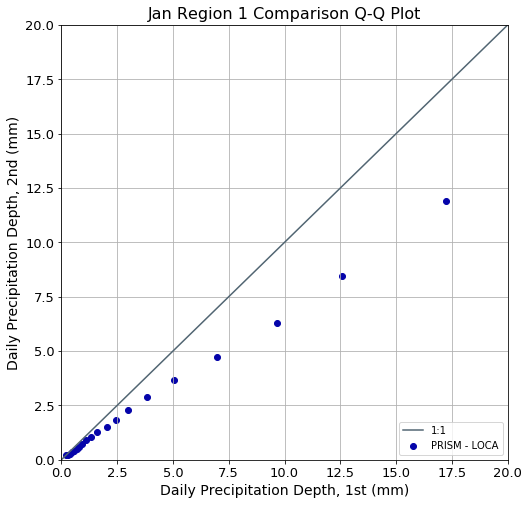

In [53]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan1PRQs, Jan1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

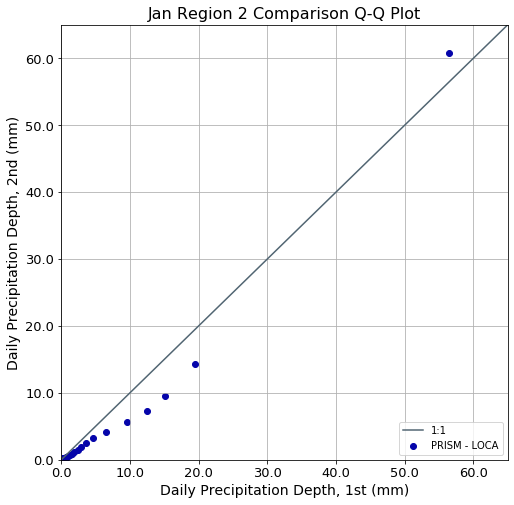

In [54]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan2PRQs, Jan2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

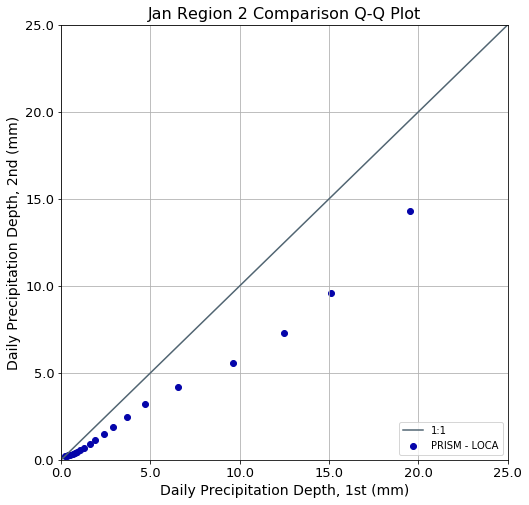

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan2PRQs, Jan2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

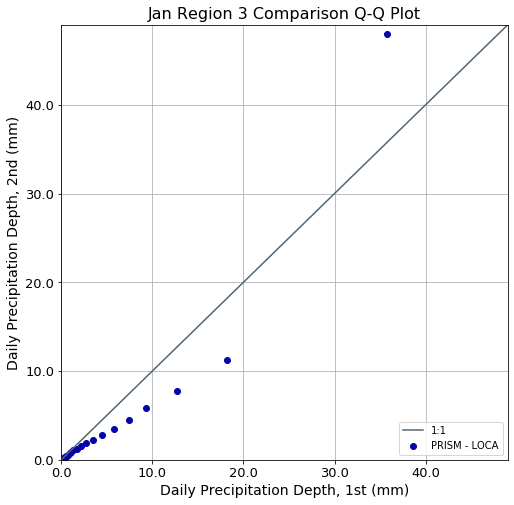

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan3PRQs, Jan3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

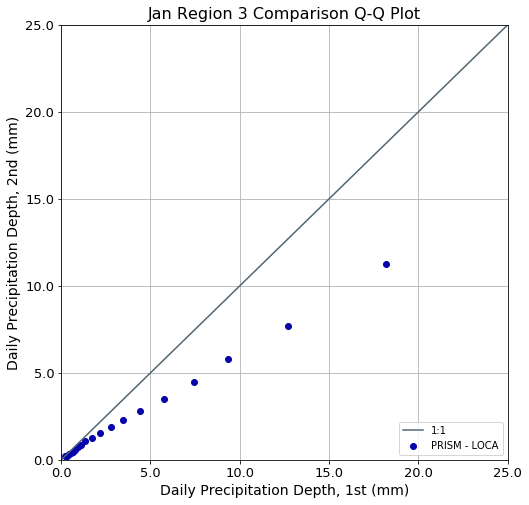

In [57]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan3PRQs, Jan3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

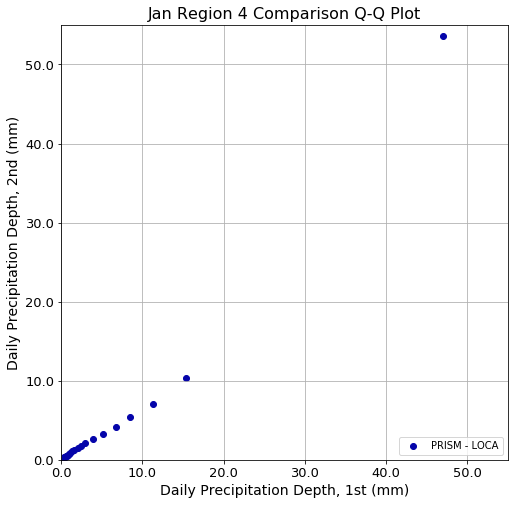

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan4PRQs, Jan4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.set_title('Jan Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan4PRQs, Jan4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [60]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jan1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jan Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

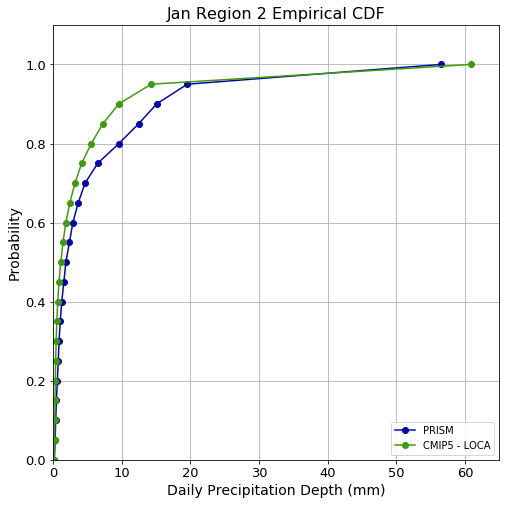

In [61]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jan2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jan Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

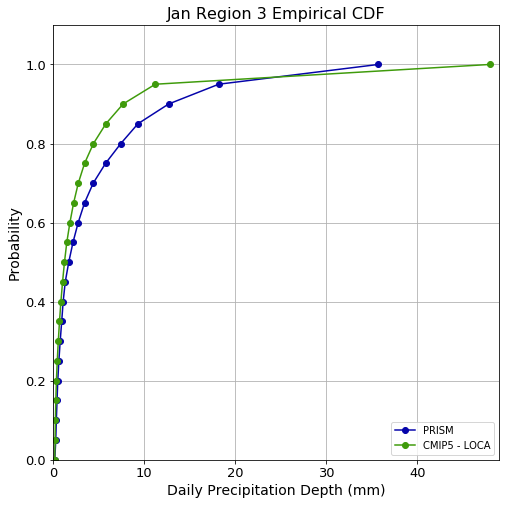

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jan3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jan Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [63]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jan4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jan Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

In [64]:
FebNum = 2

In [65]:
Feb1PRDF = FebPRDF[FebPRDF["Region_Id"] == 1].copy()
Feb2PRDF = FebPRDF[FebPRDF["Region_Id"] == 2].copy()
Feb3PRDF = FebPRDF[FebPRDF["Region_Id"] == 3].copy()
Feb4PRDF = FebPRDF[FebPRDF["Region_Id"] == 4].copy()

In [66]:
Feb1LODF = FebLODF[FebLODF["PRegion_Id"] == 1].copy()
Feb2LODF = FebLODF[FebLODF["PRegion_Id"] == 2].copy()
Feb3LODF = FebLODF[FebLODF["PRegion_Id"] == 3].copy()
Feb4LODF = FebLODF[FebLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [67]:
Feb1PRBSCI = sstats.bayes_mvs( np.array( Feb1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2PRBSCI = sstats.bayes_mvs( np.array( Feb2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3PRBSCI = sstats.bayes_mvs( np.array( Feb3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4PRBSCI = sstats.bayes_mvs( np.array( Feb4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [68]:
Feb1LOBSCI = sstats.bayes_mvs( np.array( Feb1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2LOBSCI = sstats.bayes_mvs( np.array( Feb2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3LOBSCI = sstats.bayes_mvs( np.array( Feb3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4LOBSCI = sstats.bayes_mvs( np.array( Feb4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [69]:
CMonList.append( FebNum )
CZoneList.append( 1 )
SPRMean.append( Feb1PRBSCI[0][0] )
SPRMeanMinCI.append( Feb1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Feb1PRBSCI[0][1][1] )
SPRVar.append( Feb1PRBSCI[1][0] )
SPRVarMinCI.append( Feb1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Feb1PRBSCI[1][1][1] )
SPRStd.append( Feb1PRBSCI[2][0] )
SPRStdMinCI.append( Feb1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Feb1PRBSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 2 )
SPRMean.append( Feb2PRBSCI[0][0] )
SPRMeanMinCI.append( Feb2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Feb2PRBSCI[0][1][1] )
SPRVar.append( Feb2PRBSCI[1][0] )
SPRVarMinCI.append( Feb2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Feb2PRBSCI[1][1][1] )
SPRStd.append( Feb2PRBSCI[2][0] )
SPRStdMinCI.append( Feb2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Feb2PRBSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 3 )
SPRMean.append( Feb3PRBSCI[0][0] )
SPRMeanMinCI.append( Feb3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Feb3PRBSCI[0][1][1] )
SPRVar.append( Feb3PRBSCI[1][0] )
SPRVarMinCI.append( Feb3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Feb3PRBSCI[1][1][1] )
SPRStd.append( Feb3PRBSCI[2][0] )
SPRStdMinCI.append( Feb3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Feb3PRBSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 4 )
SPRMean.append( Feb4PRBSCI[0][0] )
SPRMeanMinCI.append( Feb4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Feb4PRBSCI[0][1][1] )
SPRVar.append( Feb4PRBSCI[1][0] )
SPRVarMinCI.append( Feb4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Feb4PRBSCI[1][1][1] )
SPRStd.append( Feb4PRBSCI[2][0] )
SPRStdMinCI.append( Feb4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Feb4PRBSCI[2][1][1] )

In [70]:
SLOMean.append( Feb1LOBSCI[0][0] )
SLOMeanMinCI.append( Feb1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Feb1LOBSCI[0][1][1] )
SLOVar.append( Feb1LOBSCI[1][0] )
SLOVarMinCI.append( Feb1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Feb1LOBSCI[1][1][1] )
SLOStd.append( Feb1LOBSCI[2][0] )
SLOStdMinCI.append( Feb1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Feb1LOBSCI[2][1][1] )
SLOMean.append( Feb2LOBSCI[0][0] )
SLOMeanMinCI.append( Feb2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Feb2LOBSCI[0][1][1] )
SLOVar.append( Feb2LOBSCI[1][0] )
SLOVarMinCI.append( Feb2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Feb2LOBSCI[1][1][1] )
SLOStd.append( Feb2LOBSCI[2][0] )
SLOStdMinCI.append( Feb2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Feb2LOBSCI[2][1][1] )
SLOMean.append( Feb3LOBSCI[0][0] )
SLOMeanMinCI.append( Feb3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Feb3LOBSCI[0][1][1] )
SLOVar.append( Feb3LOBSCI[1][0] )
SLOVarMinCI.append( Feb3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Feb3LOBSCI[1][1][1] )
SLOStd.append( Feb3LOBSCI[2][0] )
SLOStdMinCI.append( Feb3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Feb3LOBSCI[2][1][1] )
SLOMean.append( Feb4LOBSCI[0][0] )
SLOMeanMinCI.append( Feb4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Feb4LOBSCI[0][1][1] )
SLOVar.append( Feb4LOBSCI[1][0] )
SLOVarMinCI.append( Feb4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Feb4LOBSCI[1][1][1] )
SLOStd.append( Feb4LOBSCI[2][0] )
SLOStdMinCI.append( Feb4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Feb4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [71]:
Feb1TTPRtoLO = sstats.ttest_ind( np.array( Feb1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb1LODF["Precip_mm"], dtype=np.int32 ) )

In [72]:
Feb1TTPRtoLOPval = Feb1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Feb1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 4.24038e-44


In [73]:
Feb2TTPRtoLO = sstats.ttest_ind( np.array( Feb2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb2LODF["Precip_mm"], dtype=np.int32 ) )

In [74]:
Feb2TTPRtoLOPval = Feb2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Feb2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 1.64248e-34


In [75]:
Feb3TTPRtoLO = sstats.ttest_ind( np.array( Feb3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb3LODF["Precip_mm"], dtype=np.int32 ) )

In [76]:
Feb3TTPRtoLOPval = Feb3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Feb3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 2.55184e-151


In [77]:
Feb4TTPRtoLO = sstats.ttest_ind( np.array( Feb4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb4LODF["Precip_mm"], dtype=np.int32 ) )

In [78]:
Feb4TTPRtoLOPval = Feb4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Feb4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 2.20275e-22


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [79]:
Feb1MWUPRtoLO = sstats.mannwhitneyu( np.array( Feb1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [80]:
Feb1MWUPRtoLOPval = Feb1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Feb1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 2.33208e-59


In [81]:
Feb2MWUPRtoLO = sstats.mannwhitneyu( np.array( Feb2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [82]:
Feb2MWUPRtoLOPval = Feb2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Feb2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 8.12132e-51


In [83]:
Feb3MWUPRtoLO = sstats.mannwhitneyu( np.array( Feb3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [84]:
Feb3MWUPRtoLOPval = Feb3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Feb3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 7.16442e-166


In [85]:
Feb4MWUPRtoLO = sstats.mannwhitneyu( np.array( Feb4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [86]:
Feb4MWUPRtoLOPval = Feb4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Feb4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 1.26725e-17


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [87]:
Feb1KWPRtoLO = sstats.kruskal( np.array( Feb1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb1LODF["Precip_mm"], dtype=np.int32 ) )

In [88]:
Feb1KWPRtoLOPval = Feb1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Feb1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [89]:
Feb2KWPRtoLO = sstats.kruskal( np.array( Feb2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb2LODF["Precip_mm"], dtype=np.int32 ) )

In [90]:
Feb2KWPRtoLOPval = Feb2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Feb2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [91]:
Feb3KWPRtoLO = sstats.kruskal( np.array( Feb3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb3LODF["Precip_mm"], dtype=np.int32 ) )

In [92]:
Feb3KWPRtoLOPval = Feb3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Feb3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [93]:
Feb4KWPRtoLO = sstats.kruskal( np.array( Feb4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb4LODF["Precip_mm"], dtype=np.int32 ) )

In [94]:
Feb4KWPRtoLOPval = Feb4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Feb4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1.26724e-17


#### Plots

In [95]:
Feb1PRQs = Feb1PRDF["Precip_mm"].quantile(q=nCompQs)
Feb1LOQs = Feb1LODF["Precip_mm"].quantile(q=nCompQs)
Feb2PRQs = Feb2PRDF["Precip_mm"].quantile(q=nCompQs)
Feb2LOQs = Feb2LODF["Precip_mm"].quantile(q=nCompQs)
Feb3PRQs = Feb3PRDF["Precip_mm"].quantile(q=nCompQs)
Feb3LOQs = Feb3LODF["Precip_mm"].quantile(q=nCompQs)
Feb4PRQs = Feb4PRDF["Precip_mm"].quantile(q=nCompQs)
Feb4LOQs = Feb4LODF["Precip_mm"].quantile(q=nCompQs)

In [96]:
max1Qs = max( Feb1PRQs.max(), Feb1LOQs.max() )
max1Qs = round(max1Qs) + 3.0
max1Qs

75.0

In [97]:
max2Qs = max( Feb2PRQs.max(), Feb2LOQs.max())
max2Qs = round(max2Qs) + 1.0
max2Qs

77.0

In [98]:
max3Qs = max( Feb3PRQs.max(), Feb3LOQs.max() )
max3Qs = round(max3Qs) + 5.0
max3Qs

120.0

In [99]:
max4Qs = max( Feb4PRQs.max(), Feb4LOQs.max() )
max4Qs = round(max4Qs) + 5.0
max4Qs

100.0

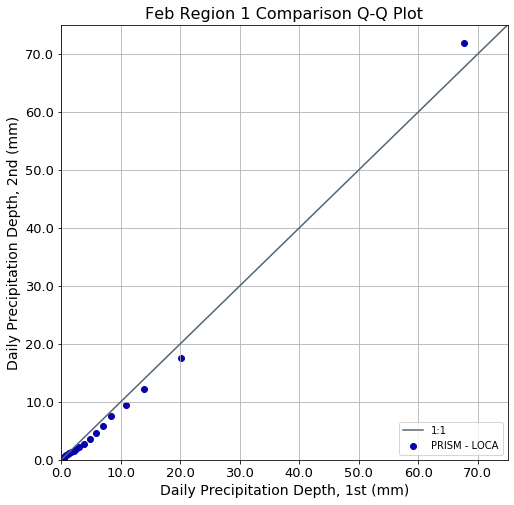

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb1PRQs, Feb1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

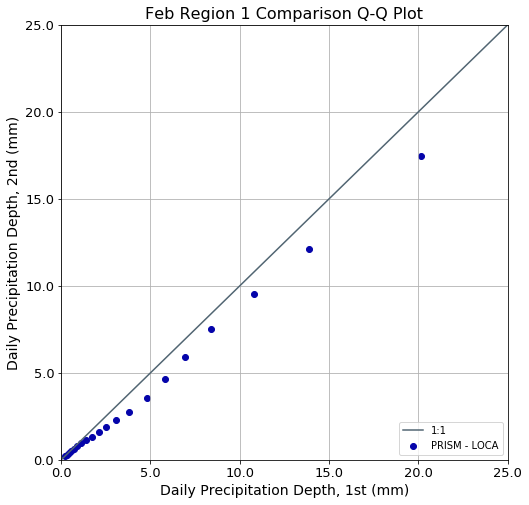

In [101]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb1PRQs, Feb1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

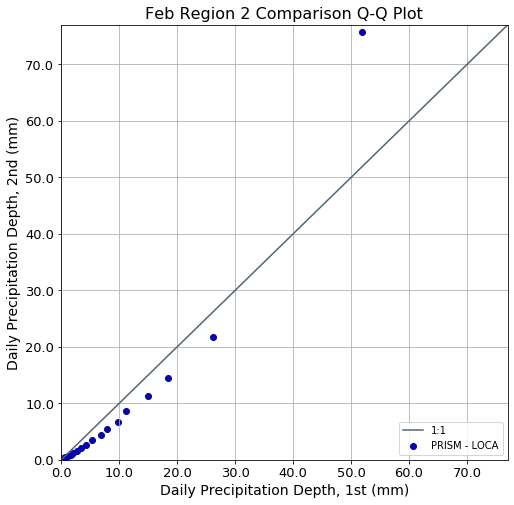

In [102]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb2PRQs, Feb2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

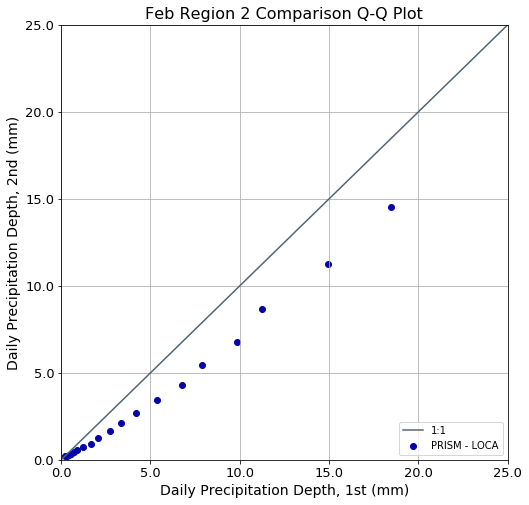

In [103]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb2PRQs, Feb2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

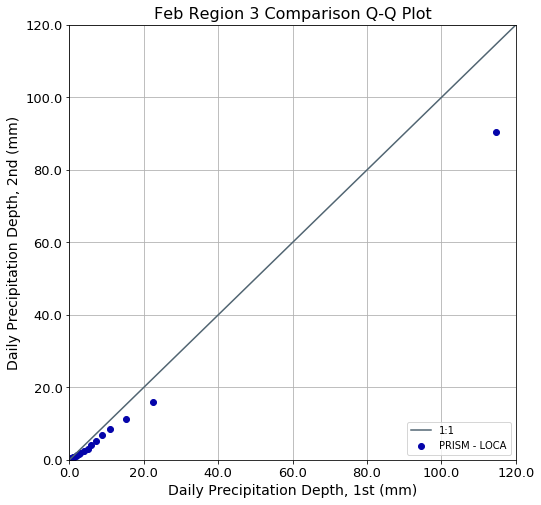

In [104]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb3PRQs, Feb3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

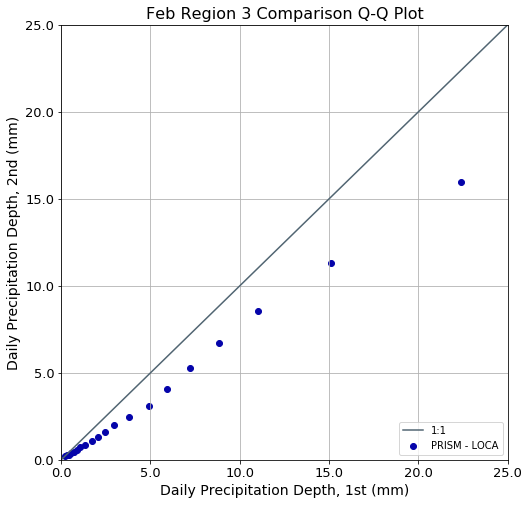

In [105]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb3PRQs, Feb3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb4PRQs, Feb4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

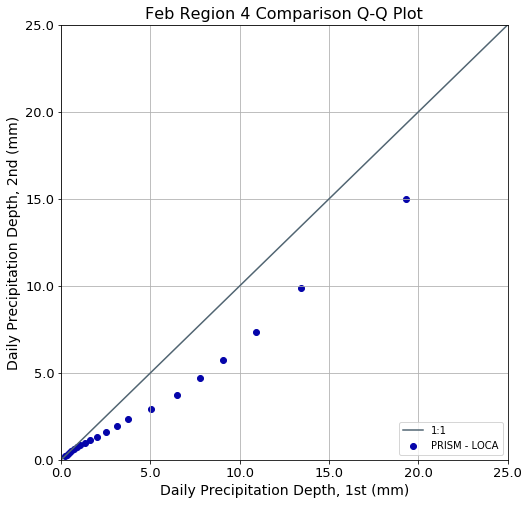

In [107]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb4PRQs, Feb4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

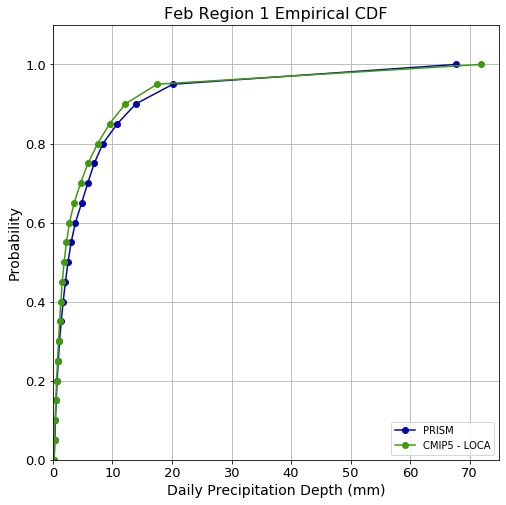

In [108]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Feb1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Feb Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [109]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Feb2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Feb Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

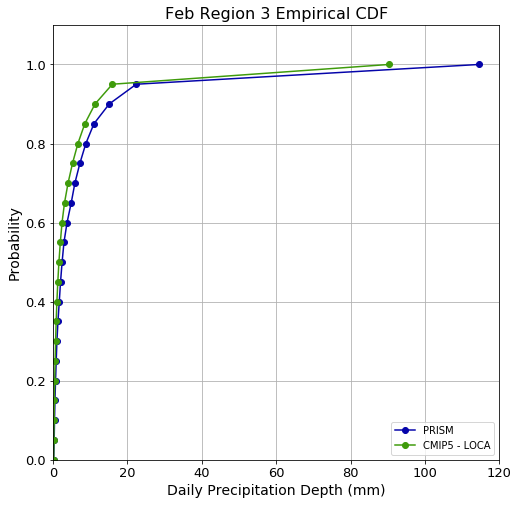

In [110]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Feb3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Feb Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Feb4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Feb Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

In [112]:
MarNum = 3

In [113]:
Mar1PRDF = MarPRDF[MarPRDF["Region_Id"] == 1].copy()
Mar2PRDF = MarPRDF[MarPRDF["Region_Id"] == 2].copy()
Mar3PRDF = MarPRDF[MarPRDF["Region_Id"] == 3].copy()
Mar4PRDF = MarPRDF[MarPRDF["Region_Id"] == 4].copy()

In [114]:
Mar1LODF = MarLODF[MarLODF["PRegion_Id"] == 1].copy()
Mar2LODF = MarLODF[MarLODF["PRegion_Id"] == 2].copy()
Mar3LODF = MarLODF[MarLODF["PRegion_Id"] == 3].copy()
Mar4LODF = MarLODF[MarLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [115]:
Mar1PRBSCI = sstats.bayes_mvs( np.array( Mar1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2PRBSCI = sstats.bayes_mvs( np.array( Mar2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3PRBSCI = sstats.bayes_mvs( np.array( Mar3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4PRBSCI = sstats.bayes_mvs( np.array( Mar4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [116]:
Mar1LOBSCI = sstats.bayes_mvs( np.array( Mar1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2LOBSCI = sstats.bayes_mvs( np.array( Mar2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3LOBSCI = sstats.bayes_mvs( np.array( Mar3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4LOBSCI = sstats.bayes_mvs( np.array( Mar4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [117]:
CMonList.append( MarNum )
CZoneList.append( 1 )
SPRMean.append( Mar1PRBSCI[0][0] )
SPRMeanMinCI.append( Mar1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Mar1PRBSCI[0][1][1] )
SPRVar.append( Mar1PRBSCI[1][0] )
SPRVarMinCI.append( Mar1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Mar1PRBSCI[1][1][1] )
SPRStd.append( Mar1PRBSCI[2][0] )
SPRStdMinCI.append( Mar1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Mar1PRBSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 2 )
SPRMean.append( Mar2PRBSCI[0][0] )
SPRMeanMinCI.append( Mar2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Mar2PRBSCI[0][1][1] )
SPRVar.append( Mar2PRBSCI[1][0] )
SPRVarMinCI.append( Mar2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Mar2PRBSCI[1][1][1] )
SPRStd.append( Mar2PRBSCI[2][0] )
SPRStdMinCI.append( Mar2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Mar2PRBSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 3 )
SPRMean.append( Mar3PRBSCI[0][0] )
SPRMeanMinCI.append( Mar3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Mar3PRBSCI[0][1][1] )
SPRVar.append( Mar3PRBSCI[1][0] )
SPRVarMinCI.append( Mar3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Mar3PRBSCI[1][1][1] )
SPRStd.append( Mar3PRBSCI[2][0] )
SPRStdMinCI.append( Mar3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Mar3PRBSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 4 )
SPRMean.append( Mar4PRBSCI[0][0] )
SPRMeanMinCI.append( Mar4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Mar4PRBSCI[0][1][1] )
SPRVar.append( Mar4PRBSCI[1][0] )
SPRVarMinCI.append( Mar4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Mar4PRBSCI[1][1][1] )
SPRStd.append( Mar4PRBSCI[2][0] )
SPRStdMinCI.append( Mar4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Mar4PRBSCI[2][1][1] )

In [118]:
SLOMean.append( Mar1LOBSCI[0][0] )
SLOMeanMinCI.append( Mar1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Mar1LOBSCI[0][1][1] )
SLOVar.append( Mar1LOBSCI[1][0] )
SLOVarMinCI.append( Mar1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Mar1LOBSCI[1][1][1] )
SLOStd.append( Mar1LOBSCI[2][0] )
SLOStdMinCI.append( Mar1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Mar1LOBSCI[2][1][1] )
SLOMean.append( Mar2LOBSCI[0][0] )
SLOMeanMinCI.append( Mar2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Mar2LOBSCI[0][1][1] )
SLOVar.append( Mar2LOBSCI[1][0] )
SLOVarMinCI.append( Mar2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Mar2LOBSCI[1][1][1] )
SLOStd.append( Mar2LOBSCI[2][0] )
SLOStdMinCI.append( Mar2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Mar2LOBSCI[2][1][1] )
SLOMean.append( Mar3LOBSCI[0][0] )
SLOMeanMinCI.append( Mar3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Mar3LOBSCI[0][1][1] )
SLOVar.append( Mar3LOBSCI[1][0] )
SLOVarMinCI.append( Mar3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Mar3LOBSCI[1][1][1] )
SLOStd.append( Mar3LOBSCI[2][0] )
SLOStdMinCI.append( Mar3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Mar3LOBSCI[2][1][1] )
SLOMean.append( Mar4LOBSCI[0][0] )
SLOMeanMinCI.append( Mar4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Mar4LOBSCI[0][1][1] )
SLOVar.append( Mar4LOBSCI[1][0] )
SLOVarMinCI.append( Mar4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Mar4LOBSCI[1][1][1] )
SLOStd.append( Mar4LOBSCI[2][0] )
SLOStdMinCI.append( Mar4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Mar4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [119]:
Mar1TTPRtoLO = sstats.ttest_ind( np.array( Mar1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar1LODF["Precip_mm"], dtype=np.int32 ) )

In [120]:
Mar1TTPRtoLOPval = Mar1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Mar1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [121]:
Mar2TTPRtoLO = sstats.ttest_ind( np.array( Mar2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar2LODF["Precip_mm"], dtype=np.int32 ) )

In [122]:
Mar2TTPRtoLOPval = Mar2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Mar2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 2.82085e-132


In [123]:
Mar3TTPRtoLO = sstats.ttest_ind( np.array( Mar3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar3LODF["Precip_mm"], dtype=np.int32 ) )

In [124]:
Mar3TTPRtoLOPval = Mar3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Mar3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 3.26116e-218


In [125]:
Mar4TTPRtoLO = sstats.ttest_ind( np.array( Mar4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar4LODF["Precip_mm"], dtype=np.int32 ) )

In [126]:
Mar4TTPRtoLOPval = Mar4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Mar4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [127]:
Mar1MWUPRtoLO = sstats.mannwhitneyu( np.array( Mar1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [128]:
Mar1MWUPRtoLOPval = Mar1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Mar1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 4.12142e-155


In [129]:
Mar2MWUPRtoLO = sstats.mannwhitneyu( np.array( Mar2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [130]:
Mar2MWUPRtoLOPval = Mar2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Mar2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 1.98803e-87


In [131]:
Mar3MWUPRtoLO = sstats.mannwhitneyu( np.array( Mar3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [132]:
Mar3MWUPRtoLOPval = Mar3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Mar3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 9.47277e-79


In [133]:
Mar4MWUPRtoLO = sstats.mannwhitneyu( np.array( Mar4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [134]:
Mar4MWUPRtoLOPval = Mar4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Mar4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 1.07139e-187


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [135]:
Mar1KWPRtoLO = sstats.kruskal( np.array( Mar1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar1LODF["Precip_mm"], dtype=np.int32 ) )

In [136]:
Mar1KWPRtoLOPval = Mar1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Mar1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 1


In [137]:
Mar2KWPRtoLO = sstats.kruskal( np.array( Mar2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar2LODF["Precip_mm"], dtype=np.int32 ) )

In [138]:
Mar2KWPRtoLOPval = Mar2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Mar2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [139]:
Mar3KWPRtoLO = sstats.kruskal( np.array( Mar3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar3LODF["Precip_mm"], dtype=np.int32 ) )

In [140]:
Mar3KWPRtoLOPval = Mar3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Mar3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 0


In [141]:
Mar4KWPRtoLO = sstats.kruskal( np.array( Mar4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar4LODF["Precip_mm"], dtype=np.int32 ) )

In [142]:
Mar4KWPRtoLOPval = Mar4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Mar4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [143]:
Mar1LODF["Precip_mm"].median(),  Mar1PRDF["Precip_mm"].median()

(1.735298991203308, 2.4100000858306885)

In [144]:
Mar2LODF["Precip_mm"].median(),  Mar2PRDF["Precip_mm"].median()

(2.20346736907959, 3.359999895095825)

In [145]:
Mar3LODF["Precip_mm"].median(),  Mar3PRDF["Precip_mm"].median()

(1.426950454711914, 2.2899999618530273)

In [146]:
Mar4LODF["Precip_mm"].median(),  Mar4PRDF["Precip_mm"].median()

(1.4314908981323242, 2.259999990463257)

#### Plots

In [147]:
Mar1PRQs = Mar1PRDF["Precip_mm"].quantile(q=nCompQs)
Mar1LOQs = Mar1LODF["Precip_mm"].quantile(q=nCompQs)
Mar2PRQs = Mar2PRDF["Precip_mm"].quantile(q=nCompQs)
Mar2LOQs = Mar2LODF["Precip_mm"].quantile(q=nCompQs)
Mar3PRQs = Mar3PRDF["Precip_mm"].quantile(q=nCompQs)
Mar3LOQs = Mar3LODF["Precip_mm"].quantile(q=nCompQs)
Mar4PRQs = Mar4PRDF["Precip_mm"].quantile(q=nCompQs)
Mar4LOQs = Mar4LODF["Precip_mm"].quantile(q=nCompQs)

In [148]:
max1Qs = max( Mar1PRQs.max(), Mar1LOQs.max() )
max1Qs = round(max1Qs) + 4.0
max1Qs

95.0

In [149]:
max2Qs = max( Mar2PRQs.max(), Mar2LOQs.max() )
max2Qs = round(max2Qs) + 5.0
max2Qs

105.0

In [150]:
max3Qs = max( Mar3PRQs.max(), Mar3LOQs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

135.0

In [151]:
max4Qs = max( Mar4PRQs.max(), Mar4LOQs.max() )
max4Qs = round(max4Qs) + 4.0
max4Qs

110.0

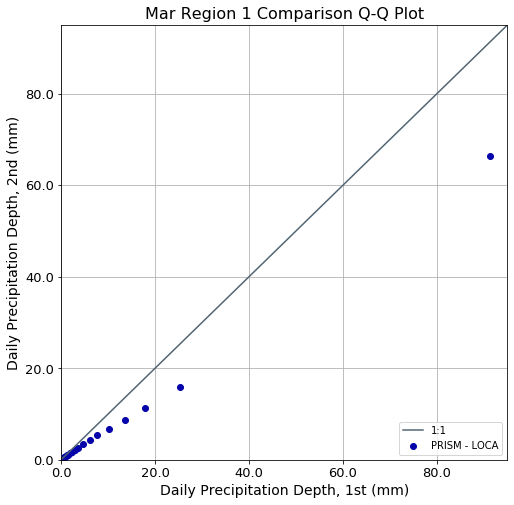

In [152]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar1PRQs, Mar1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [153]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar1PRQs, Mar1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [154]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar2PRQs, Mar2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [155]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar2PRQs, Mar2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [156]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar3PRQs, Mar3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [157]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar3PRQs, Mar3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

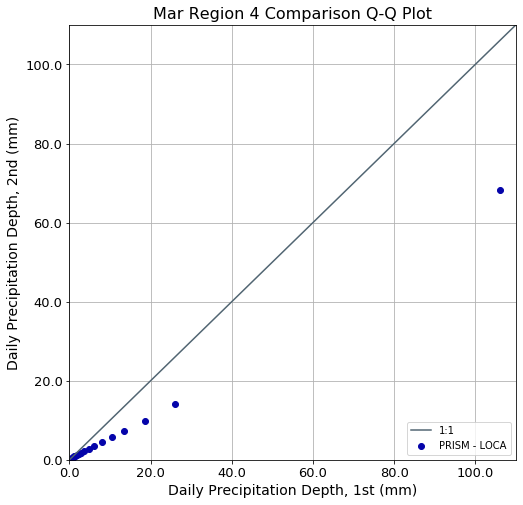

In [158]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar4PRQs, Mar4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

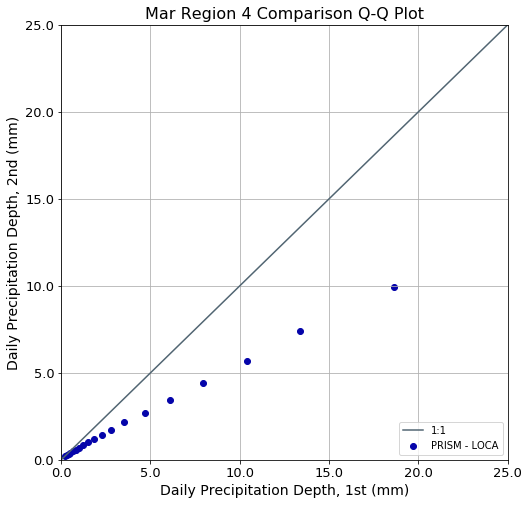

In [159]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar4PRQs, Mar4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [160]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Mar1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Mar Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

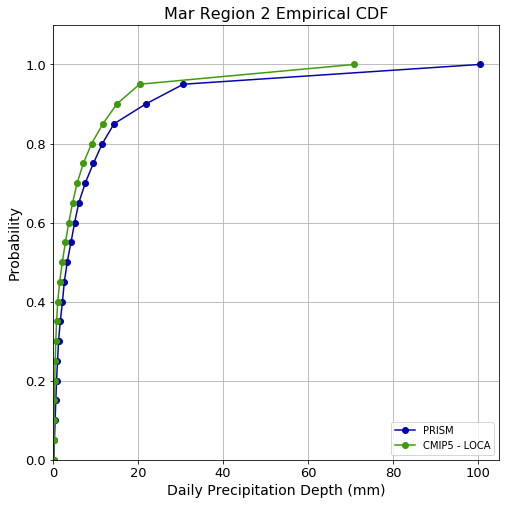

In [161]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Mar2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Mar Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

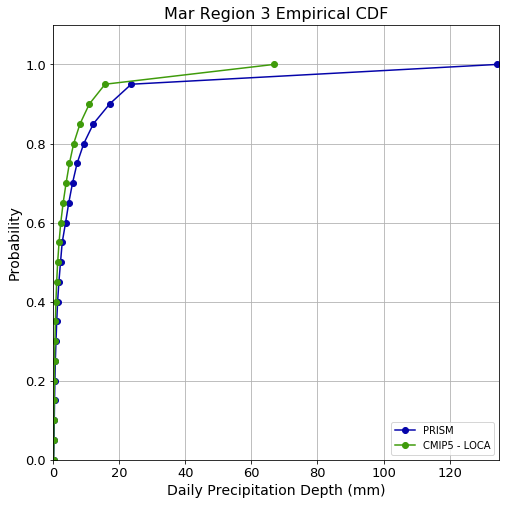

In [162]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Mar3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Mar Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

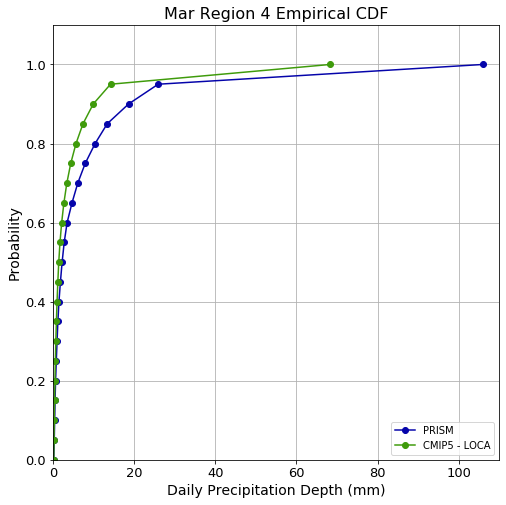

In [163]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Mar4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Mar Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

In [164]:
AprNum = 4

In [165]:
Apr1PRDF = AprPRDF[AprPRDF["Region_Id"] == 1].copy()
Apr2PRDF = AprPRDF[AprPRDF["Region_Id"] == 2].copy()
Apr3PRDF = AprPRDF[AprPRDF["Region_Id"] == 3].copy()
Apr4PRDF = AprPRDF[AprPRDF["Region_Id"] == 4].copy()

In [166]:
Apr1LODF = AprLODF[AprLODF["PRegion_Id"] == 1].copy()
Apr2LODF = AprLODF[AprLODF["PRegion_Id"] == 2].copy()
Apr3LODF = AprLODF[AprLODF["PRegion_Id"] == 3].copy()
Apr4LODF = AprLODF[AprLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [167]:
Apr1PRBSCI = sstats.bayes_mvs( np.array( Apr1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2PRBSCI = sstats.bayes_mvs( np.array( Apr2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3PRBSCI = sstats.bayes_mvs( np.array( Apr3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4PRBSCI = sstats.bayes_mvs( np.array( Apr4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [168]:
Apr1LOBSCI = sstats.bayes_mvs( np.array( Apr1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2LOBSCI = sstats.bayes_mvs( np.array( Apr2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3LOBSCI = sstats.bayes_mvs( np.array( Apr3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4LOBSCI = sstats.bayes_mvs( np.array( Apr4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [169]:
CMonList.append( AprNum )
CZoneList.append( 1 )
SPRMean.append( Apr1PRBSCI[0][0] )
SPRMeanMinCI.append( Apr1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Apr1PRBSCI[0][1][1] )
SPRVar.append( Apr1PRBSCI[1][0] )
SPRVarMinCI.append( Apr1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Apr1PRBSCI[1][1][1] )
SPRStd.append( Apr1PRBSCI[2][0] )
SPRStdMinCI.append( Apr1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Apr1PRBSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 2 )
SPRMean.append( Apr2PRBSCI[0][0] )
SPRMeanMinCI.append( Apr2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Apr2PRBSCI[0][1][1] )
SPRVar.append( Apr2PRBSCI[1][0] )
SPRVarMinCI.append( Apr2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Apr2PRBSCI[1][1][1] )
SPRStd.append( Apr2PRBSCI[2][0] )
SPRStdMinCI.append( Apr2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Apr2PRBSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 3 )
SPRMean.append( Apr3PRBSCI[0][0] )
SPRMeanMinCI.append( Apr3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Apr3PRBSCI[0][1][1] )
SPRVar.append( Apr3PRBSCI[1][0] )
SPRVarMinCI.append( Apr3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Apr3PRBSCI[1][1][1] )
SPRStd.append( Apr3PRBSCI[2][0] )
SPRStdMinCI.append( Apr3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Apr3PRBSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 4 )
SPRMean.append( Apr4PRBSCI[0][0] )
SPRMeanMinCI.append( Apr4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Apr4PRBSCI[0][1][1] )
SPRVar.append( Apr4PRBSCI[1][0] )
SPRVarMinCI.append( Apr4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Apr4PRBSCI[1][1][1] )
SPRStd.append( Apr4PRBSCI[2][0] )
SPRStdMinCI.append( Apr4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Apr4PRBSCI[2][1][1] )

In [170]:
SLOMean.append( Apr1LOBSCI[0][0] )
SLOMeanMinCI.append( Apr1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Apr1LOBSCI[0][1][1] )
SLOVar.append( Apr1LOBSCI[1][0] )
SLOVarMinCI.append( Apr1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Apr1LOBSCI[1][1][1] )
SLOStd.append( Apr1LOBSCI[2][0] )
SLOStdMinCI.append( Apr1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Apr1LOBSCI[2][1][1] )
SLOMean.append( Apr2LOBSCI[0][0] )
SLOMeanMinCI.append( Apr2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Apr2LOBSCI[0][1][1] )
SLOVar.append( Apr2LOBSCI[1][0] )
SLOVarMinCI.append( Apr2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Apr2LOBSCI[1][1][1] )
SLOStd.append( Apr2LOBSCI[2][0] )
SLOStdMinCI.append( Apr2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Apr2LOBSCI[2][1][1] )
SLOMean.append( Apr3LOBSCI[0][0] )
SLOMeanMinCI.append( Apr3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Apr3LOBSCI[0][1][1] )
SLOVar.append( Apr3LOBSCI[1][0] )
SLOVarMinCI.append( Apr3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Apr3LOBSCI[1][1][1] )
SLOStd.append( Apr3LOBSCI[2][0] )
SLOStdMinCI.append( Apr3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Apr3LOBSCI[2][1][1] )
SLOMean.append( Apr4LOBSCI[0][0] )
SLOMeanMinCI.append( Apr4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Apr4LOBSCI[0][1][1] )
SLOVar.append( Apr4LOBSCI[1][0] )
SLOVarMinCI.append( Apr4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Apr4LOBSCI[1][1][1] )
SLOStd.append( Apr4LOBSCI[2][0] )
SLOStdMinCI.append( Apr4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Apr4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [171]:
Apr1TTPRtoLO = sstats.ttest_ind( np.array( Apr1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr1LODF["Precip_mm"], dtype=np.int32 ) )

In [172]:
Apr1TTPRtoLOPval = Apr1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Apr1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [173]:
Apr2TTPRtoLO = sstats.ttest_ind( np.array( Apr2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr2LODF["Precip_mm"], dtype=np.int32 ) )

In [174]:
Apr2TTPRtoLOPval = Apr2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Apr2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 7.9229e-173


In [175]:
Apr3TTPRtoLO = sstats.ttest_ind( np.array( Apr3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr3LODF["Precip_mm"], dtype=np.int32 ) )

In [176]:
Apr3TTPRtoLOPval = Apr3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Apr3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 2.73794e-75


In [177]:
Apr4TTPRtoLO = sstats.ttest_ind( np.array( Apr4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr4LODF["Precip_mm"], dtype=np.int32 ) )

In [178]:
Apr4TTPRtoLOPval = Apr4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Apr4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [179]:
Apr1MWUPRtoLO = sstats.mannwhitneyu( np.array( Apr1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [180]:
Apr1MWUPRtoLOPval = Apr1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Apr1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 2.01899e-36


In [181]:
Apr2MWUPRtoLO = sstats.mannwhitneyu( np.array( Apr2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [182]:
Apr2MWUPRtoLOPval = Apr2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Apr2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 1.91037e-28


In [183]:
Apr3MWUPRtoLO = sstats.mannwhitneyu( np.array( Apr3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [184]:
Apr3MWUPRtoLOPval = Apr3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Apr3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 9.97589e-06


In [185]:
Apr4MWUPRtoLO = sstats.mannwhitneyu( np.array( Apr4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [186]:
Apr4MWUPRtoLOPval = Apr4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Apr4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 1.6377e-96


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [187]:
Apr1KWPRtoLO = sstats.kruskal( np.array( Apr1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr1LODF["Precip_mm"], dtype=np.int32 ) )

In [188]:
Apr1KWPRtoLOPval = Apr1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Apr1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [189]:
Apr2KWPRtoLO = sstats.kruskal( np.array( Apr2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr2LODF["Precip_mm"], dtype=np.int32 ) )

In [190]:
Apr2KWPRtoLOPval = Apr2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Apr2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [191]:
Apr3KWPRtoLO = sstats.kruskal( np.array( Apr3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr3LODF["Precip_mm"], dtype=np.int32 ) )

In [192]:
Apr3KWPRtoLOPval = Apr3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Apr3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [193]:
Apr4KWPRtoLO = sstats.kruskal( np.array( Apr4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr4LODF["Precip_mm"], dtype=np.int32 ) )

In [194]:
Apr4KWPRtoLOPval = Apr4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Apr4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [195]:
Apr1LODF["Precip_mm"].median(), Apr1PRDF["Precip_mm"].median()

(2.4769701957702637, 2.5799999237060547)

In [196]:
Apr2LODF["Precip_mm"].median(), Apr2PRDF["Precip_mm"].median()

(3.2990641593933105, 3.5799999237060547)

In [197]:
Apr3LODF["Precip_mm"].median(), Apr3PRDF["Precip_mm"].median()

(2.4954779148101807, 2.5199999809265137)

In [198]:
Apr4LODF["Precip_mm"].median(), Apr4PRDF["Precip_mm"].median()

(2.057403802871704, 2.9000000953674316)

#### Plots

In [199]:
Apr1PRQs = Apr1PRDF["Precip_mm"].quantile(q=nCompQs)
Apr1LOQs = Apr1LODF["Precip_mm"].quantile(q=nCompQs)
Apr2PRQs = Apr2PRDF["Precip_mm"].quantile(q=nCompQs)
Apr2LOQs = Apr2LODF["Precip_mm"].quantile(q=nCompQs)
Apr3PRQs = Apr3PRDF["Precip_mm"].quantile(q=nCompQs)
Apr3LOQs = Apr3LODF["Precip_mm"].quantile(q=nCompQs)
Apr4PRQs = Apr4PRDF["Precip_mm"].quantile(q=nCompQs)
Apr4LOQs = Apr4LODF["Precip_mm"].quantile(q=nCompQs)

In [200]:
max1Qs = max( Apr1PRQs.max(), Apr1LOQs.max() )
max1Qs = round(max1Qs) + 5.0
max1Qs

88.0

In [201]:
max2Qs = max( Apr2PRQs.max(), Apr2LOQs.max() )
max2Qs = round(max2Qs) + 3.0
max2Qs

97.0

In [202]:
max3Qs = max( Apr3PRQs.max(), Apr3LOQs.max() )
max3Qs = round(max3Qs) + 2.0
max3Qs

125.0

In [203]:
max4Qs = max( Apr4PRQs.max(), Apr4LOQs.max() )
max4Qs = round(max4Qs) + 4.0
max4Qs

95.0

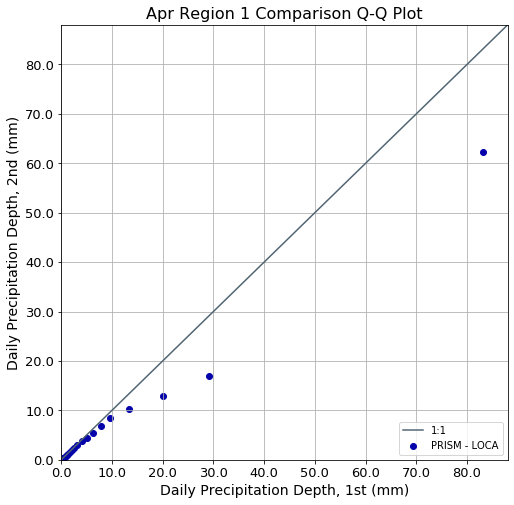

In [204]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr1PRQs, Apr1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

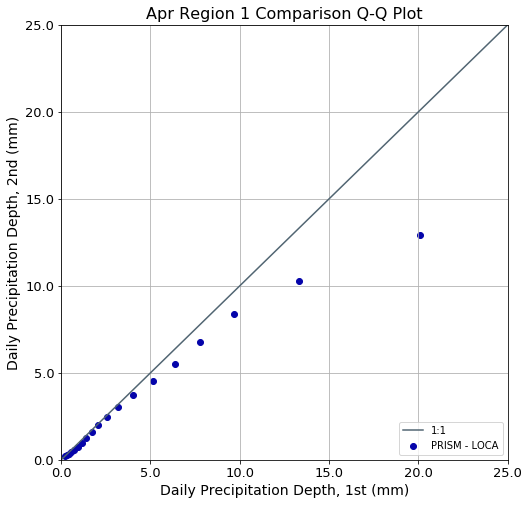

In [205]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr1PRQs, Apr1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

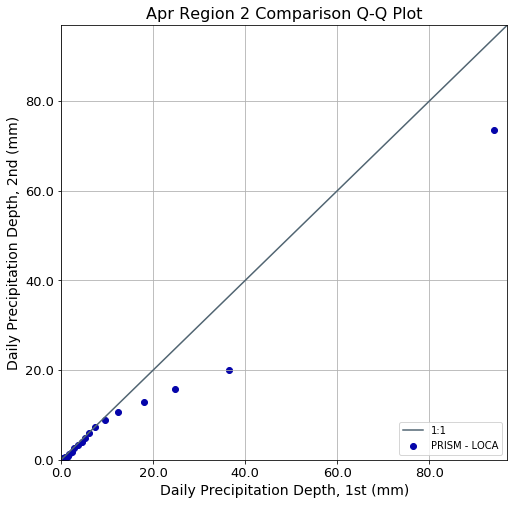

In [206]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr2PRQs, Apr2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [207]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr2PRQs, Apr2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

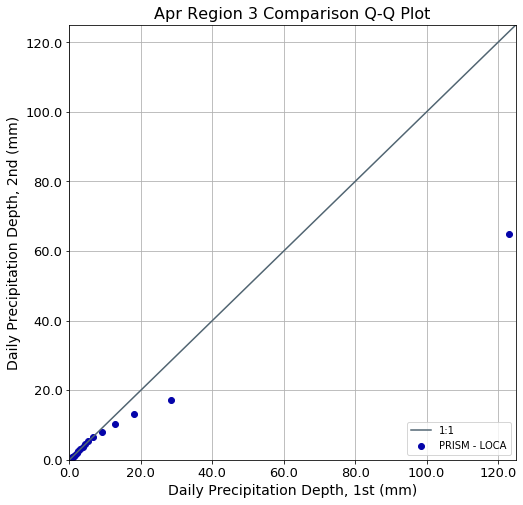

In [208]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr3PRQs, Apr3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

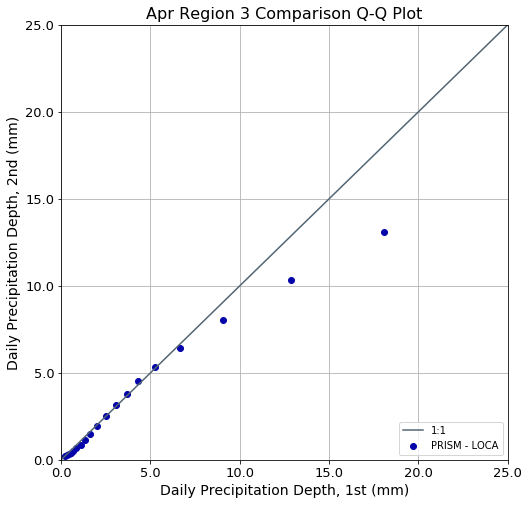

In [209]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr3PRQs, Apr3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [210]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr4PRQs, Apr4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

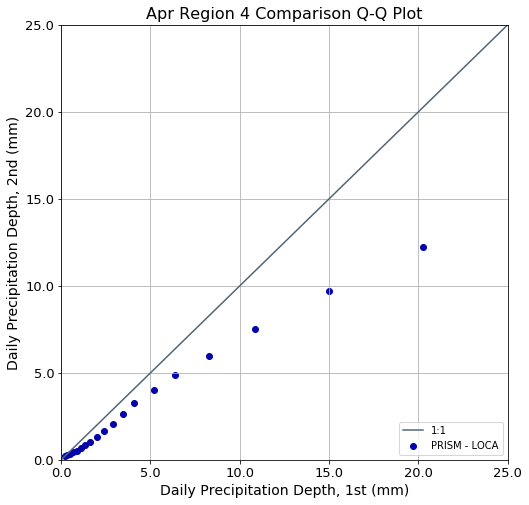

In [211]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr4PRQs, Apr4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

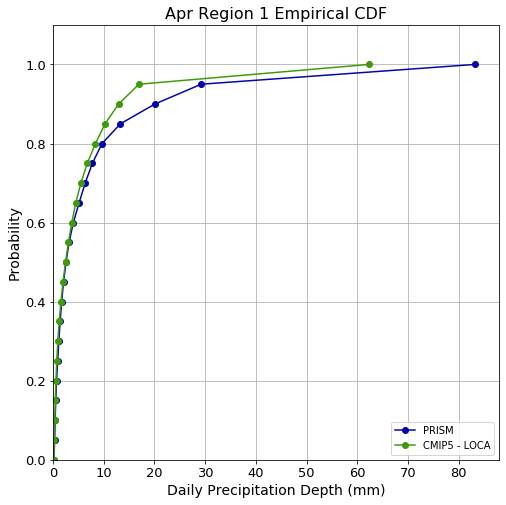

In [212]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Apr1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Apr Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [213]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Apr2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Apr Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

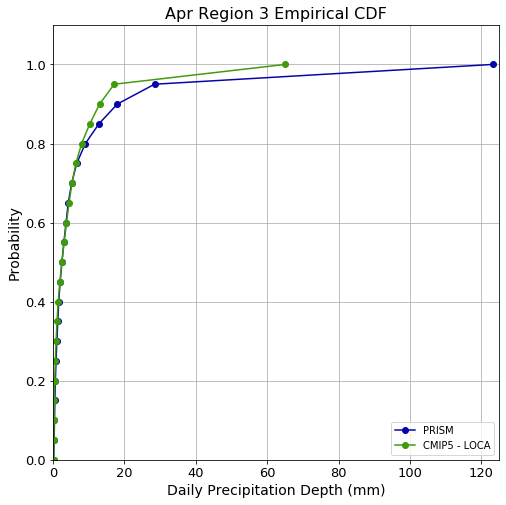

In [214]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Apr3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Apr Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [215]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Apr4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Apr Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

In [216]:
MayNum = 5

In [217]:
May1PRDF = MayPRDF[MayPRDF["Region_Id"] == 1].copy()
May2PRDF = MayPRDF[MayPRDF["Region_Id"] == 2].copy()
May3PRDF = MayPRDF[MayPRDF["Region_Id"] == 3].copy()
May4PRDF = MayPRDF[MayPRDF["Region_Id"] == 4].copy()

In [218]:
May1LODF = MayLODF[MayLODF["PRegion_Id"] == 1].copy()
May2LODF = MayLODF[MayLODF["PRegion_Id"] == 2].copy()
May3LODF = MayLODF[MayLODF["PRegion_Id"] == 3].copy()
May4LODF = MayLODF[MayLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [219]:
May1PRBSCI = sstats.bayes_mvs( np.array( May1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2PRBSCI = sstats.bayes_mvs( np.array( May2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3PRBSCI = sstats.bayes_mvs( np.array( May3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4PRBSCI = sstats.bayes_mvs( np.array( May4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [220]:
May1LOBSCI = sstats.bayes_mvs( np.array( May1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2LOBSCI = sstats.bayes_mvs( np.array( May2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3LOBSCI = sstats.bayes_mvs( np.array( May3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4LOBSCI = sstats.bayes_mvs( np.array( May4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [221]:
CMonList.append( MayNum )
CZoneList.append( 1 )
SPRMean.append( May1PRBSCI[0][0] )
SPRMeanMinCI.append( May1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( May1PRBSCI[0][1][1] )
SPRVar.append( May1PRBSCI[1][0] )
SPRVarMinCI.append( May1PRBSCI[1][1][0] )
SPRVarMaxCI.append( May1PRBSCI[1][1][1] )
SPRStd.append( May1PRBSCI[2][0] )
SPRStdMinCI.append( May1PRBSCI[2][1][0] )
SPRStdMaxCI.append( May1PRBSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 2 )
SPRMean.append( May2PRBSCI[0][0] )
SPRMeanMinCI.append( May2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( May2PRBSCI[0][1][1] )
SPRVar.append( May2PRBSCI[1][0] )
SPRVarMinCI.append( May2PRBSCI[1][1][0] )
SPRVarMaxCI.append( May2PRBSCI[1][1][1] )
SPRStd.append( May2PRBSCI[2][0] )
SPRStdMinCI.append( May2PRBSCI[2][1][0] )
SPRStdMaxCI.append( May2PRBSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 3 )
SPRMean.append( May3PRBSCI[0][0] )
SPRMeanMinCI.append( May3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( May3PRBSCI[0][1][1] )
SPRVar.append( May3PRBSCI[1][0] )
SPRVarMinCI.append( May3PRBSCI[1][1][0] )
SPRVarMaxCI.append( May3PRBSCI[1][1][1] )
SPRStd.append( May3PRBSCI[2][0] )
SPRStdMinCI.append( May3PRBSCI[2][1][0] )
SPRStdMaxCI.append( May3PRBSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 4 )
SPRMean.append( May4PRBSCI[0][0] )
SPRMeanMinCI.append( May4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( May4PRBSCI[0][1][1] )
SPRVar.append( May4PRBSCI[1][0] )
SPRVarMinCI.append( May4PRBSCI[1][1][0] )
SPRVarMaxCI.append( May4PRBSCI[1][1][1] )
SPRStd.append( May4PRBSCI[2][0] )
SPRStdMinCI.append( May4PRBSCI[2][1][0] )
SPRStdMaxCI.append( May4PRBSCI[2][1][1] )

In [222]:
SLOMean.append( May1LOBSCI[0][0] )
SLOMeanMinCI.append( May1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( May1LOBSCI[0][1][1] )
SLOVar.append( May1LOBSCI[1][0] )
SLOVarMinCI.append( May1LOBSCI[1][1][0] )
SLOVarMaxCI.append( May1LOBSCI[1][1][1] )
SLOStd.append( May1LOBSCI[2][0] )
SLOStdMinCI.append( May1LOBSCI[2][1][0] )
SLOStdMaxCI.append( May1LOBSCI[2][1][1] )
SLOMean.append( May2LOBSCI[0][0] )
SLOMeanMinCI.append( May2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( May2LOBSCI[0][1][1] )
SLOVar.append( May2LOBSCI[1][0] )
SLOVarMinCI.append( May2LOBSCI[1][1][0] )
SLOVarMaxCI.append( May2LOBSCI[1][1][1] )
SLOStd.append( May2LOBSCI[2][0] )
SLOStdMinCI.append( May2LOBSCI[2][1][0] )
SLOStdMaxCI.append( May2LOBSCI[2][1][1] )
SLOMean.append( May3LOBSCI[0][0] )
SLOMeanMinCI.append( May3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( May3LOBSCI[0][1][1] )
SLOVar.append( May3LOBSCI[1][0] )
SLOVarMinCI.append( May3LOBSCI[1][1][0] )
SLOVarMaxCI.append( May3LOBSCI[1][1][1] )
SLOStd.append( May3LOBSCI[2][0] )
SLOStdMinCI.append( May3LOBSCI[2][1][0] )
SLOStdMaxCI.append( May3LOBSCI[2][1][1] )
SLOMean.append( May4LOBSCI[0][0] )
SLOMeanMinCI.append( May4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( May4LOBSCI[0][1][1] )
SLOVar.append( May4LOBSCI[1][0] )
SLOVarMinCI.append( May4LOBSCI[1][1][0] )
SLOVarMaxCI.append( May4LOBSCI[1][1][1] )
SLOStd.append( May4LOBSCI[2][0] )
SLOStdMinCI.append( May4LOBSCI[2][1][0] )
SLOStdMaxCI.append( May4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [223]:
May1TTPRtoLO = sstats.ttest_ind( np.array( May1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May1LODF["Precip_mm"], dtype=np.int32 ) )

In [224]:
May1TTPRtoLOPval = May1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % May1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [225]:
May2TTPRtoLO = sstats.ttest_ind( np.array( May2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May2LODF["Precip_mm"], dtype=np.int32 ) )

In [226]:
May2TTPRtoLOPval = May2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % May2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 0


In [227]:
May3TTPRtoLO = sstats.ttest_ind( np.array( May3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May3LODF["Precip_mm"], dtype=np.int32 ) )

In [228]:
May3TTPRtoLOPval = May3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % May3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [229]:
May4TTPRtoLO = sstats.ttest_ind( np.array( May4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May4LODF["Precip_mm"], dtype=np.int32 ) )

In [230]:
May4TTPRtoLOPval = May4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % May4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [231]:
May1MWUPRtoLO = sstats.mannwhitneyu( np.array( May1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [232]:
May1MWUPRtoLOPval = May1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % May1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 0


In [233]:
May2MWUPRtoLO = sstats.mannwhitneyu( np.array( May2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [234]:
May2MWUPRtoLOPval = May2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % May2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 0


In [235]:
May3MWUPRtoLO = sstats.mannwhitneyu( np.array( May3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [236]:
May3MWUPRtoLOPval = May3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % May3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 0


In [237]:
May4MWUPRtoLO = sstats.mannwhitneyu( np.array( May4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [238]:
May4MWUPRtoLOPval = May4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % May4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [239]:
May1KWPRtoLO = sstats.kruskal( np.array( May1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May1LODF["Precip_mm"], dtype=np.int32 ) )

In [240]:
May1KWPRtoLOPval = May1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % May1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [241]:
May2KWPRtoLO = sstats.kruskal( np.array( May2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May2LODF["Precip_mm"], dtype=np.int32 ) )

In [242]:
May2KWPRtoLOPval = May2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % May2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 0


In [243]:
May3KWPRtoLO = sstats.kruskal( np.array( May3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May3LODF["Precip_mm"], dtype=np.int32 ) )

In [244]:
May3KWPRtoLOPval = May3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % May3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [245]:
May4KWPRtoLO = sstats.kruskal( np.array( May4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May4LODF["Precip_mm"], dtype=np.int32 ) )

In [246]:
May4KWPRtoLOPval = May4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % May4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1


In [247]:
May1LODF["Precip_mm"].median(), May1PRDF["Precip_mm"].median()

(2.667581081390381, 4.289999961853027)

In [248]:
May2LODF["Precip_mm"].median(), May2PRDF["Precip_mm"].median()

(2.869441509246826, 5.885000228881836)

In [249]:
May3LODF["Precip_mm"].median(), May3PRDF["Precip_mm"].median()

(2.689047336578369, 4.619999885559082)

In [250]:
May4LODF["Precip_mm"].median(), May4PRDF["Precip_mm"].median()

(2.43206524848938, 5.010000228881836)

#### Plots

In [251]:
May1PRQs = May1PRDF["Precip_mm"].quantile(q=nCompQs)
May1LOQs = May1LODF["Precip_mm"].quantile(q=nCompQs)
May2PRQs = May2PRDF["Precip_mm"].quantile(q=nCompQs)
May2LOQs = May2LODF["Precip_mm"].quantile(q=nCompQs)
May3PRQs = May3PRDF["Precip_mm"].quantile(q=nCompQs)
May3LOQs = May3LODF["Precip_mm"].quantile(q=nCompQs)
May4PRQs = May4PRDF["Precip_mm"].quantile(q=nCompQs)
May4LOQs = May4LODF["Precip_mm"].quantile(q=nCompQs)

In [252]:
max1Qs = max( May1PRQs.max(), May1LOQs.max() )
max1Qs = round(max1Qs) + 1.0
max1Qs

95.0

In [253]:
max2Qs = max( May2PRQs.max(), May2LOQs.max() )
max2Qs = round(max2Qs) + 1.0
max2Qs

125.0

In [254]:
max3Qs = max( May3PRQs.max(), May3LOQs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

110.0

In [255]:
max4Qs = max( May4PRQs.max(), May4LOQs.max() )
max4Qs = round(max4Qs) + 2.0
max4Qs

110.0

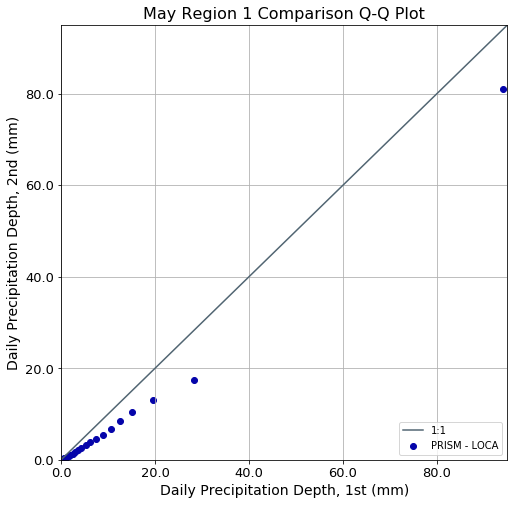

In [256]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May1PRQs, May1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [257]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May1PRQs, May1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [258]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May2PRQs, May2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [259]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May2PRQs, May2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

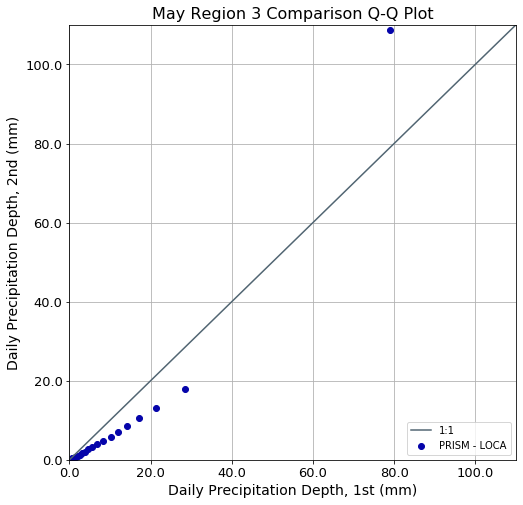

In [260]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May3PRQs, May3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

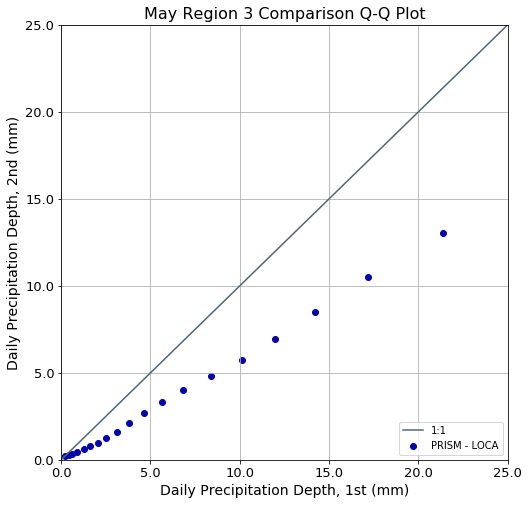

In [261]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May3PRQs, May3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

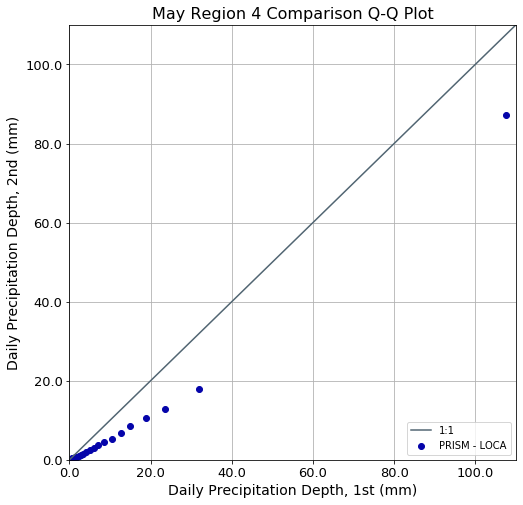

In [262]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May4PRQs, May4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

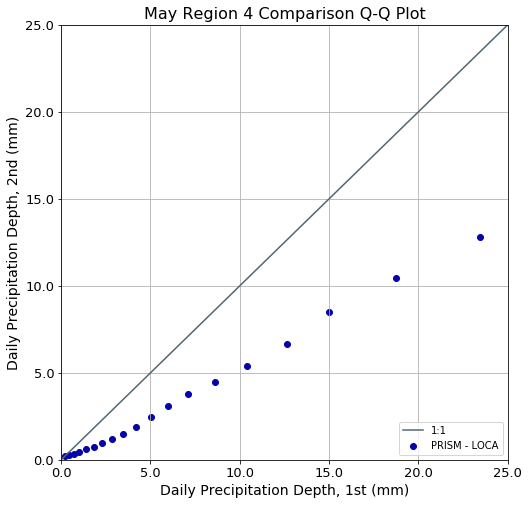

In [263]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May4PRQs, May4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

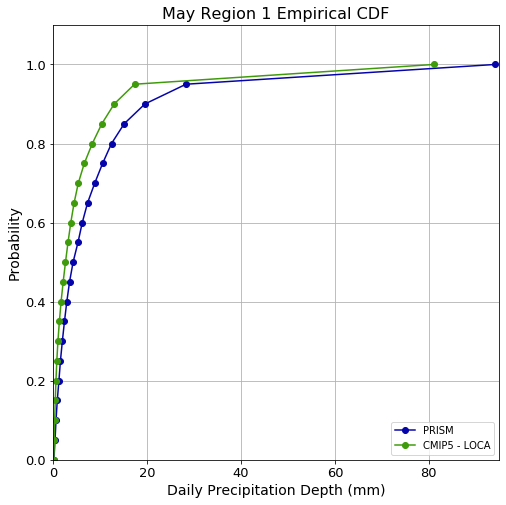

In [264]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( May1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('May Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

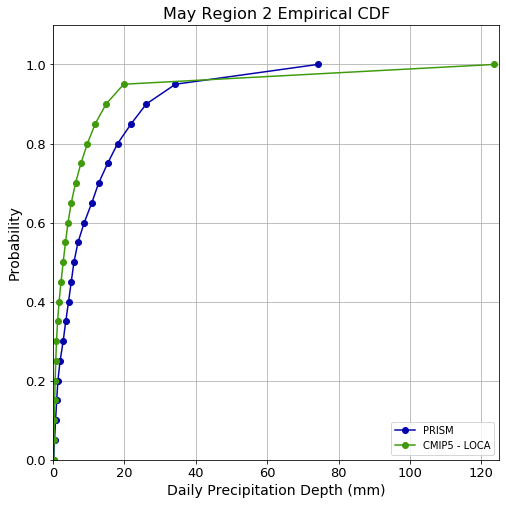

In [265]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( May2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('May Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

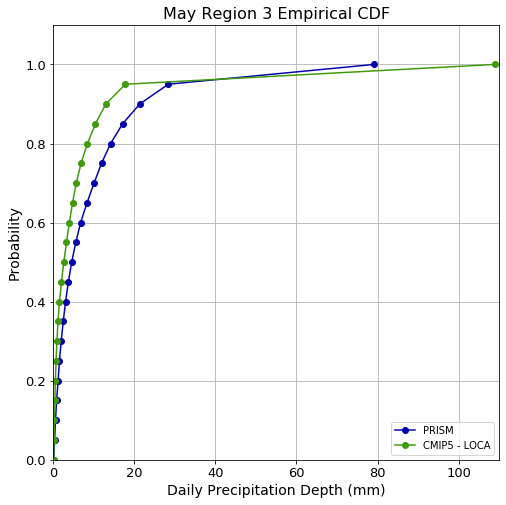

In [266]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( May3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('May Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

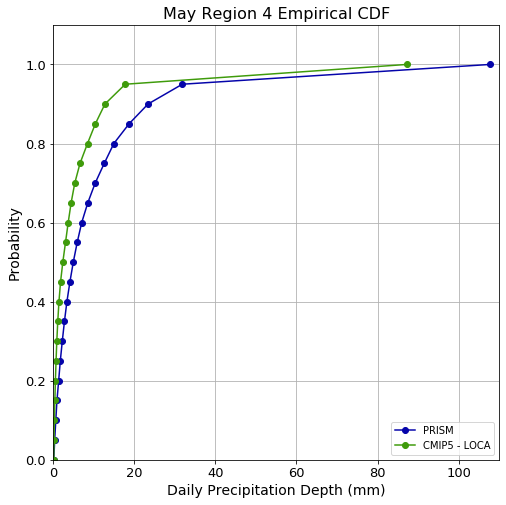

In [267]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( May4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('May Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

In [268]:
JunNum = 6

In [269]:
Jun1PRDF = JunPRDF[JunPRDF["Region_Id"] == 1].copy()
Jun2PRDF = JunPRDF[JunPRDF["Region_Id"] == 2].copy()
Jun3PRDF = JunPRDF[JunPRDF["Region_Id"] == 3].copy()
Jun4PRDF = JunPRDF[JunPRDF["Region_Id"] == 4].copy()

In [270]:
Jun1LODF = JunLODF[JunLODF["PRegion_Id"] == 1].copy()
Jun2LODF = JunLODF[JunLODF["PRegion_Id"] == 2].copy()
Jun3LODF = JunLODF[JunLODF["PRegion_Id"] == 3].copy()
Jun4LODF = JunLODF[JunLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [271]:
Jun1PRBSCI = sstats.bayes_mvs( np.array( Jun1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2PRBSCI = sstats.bayes_mvs( np.array( Jun2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3PRBSCI = sstats.bayes_mvs( np.array( Jun3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4PRBSCI = sstats.bayes_mvs( np.array( Jun4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [272]:
Jun1LOBSCI = sstats.bayes_mvs( np.array( Jun1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2LOBSCI = sstats.bayes_mvs( np.array( Jun2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3LOBSCI = sstats.bayes_mvs( np.array( Jun3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4LOBSCI = sstats.bayes_mvs( np.array( Jun4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [273]:
CMonList.append( JunNum )
CZoneList.append( 1 )
SPRMean.append( Jun1PRBSCI[0][0] )
SPRMeanMinCI.append( Jun1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jun1PRBSCI[0][1][1] )
SPRVar.append( Jun1PRBSCI[1][0] )
SPRVarMinCI.append( Jun1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jun1PRBSCI[1][1][1] )
SPRStd.append( Jun1PRBSCI[2][0] )
SPRStdMinCI.append( Jun1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jun1PRBSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 2 )
SPRMean.append( Jun2PRBSCI[0][0] )
SPRMeanMinCI.append( Jun2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jun2PRBSCI[0][1][1] )
SPRVar.append( Jun2PRBSCI[1][0] )
SPRVarMinCI.append( Jun2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jun2PRBSCI[1][1][1] )
SPRStd.append( Jun2PRBSCI[2][0] )
SPRStdMinCI.append( Jun2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jun2PRBSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 3 )
SPRMean.append( Jun3PRBSCI[0][0] )
SPRMeanMinCI.append( Jun3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jun3PRBSCI[0][1][1] )
SPRVar.append( Jun3PRBSCI[1][0] )
SPRVarMinCI.append( Jun3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jun3PRBSCI[1][1][1] )
SPRStd.append( Jun3PRBSCI[2][0] )
SPRStdMinCI.append( Jun3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jun3PRBSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 4 )
SPRMean.append( Jun4PRBSCI[0][0] )
SPRMeanMinCI.append( Jun4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jun4PRBSCI[0][1][1] )
SPRVar.append( Jun4PRBSCI[1][0] )
SPRVarMinCI.append( Jun4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jun4PRBSCI[1][1][1] )
SPRStd.append( Jun4PRBSCI[2][0] )
SPRStdMinCI.append( Jun4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jun4PRBSCI[2][1][1] )

In [274]:
SLOMean.append( Jun1LOBSCI[0][0] )
SLOMeanMinCI.append( Jun1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jun1LOBSCI[0][1][1] )
SLOVar.append( Jun1LOBSCI[1][0] )
SLOVarMinCI.append( Jun1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jun1LOBSCI[1][1][1] )
SLOStd.append( Jun1LOBSCI[2][0] )
SLOStdMinCI.append( Jun1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jun1LOBSCI[2][1][1] )
SLOMean.append( Jun2LOBSCI[0][0] )
SLOMeanMinCI.append( Jun2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jun2LOBSCI[0][1][1] )
SLOVar.append( Jun2LOBSCI[1][0] )
SLOVarMinCI.append( Jun2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jun2LOBSCI[1][1][1] )
SLOStd.append( Jun2LOBSCI[2][0] )
SLOStdMinCI.append( Jun2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jun2LOBSCI[2][1][1] )
SLOMean.append( Jun3LOBSCI[0][0] )
SLOMeanMinCI.append( Jun3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jun3LOBSCI[0][1][1] )
SLOVar.append( Jun3LOBSCI[1][0] )
SLOVarMinCI.append( Jun3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jun3LOBSCI[1][1][1] )
SLOStd.append( Jun3LOBSCI[2][0] )
SLOStdMinCI.append( Jun3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jun3LOBSCI[2][1][1] )
SLOMean.append( Jun4LOBSCI[0][0] )
SLOMeanMinCI.append( Jun4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jun4LOBSCI[0][1][1] )
SLOVar.append( Jun4LOBSCI[1][0] )
SLOVarMinCI.append( Jun4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jun4LOBSCI[1][1][1] )
SLOStd.append( Jun4LOBSCI[2][0] )
SLOStdMinCI.append( Jun4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jun4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [275]:
Jun1TTPRtoLO = sstats.ttest_ind( np.array( Jun1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun1LODF["Precip_mm"], dtype=np.int32 ) )

In [276]:
Jun1TTPRtoLOPval = Jun1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Jun1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [277]:
Jun2TTPRtoLO = sstats.ttest_ind( np.array( Jun2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun2LODF["Precip_mm"], dtype=np.int32 ) )

In [278]:
Jun2TTPRtoLOPval = Jun2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Jun2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 0


In [279]:
Jun3TTPRtoLO = sstats.ttest_ind( np.array( Jun3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun3LODF["Precip_mm"], dtype=np.int32 ) )

In [280]:
Jun3TTPRtoLOPval = Jun3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Jun3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [281]:
Jun4TTPRtoLO = sstats.ttest_ind( np.array( Jun4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun4LODF["Precip_mm"], dtype=np.int32 ) )

In [282]:
Jun4TTPRtoLOPval = Jun4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Jun4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [283]:
Jun1MWUPRtoLO = sstats.mannwhitneyu( np.array( Jun1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [284]:
Jun1MWUPRtoLOPval = Jun1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Jun1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 0


In [285]:
Jun2MWUPRtoLO = sstats.mannwhitneyu( np.array( Jun2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [286]:
Jun2MWUPRtoLOPval = Jun2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Jun2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 0


In [287]:
Jun3MWUPRtoLO = sstats.mannwhitneyu( np.array( Jun3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [288]:
Jun3MWUPRtoLOPval = Jun3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Jun3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 0


In [289]:
Jun4MWUPRtoLO = sstats.mannwhitneyu( np.array( Jun4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [290]:
Jun4MWUPRtoLOPval = Jun4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Jun4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 7.83751e-256


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [291]:
Jun1KWPRtoLO = sstats.kruskal( np.array( Jun1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun1LODF["Precip_mm"], dtype=np.int32 ) )

In [292]:
Jun1KWPRtoLOPval = Jun1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Jun1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [293]:
Jun2KWPRtoLO = sstats.kruskal( np.array( Jun2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun2LODF["Precip_mm"], dtype=np.int32 ) )

In [294]:
Jun2KWPRtoLOPval = Jun2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Jun2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [295]:
Jun3KWPRtoLO = sstats.kruskal( np.array( Jun3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun3LODF["Precip_mm"], dtype=np.int32 ) )

In [296]:
Jun3KWPRtoLOPval = Jun3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Jun3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 0


In [297]:
Jun4KWPRtoLO = sstats.kruskal( np.array( Jun4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun4LODF["Precip_mm"], dtype=np.int32 ) )

In [298]:
Jun4KWPRtoLOPval = Jun4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Jun4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [299]:
Jun1LODF["Precip_mm"].median(), Jun1PRDF["Precip_mm"].median()

(2.1872057914733887, 5.690000057220459)

In [300]:
Jun2LODF["Precip_mm"].median(), Jun2PRDF["Precip_mm"].median()

(2.3610780239105225, 6.429999828338623)

In [301]:
Jun3LODF["Precip_mm"].median(), Jun3PRDF["Precip_mm"].median()

(2.5451173782348633, 5.559999942779541)

In [302]:
Jun4LODF["Precip_mm"].median(), Jun4PRDF["Precip_mm"].median()

(2.2171401977539062, 5.265000343322754)

#### Plots

In [303]:
Jun1PRQs = Jun1PRDF["Precip_mm"].quantile(q=nCompQs)
Jun1LOQs = Jun1LODF["Precip_mm"].quantile(q=nCompQs)
Jun2PRQs = Jun2PRDF["Precip_mm"].quantile(q=nCompQs)
Jun2LOQs = Jun2LODF["Precip_mm"].quantile(q=nCompQs)
Jun3PRQs = Jun3PRDF["Precip_mm"].quantile(q=nCompQs)
Jun3LOQs = Jun3LODF["Precip_mm"].quantile(q=nCompQs)
Jun4PRQs = Jun4PRDF["Precip_mm"].quantile(q=nCompQs)
Jun4LOQs = Jun4LODF["Precip_mm"].quantile(q=nCompQs)

In [304]:
max1Qs = max( Jun1PRQs.max(), Jun1LOQs.max() )
max1Qs = round(max1Qs) + 5.0
max1Qs

123.0

In [305]:
max2Qs = max( Jun2PRQs.max(), Jun2LOQs.max() )
max2Qs = round(max2Qs) + 5.0
max2Qs

205.0

In [306]:
max3Qs = max( Jun3PRQs.max(), Jun3LOQs.max() )
max3Qs = round(max3Qs) + 5.0
max3Qs

155.0

In [307]:
max4Qs = max( Jun4PRQs.max(), Jun4LOQs.max() )
max4Qs = round(max4Qs) + 3.0
max4Qs

365.0

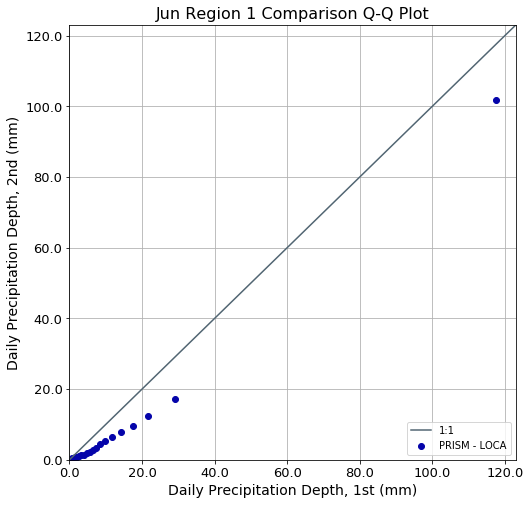

In [308]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun1PRQs, Jun1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

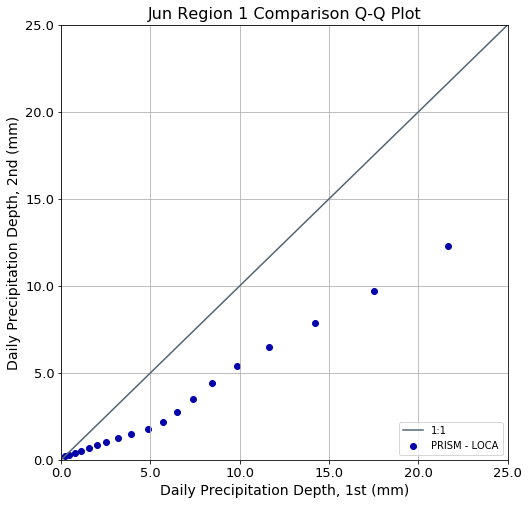

In [309]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun1PRQs, Jun1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

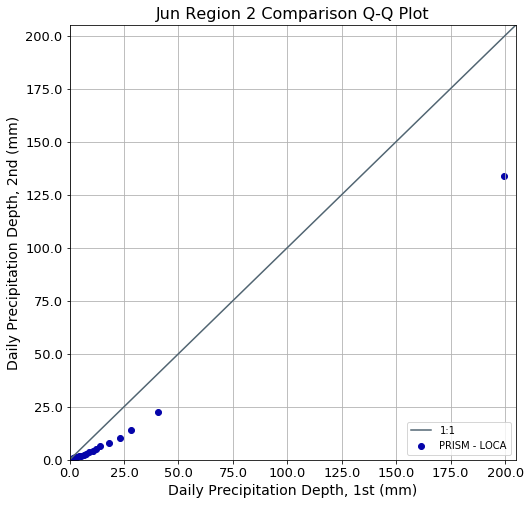

In [310]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun2PRQs, Jun2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

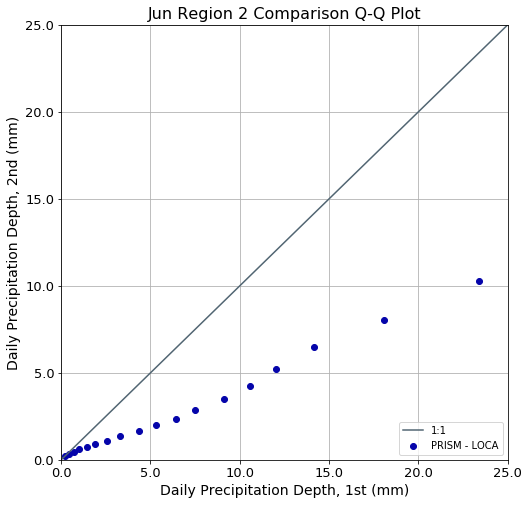

In [311]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun2PRQs, Jun2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

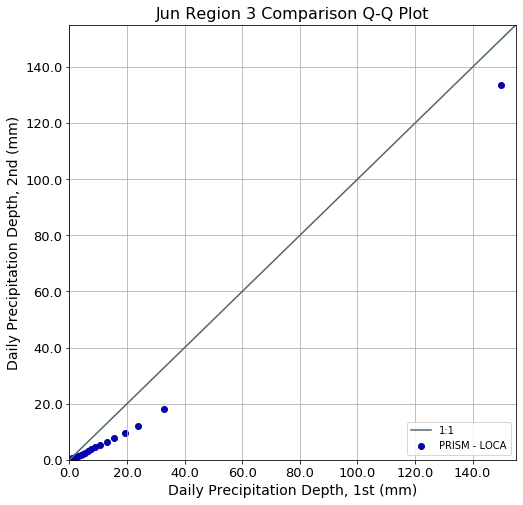

In [312]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun3PRQs, Jun3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

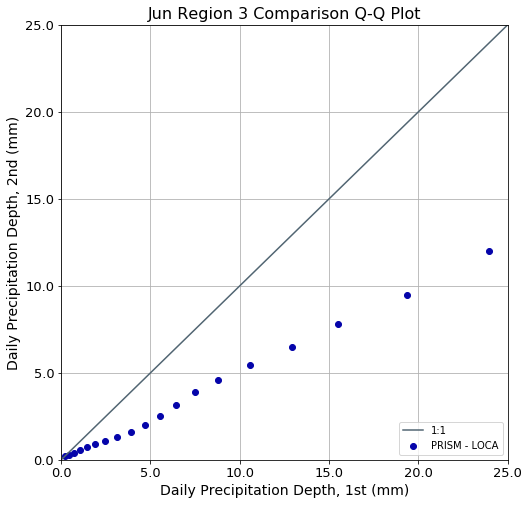

In [313]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun3PRQs, Jun3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

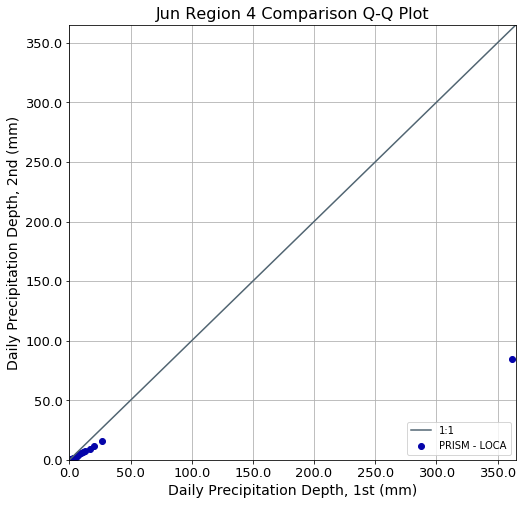

In [314]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun4PRQs, Jun4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

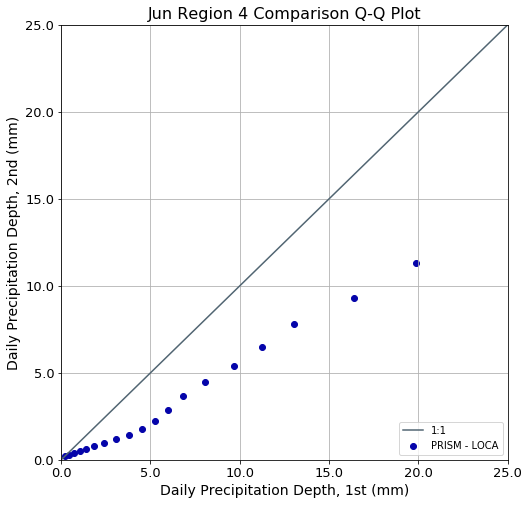

In [315]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun4PRQs, Jun4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

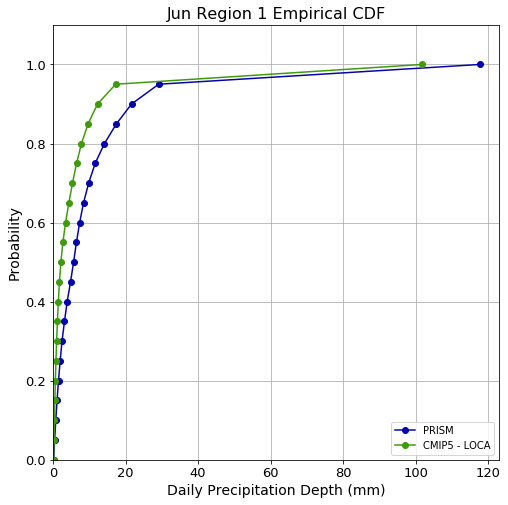

In [316]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jun1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jun Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

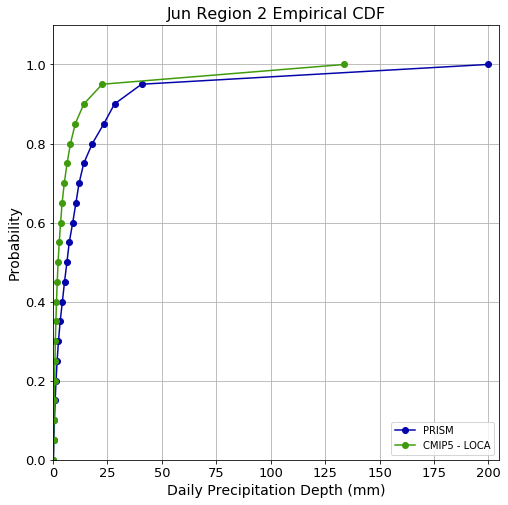

In [317]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jun2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jun Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

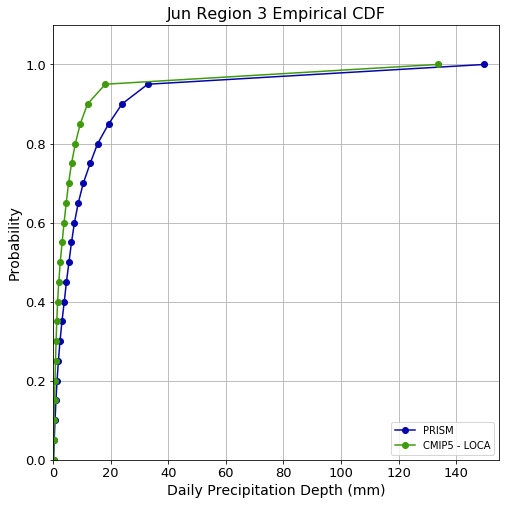

In [318]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jun3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jun Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

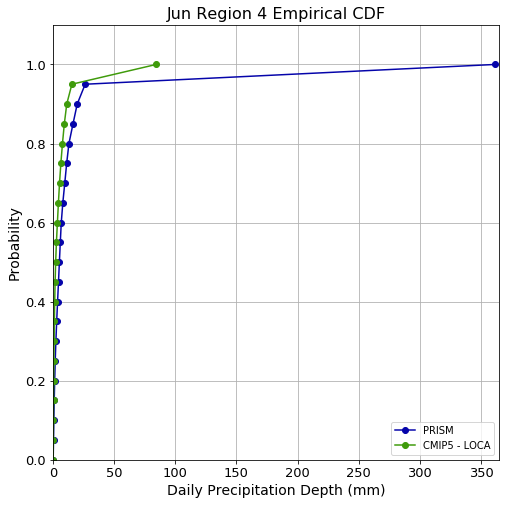

In [319]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jun4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jun Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

In [320]:
JulNum = 7

In [321]:
Jul1PRDF = JulPRDF[JulPRDF["Region_Id"] == 1].copy()
Jul2PRDF = JulPRDF[JulPRDF["Region_Id"] == 2].copy()
Jul3PRDF = JulPRDF[JulPRDF["Region_Id"] == 3].copy()
Jul4PRDF = JulPRDF[JulPRDF["Region_Id"] == 4].copy()

In [322]:
Jul1LODF = JulLODF[JulLODF["PRegion_Id"] == 1].copy()
Jul2LODF = JulLODF[JulLODF["PRegion_Id"] == 2].copy()
Jul3LODF = JulLODF[JulLODF["PRegion_Id"] == 3].copy()
Jul4LODF = JulLODF[JulLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [323]:
Jul1PRBSCI = sstats.bayes_mvs( np.array( Jul1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2PRBSCI = sstats.bayes_mvs( np.array( Jul2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3PRBSCI = sstats.bayes_mvs( np.array( Jul3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4PRBSCI = sstats.bayes_mvs( np.array( Jul4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [324]:
Jul1LOBSCI = sstats.bayes_mvs( np.array( Jul1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2LOBSCI = sstats.bayes_mvs( np.array( Jul2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3LOBSCI = sstats.bayes_mvs( np.array( Jul3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4LOBSCI = sstats.bayes_mvs( np.array( Jul4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [325]:
CMonList.append( JulNum )
CZoneList.append( 1 )
SPRMean.append( Jul1PRBSCI[0][0] )
SPRMeanMinCI.append( Jul1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jul1PRBSCI[0][1][1] )
SPRVar.append( Jul1PRBSCI[1][0] )
SPRVarMinCI.append( Jul1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jul1PRBSCI[1][1][1] )
SPRStd.append( Jul1PRBSCI[2][0] )
SPRStdMinCI.append( Jul1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jul1PRBSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 2 )
SPRMean.append( Jul2PRBSCI[0][0] )
SPRMeanMinCI.append( Jul2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jul2PRBSCI[0][1][1] )
SPRVar.append( Jul2PRBSCI[1][0] )
SPRVarMinCI.append( Jul2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jul2PRBSCI[1][1][1] )
SPRStd.append( Jul2PRBSCI[2][0] )
SPRStdMinCI.append( Jul2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jul2PRBSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 3 )
SPRMean.append( Jul3PRBSCI[0][0] )
SPRMeanMinCI.append( Jul3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jul3PRBSCI[0][1][1] )
SPRVar.append( Jul3PRBSCI[1][0] )
SPRVarMinCI.append( Jul3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jul3PRBSCI[1][1][1] )
SPRStd.append( Jul3PRBSCI[2][0] )
SPRStdMinCI.append( Jul3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jul3PRBSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 4 )
SPRMean.append( Jul4PRBSCI[0][0] )
SPRMeanMinCI.append( Jul4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Jul4PRBSCI[0][1][1] )
SPRVar.append( Jul4PRBSCI[1][0] )
SPRVarMinCI.append( Jul4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Jul4PRBSCI[1][1][1] )
SPRStd.append( Jul4PRBSCI[2][0] )
SPRStdMinCI.append( Jul4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Jul4PRBSCI[2][1][1] )

In [326]:
SLOMean.append( Jul1LOBSCI[0][0] )
SLOMeanMinCI.append( Jul1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jul1LOBSCI[0][1][1] )
SLOVar.append( Jul1LOBSCI[1][0] )
SLOVarMinCI.append( Jul1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jul1LOBSCI[1][1][1] )
SLOStd.append( Jul1LOBSCI[2][0] )
SLOStdMinCI.append( Jul1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jul1LOBSCI[2][1][1] )
SLOMean.append( Jul2LOBSCI[0][0] )
SLOMeanMinCI.append( Jul2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jul2LOBSCI[0][1][1] )
SLOVar.append( Jul2LOBSCI[1][0] )
SLOVarMinCI.append( Jul2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jul2LOBSCI[1][1][1] )
SLOStd.append( Jul2LOBSCI[2][0] )
SLOStdMinCI.append( Jul2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jul2LOBSCI[2][1][1] )
SLOMean.append( Jul3LOBSCI[0][0] )
SLOMeanMinCI.append( Jul3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jul3LOBSCI[0][1][1] )
SLOVar.append( Jul3LOBSCI[1][0] )
SLOVarMinCI.append( Jul3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jul3LOBSCI[1][1][1] )
SLOStd.append( Jul3LOBSCI[2][0] )
SLOStdMinCI.append( Jul3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jul3LOBSCI[2][1][1] )
SLOMean.append( Jul4LOBSCI[0][0] )
SLOMeanMinCI.append( Jul4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Jul4LOBSCI[0][1][1] )
SLOVar.append( Jul4LOBSCI[1][0] )
SLOVarMinCI.append( Jul4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Jul4LOBSCI[1][1][1] )
SLOStd.append( Jul4LOBSCI[2][0] )
SLOStdMinCI.append( Jul4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Jul4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [327]:
Jul1TTPRtoLO = sstats.ttest_ind( np.array( Jul1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul1LODF["Precip_mm"], dtype=np.int32 ) )

In [328]:
Jul1TTPRtoLOPval = Jul1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Jul1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 6.05615e-306


In [329]:
Jul2TTPRtoLO = sstats.ttest_ind( np.array( Jul2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul2LODF["Precip_mm"], dtype=np.int32 ) )

In [330]:
Jul2TTPRtoLOPval = Jul2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Jul2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 1.70454e-115


In [331]:
Jul3TTPRtoLO = sstats.ttest_ind( np.array( Jul3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul3LODF["Precip_mm"], dtype=np.int32 ) )

In [332]:
Jul3TTPRtoLOPval = Jul3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Jul3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 3.60929e-191


In [333]:
Jul4TTPRtoLO = sstats.ttest_ind( np.array( Jul4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul4LODF["Precip_mm"], dtype=np.int32 ) )

In [334]:
Jul4TTPRtoLOPval = Jul4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Jul4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 2.32904e-37


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [335]:
Jul1MWUPRtoLO = sstats.mannwhitneyu( np.array( Jul1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [336]:
Jul1MWUPRtoLOPval = Jul1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Jul1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 0


In [337]:
Jul2MWUPRtoLO = sstats.mannwhitneyu( np.array( Jul2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [338]:
Jul2MWUPRtoLOPval = Jul2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Jul2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 4.25903e-199


In [339]:
Jul3MWUPRtoLO = sstats.mannwhitneyu( np.array( Jul3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [340]:
Jul3MWUPRtoLOPval = Jul3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Jul3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 1.41634e-245


In [341]:
Jul4MWUPRtoLO = sstats.mannwhitneyu( np.array( Jul4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [342]:
Jul4MWUPRtoLOPval = Jul4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Jul4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 6.15147e-52


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [343]:
Jul1KWPRtoLO = sstats.kruskal( np.array( Jul1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul1LODF["Precip_mm"], dtype=np.int32 ) )

In [344]:
Jul1KWPRtoLOPval = Jul1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Jul1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [345]:
Jul2KWPRtoLO = sstats.kruskal( np.array( Jul2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul2LODF["Precip_mm"], dtype=np.int32 ) )

In [346]:
Jul2KWPRtoLOPval = Jul2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Jul2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 0


In [347]:
Jul3KWPRtoLO = sstats.kruskal( np.array( Jul3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul3LODF["Precip_mm"], dtype=np.int32 ) )

In [348]:
Jul3KWPRtoLOPval = Jul3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Jul3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 0


In [349]:
Jul4KWPRtoLO = sstats.kruskal( np.array( Jul4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul4LODF["Precip_mm"], dtype=np.int32 ) )

In [350]:
Jul4KWPRtoLOPval = Jul4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Jul4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1


In [351]:
Jul1LODF["Precip_mm"].median(), Jul1PRDF["Precip_mm"].median()

(2.0572729110717773, 3.869999885559082)

In [352]:
Jul2LODF["Precip_mm"].median(), Jul2PRDF["Precip_mm"].median()

(2.18184757232666, 4.670000076293945)

In [353]:
Jul3LODF["Precip_mm"].median(), Jul3PRDF["Precip_mm"].median()

(1.9410607814788818, 4.130000114440918)

In [354]:
Jul4LODF["Precip_mm"].median(), Jul4PRDF["Precip_mm"].median()

(2.202869176864624, 3.2799999713897705)

#### Plots

In [355]:
Jul1PRQs = Jul1PRDF["Precip_mm"].quantile(q=nCompQs)
Jul1LOQs = Jul1LODF["Precip_mm"].quantile(q=nCompQs)
Jul2PRQs = Jul2PRDF["Precip_mm"].quantile(q=nCompQs)
Jul2LOQs = Jul2LODF["Precip_mm"].quantile(q=nCompQs)
Jul3PRQs = Jul3PRDF["Precip_mm"].quantile(q=nCompQs)
Jul3LOQs = Jul3LODF["Precip_mm"].quantile(q=nCompQs)
Jul4PRQs = Jul4PRDF["Precip_mm"].quantile(q=nCompQs)
Jul4LOQs = Jul4LODF["Precip_mm"].quantile(q=nCompQs)

In [356]:
max1Qs = max( Jul1PRQs.max(), Jul1LOQs.max())
max1Qs = round(max1Qs) + 4.0
max1Qs

136.0

In [357]:
max2Qs = max( Jul2PRQs.max(), Jul2LOQs.max() )
max2Qs = round(max2Qs) + 1.0
max2Qs

145.0

In [358]:
max3Qs = max( Jul3PRQs.max(), Jul3LOQs.max() )
max3Qs = round(max3Qs) + 3.0
max3Qs

130.0

In [359]:
max4Qs = max( Jul4PRQs.max(), Jul4LOQs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

120.0

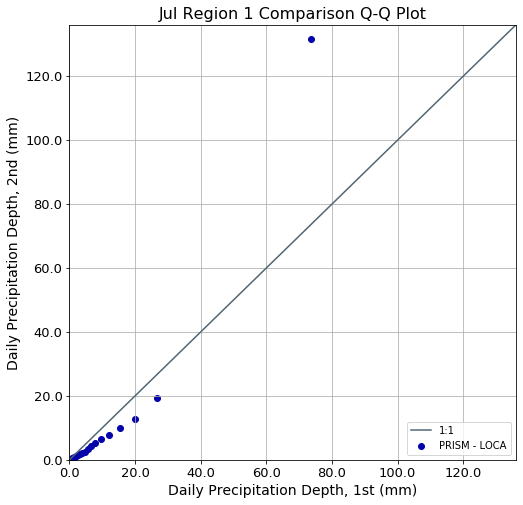

In [360]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul1PRQs, Jul1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [361]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul1PRQs, Jul1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

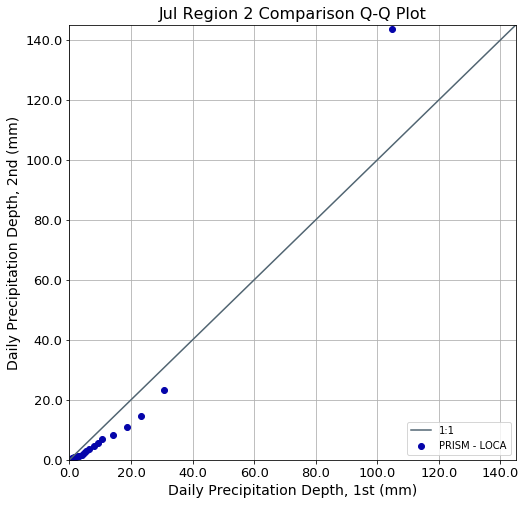

In [362]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul2PRQs, Jul2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [363]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul2PRQs, Jul2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [364]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul3PRQs, Jul3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

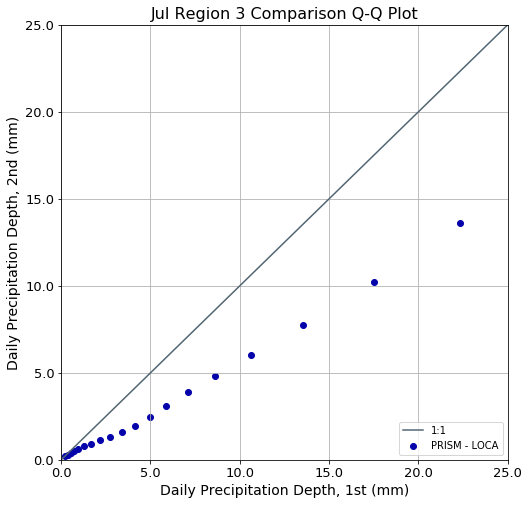

In [365]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul3PRQs, Jul3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [366]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul4PRQs, Jul4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

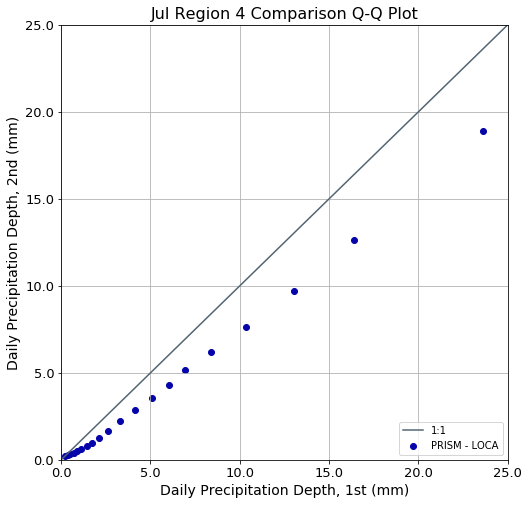

In [367]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul4PRQs, Jul4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [368]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jul1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jul Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

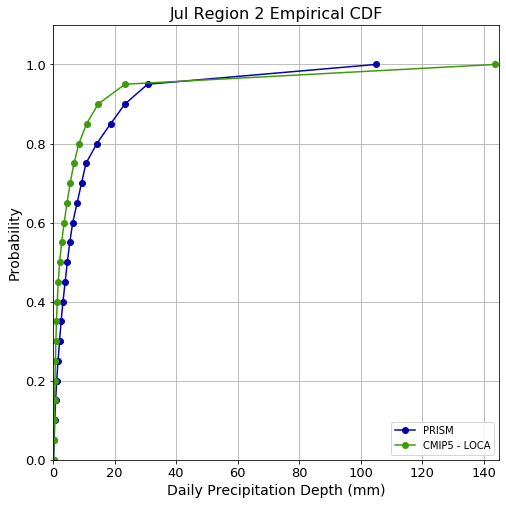

In [369]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jul2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jul Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [370]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jul3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jul Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [371]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Jul4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Jul Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

In [372]:
AugNum = 8

In [373]:
Aug1PRDF = AugPRDF[AugPRDF["Region_Id"] == 1].copy()
Aug2PRDF = AugPRDF[AugPRDF["Region_Id"] == 2].copy()
Aug3PRDF = AugPRDF[AugPRDF["Region_Id"] == 3].copy()
Aug4PRDF = AugPRDF[AugPRDF["Region_Id"] == 4].copy()

In [374]:
Aug1LODF = AugLODF[AugLODF["PRegion_Id"] == 1].copy()
Aug2LODF = AugLODF[AugLODF["PRegion_Id"] == 2].copy()
Aug3LODF = AugLODF[AugLODF["PRegion_Id"] == 3].copy()
Aug4LODF = AugLODF[AugLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [375]:
Aug1PRBSCI = sstats.bayes_mvs( np.array( Aug1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2PRBSCI = sstats.bayes_mvs( np.array( Aug2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3PRBSCI = sstats.bayes_mvs( np.array( Aug3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4PRBSCI = sstats.bayes_mvs( np.array( Aug4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [376]:
Aug1LOBSCI = sstats.bayes_mvs( np.array( Aug1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2LOBSCI = sstats.bayes_mvs( np.array( Aug2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3LOBSCI = sstats.bayes_mvs( np.array( Aug3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4LOBSCI = sstats.bayes_mvs( np.array( Aug4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [377]:
CMonList.append( AugNum )
CZoneList.append( 1 )
SPRMean.append( Aug1PRBSCI[0][0] )
SPRMeanMinCI.append( Aug1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Aug1PRBSCI[0][1][1] )
SPRVar.append( Aug1PRBSCI[1][0] )
SPRVarMinCI.append( Aug1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Aug1PRBSCI[1][1][1] )
SPRStd.append( Aug1PRBSCI[2][0] )
SPRStdMinCI.append( Aug1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Aug1PRBSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 2 )
SPRMean.append( Aug2PRBSCI[0][0] )
SPRMeanMinCI.append( Aug2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Aug2PRBSCI[0][1][1] )
SPRVar.append( Aug2PRBSCI[1][0] )
SPRVarMinCI.append( Aug2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Aug2PRBSCI[1][1][1] )
SPRStd.append( Aug2PRBSCI[2][0] )
SPRStdMinCI.append( Aug2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Aug2PRBSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 3 )
SPRMean.append( Aug3PRBSCI[0][0] )
SPRMeanMinCI.append( Aug3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Aug3PRBSCI[0][1][1] )
SPRVar.append( Aug3PRBSCI[1][0] )
SPRVarMinCI.append( Aug3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Aug3PRBSCI[1][1][1] )
SPRStd.append( Aug3PRBSCI[2][0] )
SPRStdMinCI.append( Aug3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Aug3PRBSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 4 )
SPRMean.append( Aug4PRBSCI[0][0] )
SPRMeanMinCI.append( Aug4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Aug4PRBSCI[0][1][1] )
SPRVar.append( Aug4PRBSCI[1][0] )
SPRVarMinCI.append( Aug4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Aug4PRBSCI[1][1][1] )
SPRStd.append( Aug4PRBSCI[2][0] )
SPRStdMinCI.append( Aug4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Aug4PRBSCI[2][1][1] )

In [378]:
SLOMean.append( Aug1LOBSCI[0][0] )
SLOMeanMinCI.append( Aug1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Aug1LOBSCI[0][1][1] )
SLOVar.append( Aug1LOBSCI[1][0] )
SLOVarMinCI.append( Aug1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Aug1LOBSCI[1][1][1] )
SLOStd.append( Aug1LOBSCI[2][0] )
SLOStdMinCI.append( Aug1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Aug1LOBSCI[2][1][1] )
SLOMean.append( Aug2LOBSCI[0][0] )
SLOMeanMinCI.append( Aug2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Aug2LOBSCI[0][1][1] )
SLOVar.append( Aug2LOBSCI[1][0] )
SLOVarMinCI.append( Aug2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Aug2LOBSCI[1][1][1] )
SLOStd.append( Aug2LOBSCI[2][0] )
SLOStdMinCI.append( Aug2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Aug2LOBSCI[2][1][1] )
SLOMean.append( Aug3LOBSCI[0][0] )
SLOMeanMinCI.append( Aug3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Aug3LOBSCI[0][1][1] )
SLOVar.append( Aug3LOBSCI[1][0] )
SLOVarMinCI.append( Aug3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Aug3LOBSCI[1][1][1] )
SLOStd.append( Aug3LOBSCI[2][0] )
SLOStdMinCI.append( Aug3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Aug3LOBSCI[2][1][1] )
SLOMean.append( Aug4LOBSCI[0][0] )
SLOMeanMinCI.append( Aug4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Aug4LOBSCI[0][1][1] )
SLOVar.append( Aug4LOBSCI[1][0] )
SLOVarMinCI.append( Aug4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Aug4LOBSCI[1][1][1] )
SLOStd.append( Aug4LOBSCI[2][0] )
SLOStdMinCI.append( Aug4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Aug4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [379]:
Aug1TTPRtoLO = sstats.ttest_ind( np.array( Aug1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug1LODF["Precip_mm"], dtype=np.int32 ) )

In [380]:
Aug1TTPRtoLOPval = Aug1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Aug1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 1.69412e-269


In [381]:
Aug2TTPRtoLO = sstats.ttest_ind( np.array( Aug2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug2LODF["Precip_mm"], dtype=np.int32 ) )

In [382]:
Aug2TTPRtoLOPval = Aug2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Aug2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 2.3484e-111


In [383]:
Aug3TTPRtoLO = sstats.ttest_ind( np.array( Aug3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug3LODF["Precip_mm"], dtype=np.int32 ) )

In [384]:
Aug3TTPRtoLOPval = Aug3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Aug3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 7.38037e-93


In [385]:
Aug4TTPRtoLO = sstats.ttest_ind( np.array( Aug4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug4LODF["Precip_mm"], dtype=np.int32 ) )

In [386]:
Aug4TTPRtoLOPval = Aug4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Aug4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [387]:
Aug1MWUPRtoLO = sstats.mannwhitneyu( np.array( Aug1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [388]:
Aug1MWUPRtoLOPval = Aug1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Aug1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 5.4349e-208


In [389]:
Aug2MWUPRtoLO = sstats.mannwhitneyu( np.array( Aug2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [390]:
Aug2MWUPRtoLOPval = Aug2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Aug2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 6.82513e-52


In [391]:
Aug3MWUPRtoLO = sstats.mannwhitneyu( np.array( Aug3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [392]:
Aug3MWUPRtoLOPval = Aug3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Aug3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 2.72904e-47


In [393]:
Aug4MWUPRtoLO = sstats.mannwhitneyu( np.array( Aug4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [394]:
Aug4MWUPRtoLOPval = Aug4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Aug4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [395]:
Aug1KWPRtoLO = sstats.kruskal( np.array( Aug1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug1LODF["Precip_mm"], dtype=np.int32 ) )

In [396]:
Aug1KWPRtoLOPval = Aug1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Aug1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 1


In [397]:
Aug2KWPRtoLO = sstats.kruskal( np.array( Aug2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug2LODF["Precip_mm"], dtype=np.int32 ) )

In [398]:
Aug2KWPRtoLOPval = Aug2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Aug2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 0


In [399]:
Aug3KWPRtoLO = sstats.kruskal( np.array( Aug3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug3LODF["Precip_mm"], dtype=np.int32 ) )

In [400]:
Aug3KWPRtoLOPval = Aug3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Aug3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [401]:
Aug4KWPRtoLO = sstats.kruskal( np.array( Aug4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug4LODF["Precip_mm"], dtype=np.int32 ) )

In [402]:
Aug4KWPRtoLOPval = Aug4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Aug4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [403]:
Aug1LODF["Precip_mm"].median(), Aug1PRDF["Precip_mm"].median()

(2.7746329307556152, 4.130000114440918)

In [404]:
Aug2LODF["Precip_mm"].median(), Aug2PRDF["Precip_mm"].median()

(2.888530969619751, 3.7899999618530273)

In [405]:
Aug3LODF["Precip_mm"].median(), Aug3PRDF["Precip_mm"].median()

(3.5493922233581543, 4.960000038146973)

In [406]:
Aug4LODF["Precip_mm"].median(), Aug4PRDF["Precip_mm"].median()

(2.472048759460449, 4.710000038146973)

#### Plots

In [407]:
Aug1PRQs = Aug1PRDF["Precip_mm"].quantile(q=nCompQs)
Aug1LOQs = Aug1LODF["Precip_mm"].quantile(q=nCompQs)
Aug2PRQs = Aug2PRDF["Precip_mm"].quantile(q=nCompQs)
Aug2LOQs = Aug2LODF["Precip_mm"].quantile(q=nCompQs)
Aug3PRQs = Aug3PRDF["Precip_mm"].quantile(q=nCompQs)
Aug3LOQs = Aug3LODF["Precip_mm"].quantile(q=nCompQs)
Aug4PRQs = Aug4PRDF["Precip_mm"].quantile(q=nCompQs)
Aug4LOQs = Aug4LODF["Precip_mm"].quantile(q=nCompQs)

In [408]:
max1Qs = max( Aug1PRQs.max(), Aug1LOQs.max() )
max1Qs = round(max1Qs) + 5.0
max1Qs

210.0

In [409]:
max2Qs = max( Aug2PRQs.max(), Aug2LOQs.max() )
max2Qs = round(max2Qs) + 2.0
max2Qs

230.0

In [410]:
max3Qs = max( Aug3PRQs.max(), Aug3LOQs.max() )
max3Qs = round(max3Qs) + 5.0
max3Qs

255.0

In [411]:
max4Qs = max( Aug4PRQs.max(), Aug4LOQs.max() )
max4Qs = round(max4Qs) + 5.0
max4Qs

240.0

In [412]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug1PRQs, Aug1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

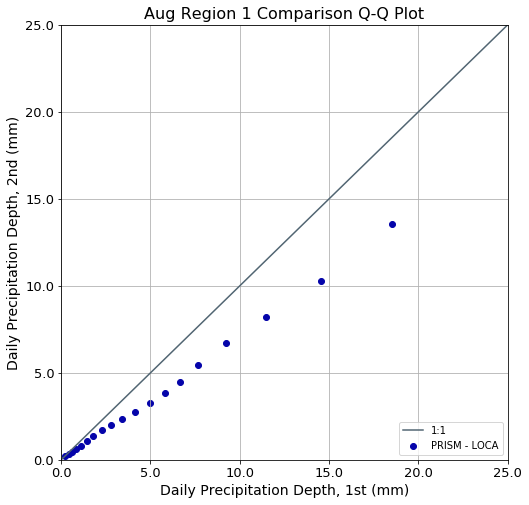

In [413]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug1PRQs, Aug1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [414]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug2PRQs, Aug2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

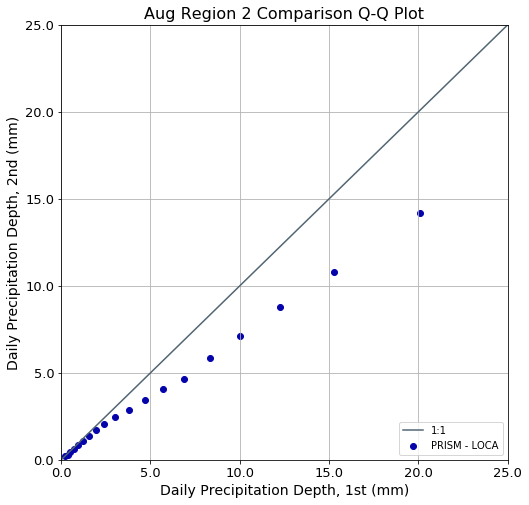

In [415]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug2PRQs, Aug2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

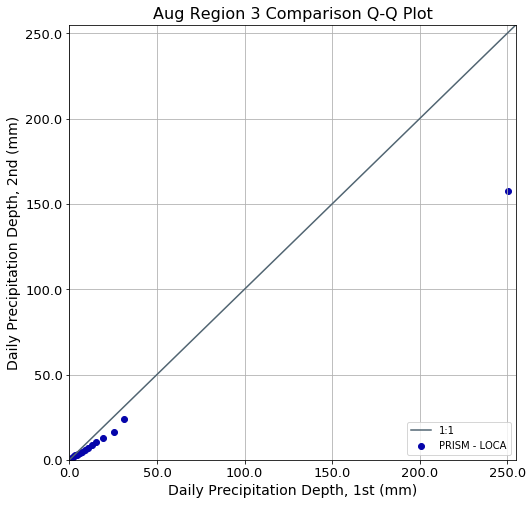

In [416]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug3PRQs, Aug3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

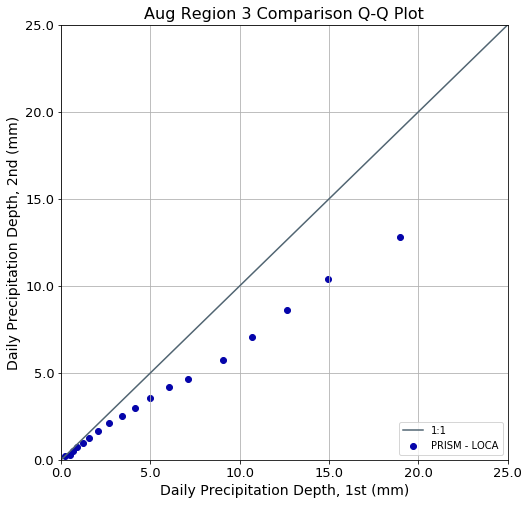

In [417]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug3PRQs, Aug3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [418]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug4PRQs, Aug4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

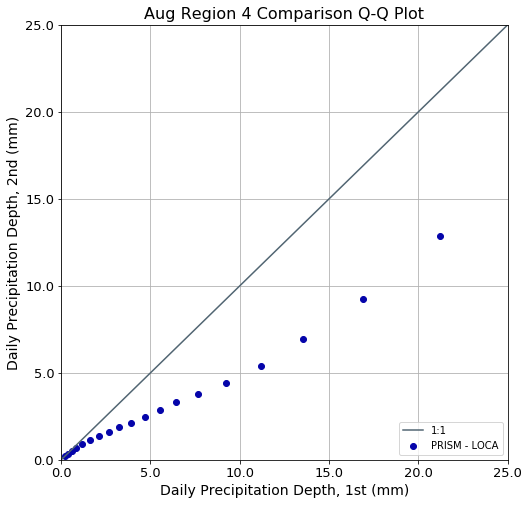

In [419]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug4PRQs, Aug4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [420]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Aug1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Aug Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

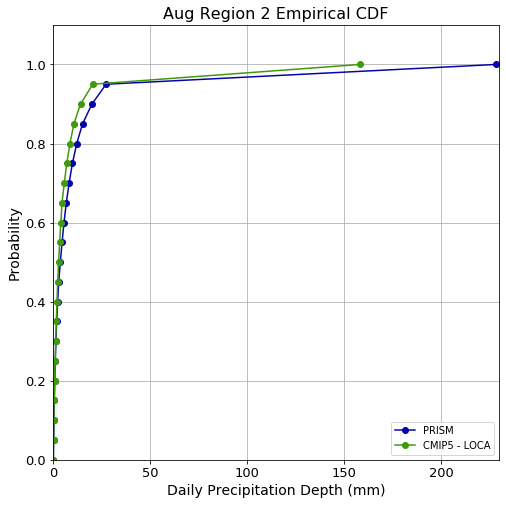

In [421]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Aug2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Aug Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

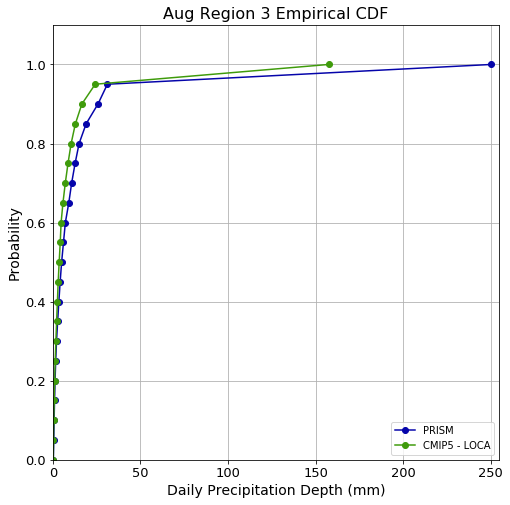

In [422]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Aug3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Aug Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

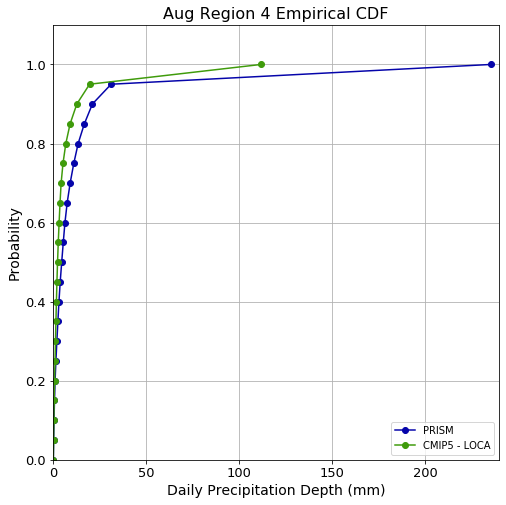

In [423]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Aug4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Aug Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

In [424]:
SepNum = 9

In [425]:
Sep1PRDF = SepPRDF[SepPRDF["Region_Id"] == 1].copy()
Sep2PRDF = SepPRDF[SepPRDF["Region_Id"] == 2].copy()
Sep3PRDF = SepPRDF[SepPRDF["Region_Id"] == 3].copy()
Sep4PRDF = SepPRDF[SepPRDF["Region_Id"] == 4].copy()

In [426]:
Sep1LODF = SepLODF[SepLODF["PRegion_Id"] == 1].copy()
Sep2LODF = SepLODF[SepLODF["PRegion_Id"] == 2].copy()
Sep3LODF = SepLODF[SepLODF["PRegion_Id"] == 3].copy()
Sep4LODF = SepLODF[SepLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [427]:
Sep1PRBSCI = sstats.bayes_mvs( np.array( Sep1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2PRBSCI = sstats.bayes_mvs( np.array( Sep2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3PRBSCI = sstats.bayes_mvs( np.array( Sep3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4PRBSCI = sstats.bayes_mvs( np.array( Sep4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [428]:
Sep1LOBSCI = sstats.bayes_mvs( np.array( Sep1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2LOBSCI = sstats.bayes_mvs( np.array( Sep2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3LOBSCI = sstats.bayes_mvs( np.array( Sep3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4LOBSCI = sstats.bayes_mvs( np.array( Sep4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [429]:
CMonList.append( SepNum )
CZoneList.append( 1 )
SPRMean.append( Sep1PRBSCI[0][0] )
SPRMeanMinCI.append( Sep1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Sep1PRBSCI[0][1][1] )
SPRVar.append( Sep1PRBSCI[1][0] )
SPRVarMinCI.append( Sep1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Sep1PRBSCI[1][1][1] )
SPRStd.append( Sep1PRBSCI[2][0] )
SPRStdMinCI.append( Sep1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Sep1PRBSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 2 )
SPRMean.append( Sep2PRBSCI[0][0] )
SPRMeanMinCI.append( Sep2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Sep2PRBSCI[0][1][1] )
SPRVar.append( Sep2PRBSCI[1][0] )
SPRVarMinCI.append( Sep2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Sep2PRBSCI[1][1][1] )
SPRStd.append( Sep2PRBSCI[2][0] )
SPRStdMinCI.append( Sep2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Sep2PRBSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 3 )
SPRMean.append( Sep3PRBSCI[0][0] )
SPRMeanMinCI.append( Sep3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Sep3PRBSCI[0][1][1] )
SPRVar.append( Sep3PRBSCI[1][0] )
SPRVarMinCI.append( Sep3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Sep3PRBSCI[1][1][1] )
SPRStd.append( Sep3PRBSCI[2][0] )
SPRStdMinCI.append( Sep3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Sep3PRBSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 4 )
SPRMean.append( Sep4PRBSCI[0][0] )
SPRMeanMinCI.append( Sep4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Sep4PRBSCI[0][1][1] )
SPRVar.append( Sep4PRBSCI[1][0] )
SPRVarMinCI.append( Sep4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Sep4PRBSCI[1][1][1] )
SPRStd.append( Sep4PRBSCI[2][0] )
SPRStdMinCI.append( Sep4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Sep4PRBSCI[2][1][1] )

In [430]:
SLOMean.append( Sep1LOBSCI[0][0] )
SLOMeanMinCI.append( Sep1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Sep1LOBSCI[0][1][1] )
SLOVar.append( Sep1LOBSCI[1][0] )
SLOVarMinCI.append( Sep1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Sep1LOBSCI[1][1][1] )
SLOStd.append( Sep1LOBSCI[2][0] )
SLOStdMinCI.append( Sep1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Sep1LOBSCI[2][1][1] )
SLOMean.append( Sep2LOBSCI[0][0] )
SLOMeanMinCI.append( Sep2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Sep2LOBSCI[0][1][1] )
SLOVar.append( Sep2LOBSCI[1][0] )
SLOVarMinCI.append( Sep2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Sep2LOBSCI[1][1][1] )
SLOStd.append( Sep2LOBSCI[2][0] )
SLOStdMinCI.append( Sep2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Sep2LOBSCI[2][1][1] )
SLOMean.append( Sep3LOBSCI[0][0] )
SLOMeanMinCI.append( Sep3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Sep3LOBSCI[0][1][1] )
SLOVar.append( Sep3LOBSCI[1][0] )
SLOVarMinCI.append( Sep3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Sep3LOBSCI[1][1][1] )
SLOStd.append( Sep3LOBSCI[2][0] )
SLOStdMinCI.append( Sep3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Sep3LOBSCI[2][1][1] )
SLOMean.append( Sep4LOBSCI[0][0] )
SLOMeanMinCI.append( Sep4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Sep4LOBSCI[0][1][1] )
SLOVar.append( Sep4LOBSCI[1][0] )
SLOVarMinCI.append( Sep4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Sep4LOBSCI[1][1][1] )
SLOStd.append( Sep4LOBSCI[2][0] )
SLOStdMinCI.append( Sep4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Sep4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [431]:
Sep1TTPRtoLO = sstats.ttest_ind( np.array( Sep1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep1LODF["Precip_mm"], dtype=np.int32 ) )

In [432]:
Sep1TTPRtoLOPval = Sep1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Sep1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 4.73698e-29


In [433]:
Sep2TTPRtoLO = sstats.ttest_ind( np.array( Sep2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep2LODF["Precip_mm"], dtype=np.int32 ) )

In [434]:
Sep2TTPRtoLOPval = Sep2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Sep2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 2.20818e-248


In [435]:
Sep3TTPRtoLO = sstats.ttest_ind( np.array( Sep3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep3LODF["Precip_mm"], dtype=np.int32 ) )

In [436]:
Sep3TTPRtoLOPval = Sep3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Sep3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [437]:
Sep4TTPRtoLO = sstats.ttest_ind( np.array( Sep4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep4LODF["Precip_mm"], dtype=np.int32 ) )

In [438]:
Sep4TTPRtoLOPval = Sep4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Sep4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 1.03448e-179


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [439]:
Sep1MWUPRtoLO = sstats.mannwhitneyu( np.array( Sep1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [440]:
Sep1MWUPRtoLOPval = Sep1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Sep1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 9.57973e-11


In [441]:
Sep2MWUPRtoLO = sstats.mannwhitneyu( np.array( Sep2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [442]:
Sep2MWUPRtoLOPval = Sep2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Sep2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 2.80199e-176


In [443]:
Sep3MWUPRtoLO = sstats.mannwhitneyu( np.array( Sep3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [444]:
Sep3MWUPRtoLOPval = Sep3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Sep3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 7.34116e-204


In [445]:
Sep4MWUPRtoLO = sstats.mannwhitneyu( np.array( Sep4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [446]:
Sep4MWUPRtoLOPval = Sep4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Sep4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 8.50235e-158


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [447]:
Sep1KWPRtoLO = sstats.kruskal( np.array( Sep1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep1LODF["Precip_mm"], dtype=np.int32 ) )

In [448]:
Sep1KWPRtoLOPval = Sep1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Sep1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [449]:
Sep2KWPRtoLO = sstats.kruskal( np.array( Sep2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep2LODF["Precip_mm"], dtype=np.int32 ) )

In [450]:
Sep2KWPRtoLOPval = Sep2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Sep2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [451]:
Sep3KWPRtoLO = sstats.kruskal( np.array( Sep3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep3LODF["Precip_mm"], dtype=np.int32 ) )

In [452]:
Sep3KWPRtoLOPval = Sep3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Sep3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [453]:
Sep4KWPRtoLO = sstats.kruskal( np.array( Sep4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep4LODF["Precip_mm"], dtype=np.int32 ) )

In [454]:
Sep4KWPRtoLOPval = Sep4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Sep4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [455]:
Sep1LODF["Precip_mm"].median(), Sep1PRDF["Precip_mm"].median()

(3.4871022701263428, 4.309999942779541)

In [456]:
Sep2LODF["Precip_mm"].median(), Sep2PRDF["Precip_mm"].median()

(3.1366283893585205, 4.760000228881836)

In [457]:
Sep3LODF["Precip_mm"].median(), Sep3PRDF["Precip_mm"].median()

(2.8793649673461914, 4.704999923706055)

In [458]:
Sep4LODF["Precip_mm"].median(), Sep4PRDF["Precip_mm"].median()

(3.0165929794311523, 4.309999942779541)

#### Plots

In [459]:
Sep1PRQs = Sep1PRDF["Precip_mm"].quantile(q=nCompQs)
Sep1LOQs = Sep1LODF["Precip_mm"].quantile(q=nCompQs)
Sep2PRQs = Sep2PRDF["Precip_mm"].quantile(q=nCompQs)
Sep2LOQs = Sep2LODF["Precip_mm"].quantile(q=nCompQs)
Sep3PRQs = Sep3PRDF["Precip_mm"].quantile(q=nCompQs)
Sep3LOQs = Sep3LODF["Precip_mm"].quantile(q=nCompQs)
Sep4PRQs = Sep4PRDF["Precip_mm"].quantile(q=nCompQs)
Sep4LOQs = Sep4LODF["Precip_mm"].quantile(q=nCompQs)

In [460]:
max1Qs = max( Sep1PRQs.max(), Sep1LOQs.max() )
max1Qs = round(max1Qs) + 4.0
max1Qs

155.0

In [461]:
max2Qs = max( Sep2PRQs.max(), Sep2LOQs.max() )
max2Qs = round(max2Qs) + 2.0
max2Qs

185.0

In [462]:
max3Qs = max( Sep3PRQs.max(), Sep3LOQs.max() )
max3Qs = round(max3Qs) + 5.0
max3Qs

136.0

In [463]:
max4Qs = max( Sep4PRQs.max(), Sep4LOQs.max() )
max4Qs = round(max4Qs) + 4.0
max4Qs

163.0

In [464]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep1PRQs, Sep1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [465]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep1PRQs, Sep1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

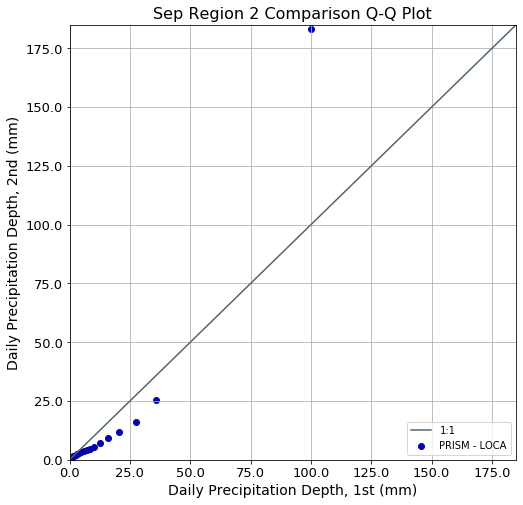

In [466]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep2PRQs, Sep2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

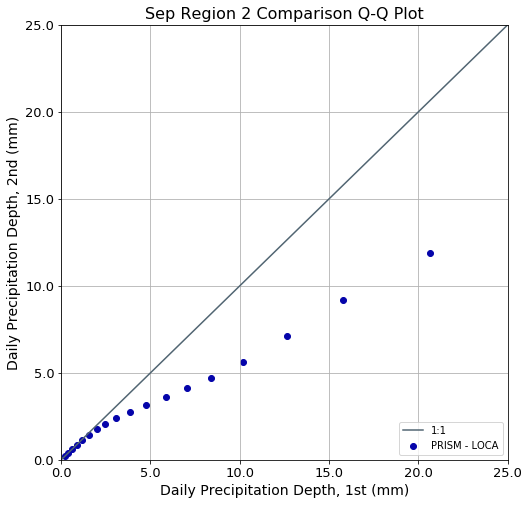

In [467]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep2PRQs, Sep2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

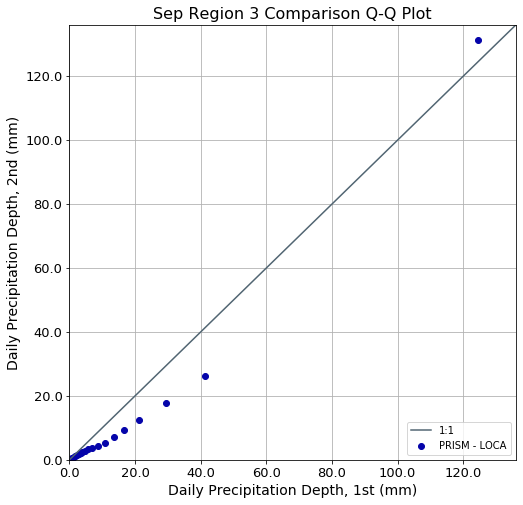

In [468]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep3PRQs, Sep3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [469]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep3PRQs, Sep3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [470]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep4PRQs, Sep4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [471]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep4PRQs, Sep4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

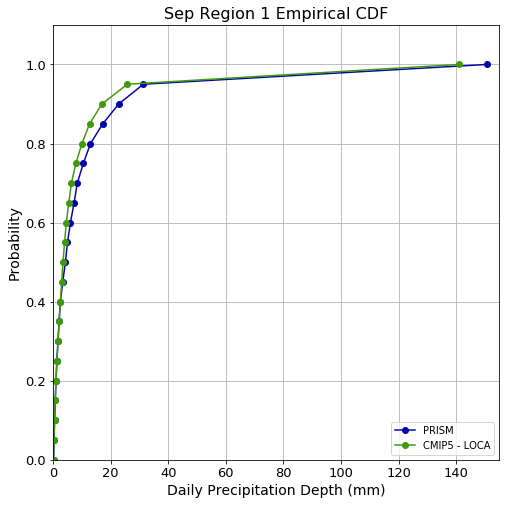

In [472]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Sep1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Sep Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

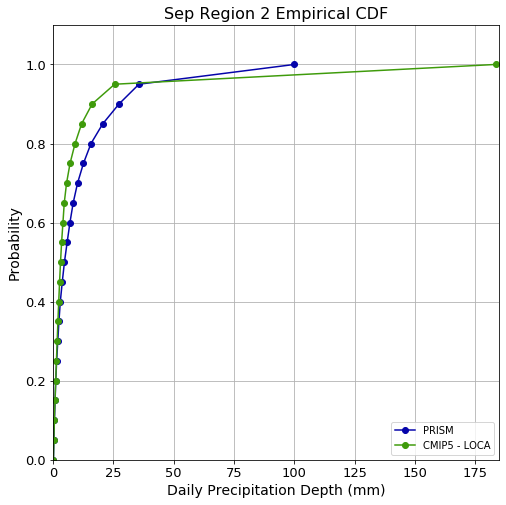

In [473]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Sep2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Sep Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

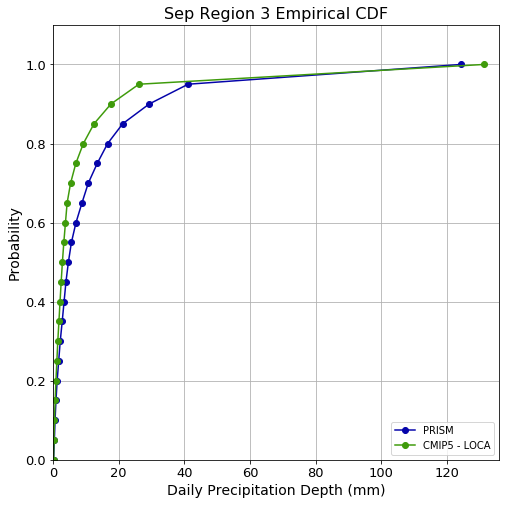

In [474]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Sep3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Sep Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

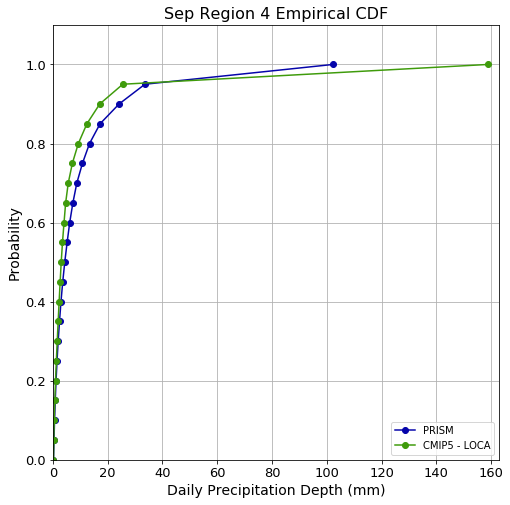

In [475]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Sep4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Sep Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

In [476]:
OctNum = 10

In [477]:
Oct1PRDF = OctPRDF[OctPRDF["Region_Id"] == 1].copy()
Oct2PRDF = OctPRDF[OctPRDF["Region_Id"] == 2].copy()
Oct3PRDF = OctPRDF[OctPRDF["Region_Id"] == 3].copy()
Oct4PRDF = OctPRDF[OctPRDF["Region_Id"] == 4].copy()

In [478]:
Oct1LODF = OctLODF[OctLODF["PRegion_Id"] == 1].copy()
Oct2LODF = OctLODF[OctLODF["PRegion_Id"] == 2].copy()
Oct3LODF = OctLODF[OctLODF["PRegion_Id"] == 3].copy()
Oct4LODF = OctLODF[OctLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [479]:
Oct1PRBSCI = sstats.bayes_mvs( np.array( Oct1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2PRBSCI = sstats.bayes_mvs( np.array( Oct2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3PRBSCI = sstats.bayes_mvs( np.array( Oct3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4PRBSCI = sstats.bayes_mvs( np.array( Oct4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [480]:
Oct1LOBSCI = sstats.bayes_mvs( np.array( Oct1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2LOBSCI = sstats.bayes_mvs( np.array( Oct2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3LOBSCI = sstats.bayes_mvs( np.array( Oct3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4LOBSCI = sstats.bayes_mvs( np.array( Oct4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [481]:
CMonList.append( OctNum )
CZoneList.append( 1 )
SPRMean.append( Oct1PRBSCI[0][0] )
SPRMeanMinCI.append( Oct1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Oct1PRBSCI[0][1][1] )
SPRVar.append( Oct1PRBSCI[1][0] )
SPRVarMinCI.append( Oct1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Oct1PRBSCI[1][1][1] )
SPRStd.append( Oct1PRBSCI[2][0] )
SPRStdMinCI.append( Oct1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Oct1PRBSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 2 )
SPRMean.append( Oct2PRBSCI[0][0] )
SPRMeanMinCI.append( Oct2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Oct2PRBSCI[0][1][1] )
SPRVar.append( Oct2PRBSCI[1][0] )
SPRVarMinCI.append( Oct2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Oct2PRBSCI[1][1][1] )
SPRStd.append( Oct2PRBSCI[2][0] )
SPRStdMinCI.append( Oct2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Oct2PRBSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 3 )
SPRMean.append( Oct3PRBSCI[0][0] )
SPRMeanMinCI.append( Oct3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Oct3PRBSCI[0][1][1] )
SPRVar.append( Oct3PRBSCI[1][0] )
SPRVarMinCI.append( Oct3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Oct3PRBSCI[1][1][1] )
SPRStd.append( Oct3PRBSCI[2][0] )
SPRStdMinCI.append( Oct3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Oct3PRBSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 4 )
SPRMean.append( Oct4PRBSCI[0][0] )
SPRMeanMinCI.append( Oct4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Oct4PRBSCI[0][1][1] )
SPRVar.append( Oct4PRBSCI[1][0] )
SPRVarMinCI.append( Oct4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Oct4PRBSCI[1][1][1] )
SPRStd.append( Oct4PRBSCI[2][0] )
SPRStdMinCI.append( Oct4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Oct4PRBSCI[2][1][1] )

In [482]:
SLOMean.append( Oct1LOBSCI[0][0] )
SLOMeanMinCI.append( Oct1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Oct1LOBSCI[0][1][1] )
SLOVar.append( Oct1LOBSCI[1][0] )
SLOVarMinCI.append( Oct1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Oct1LOBSCI[1][1][1] )
SLOStd.append( Oct1LOBSCI[2][0] )
SLOStdMinCI.append( Oct1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Oct1LOBSCI[2][1][1] )
SLOMean.append( Oct2LOBSCI[0][0] )
SLOMeanMinCI.append( Oct2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Oct2LOBSCI[0][1][1] )
SLOVar.append( Oct2LOBSCI[1][0] )
SLOVarMinCI.append( Oct2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Oct2LOBSCI[1][1][1] )
SLOStd.append( Oct2LOBSCI[2][0] )
SLOStdMinCI.append( Oct2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Oct2LOBSCI[2][1][1] )
SLOMean.append( Oct3LOBSCI[0][0] )
SLOMeanMinCI.append( Oct3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Oct3LOBSCI[0][1][1] )
SLOVar.append( Oct3LOBSCI[1][0] )
SLOVarMinCI.append( Oct3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Oct3LOBSCI[1][1][1] )
SLOStd.append( Oct3LOBSCI[2][0] )
SLOStdMinCI.append( Oct3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Oct3LOBSCI[2][1][1] )
SLOMean.append( Oct4LOBSCI[0][0] )
SLOMeanMinCI.append( Oct4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Oct4LOBSCI[0][1][1] )
SLOVar.append( Oct4LOBSCI[1][0] )
SLOVarMinCI.append( Oct4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Oct4LOBSCI[1][1][1] )
SLOStd.append( Oct4LOBSCI[2][0] )
SLOStdMinCI.append( Oct4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Oct4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [483]:
Oct1TTPRtoLO = sstats.ttest_ind( np.array( Oct1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct1LODF["Precip_mm"], dtype=np.int32 ) )

In [484]:
Oct1TTPRtoLOPval = Oct1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Oct1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [485]:
Oct2TTPRtoLO = sstats.ttest_ind( np.array( Oct2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct2LODF["Precip_mm"], dtype=np.int32 ) )

In [486]:
Oct2TTPRtoLOPval = Oct2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Oct2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 0


In [487]:
Oct3TTPRtoLO = sstats.ttest_ind( np.array( Oct3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct3LODF["Precip_mm"], dtype=np.int32 ) )

In [488]:
Oct3TTPRtoLOPval = Oct3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Oct3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [489]:
Oct4TTPRtoLO = sstats.ttest_ind( np.array( Oct4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct4LODF["Precip_mm"], dtype=np.int32 ) )

In [490]:
Oct4TTPRtoLOPval = Oct4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Oct4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [491]:
Oct1MWUPRtoLO = sstats.mannwhitneyu( np.array( Oct1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [492]:
Oct1MWUPRtoLOPval = Oct1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Oct1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 8.54977e-127


In [493]:
Oct2MWUPRtoLO = sstats.mannwhitneyu( np.array( Oct2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [494]:
Oct2MWUPRtoLOPval = Oct2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Oct2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 1.35733e-131


In [495]:
Oct3MWUPRtoLO = sstats.mannwhitneyu( np.array( Oct3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [496]:
Oct3MWUPRtoLOPval = Oct3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Oct3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 2.05953e-195


In [497]:
Oct4MWUPRtoLO = sstats.mannwhitneyu( np.array( Oct4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [498]:
Oct4MWUPRtoLOPval = Oct4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Oct4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 1.45345e-141


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [499]:
Oct1KWPRtoLO = sstats.kruskal( np.array( Oct1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct1LODF["Precip_mm"], dtype=np.int32 ) )

In [500]:
Oct1KWPRtoLOPval = Oct1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Oct1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [501]:
Oct2KWPRtoLO = sstats.kruskal( np.array( Oct2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct2LODF["Precip_mm"], dtype=np.int32 ) )

In [502]:
Oct2KWPRtoLOPval = Oct2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Oct2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 0


In [503]:
Oct3KWPRtoLO = sstats.kruskal( np.array( Oct3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct3LODF["Precip_mm"], dtype=np.int32 ) )

In [504]:
Oct3KWPRtoLOPval = Oct3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Oct3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [505]:
Oct4KWPRtoLO = sstats.kruskal( np.array( Oct4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct4LODF["Precip_mm"], dtype=np.int32 ) )

In [506]:
Oct4KWPRtoLOPval = Oct4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Oct4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1


In [507]:
Oct1LODF["Precip_mm"].median(), Oct1PRDF["Precip_mm"].median()

(2.9706363677978516, 4.050000190734863)

In [508]:
Oct2LODF["Precip_mm"].median(), Oct2PRDF["Precip_mm"].median()

(2.882164478302002, 4.329999923706055)

In [509]:
Oct3LODF["Precip_mm"].median(), Oct3PRDF["Precip_mm"].median()

(2.6059744358062744, 3.890000104904175)

In [510]:
Oct4LODF["Precip_mm"].median(), Oct4PRDF["Precip_mm"].median()

(2.7248315811157227, 3.9800000190734863)

#### Plots

In [511]:
Oct1PRQs = Oct1PRDF["Precip_mm"].quantile(q=nCompQs)
Oct1LOQs = Oct1LODF["Precip_mm"].quantile(q=nCompQs)
Oct2PRQs = Oct2PRDF["Precip_mm"].quantile(q=nCompQs)
Oct2LOQs = Oct2LODF["Precip_mm"].quantile(q=nCompQs)
Oct3PRQs = Oct3PRDF["Precip_mm"].quantile(q=nCompQs)
Oct3LOQs = Oct3LODF["Precip_mm"].quantile(q=nCompQs)
Oct4PRQs = Oct4PRDF["Precip_mm"].quantile(q=nCompQs)
Oct4LOQs = Oct4LODF["Precip_mm"].quantile(q=nCompQs)

In [512]:
max1Qs = max( Oct1PRQs.max(), Oct1LOQs.max() )
max1Qs = round(max1Qs) + 1.0
max1Qs

151.0

In [513]:
max2Qs = max( Oct2PRQs.max(), Oct2LOQs.max() )
max2Qs = round(max2Qs) + 2.0
max2Qs

180.0

In [514]:
max3Qs = max( Oct3PRQs.max(), Oct3LOQs.max() )
max3Qs = round(max3Qs) + 4.0
max3Qs

132.0

In [515]:
max4Qs = max( Oct4PRQs.max(), Oct4LOQs.max() )
max4Qs = round(max4Qs) + 3.0
max4Qs

97.0

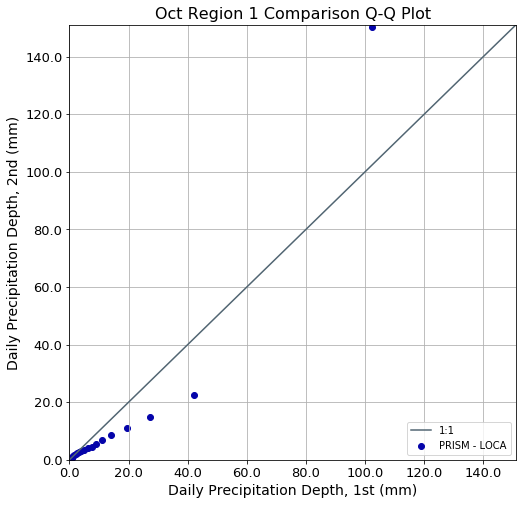

In [516]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct1PRQs, Oct1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

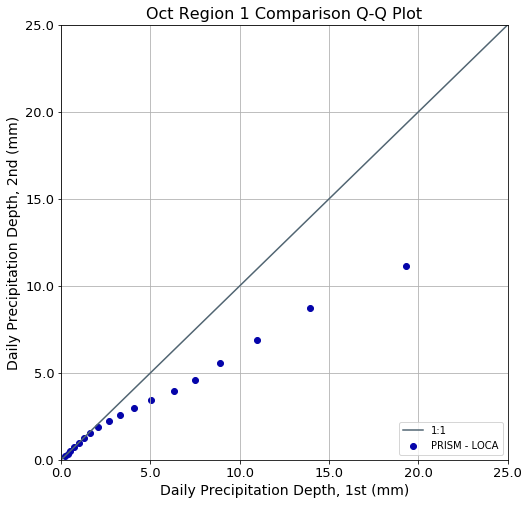

In [517]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct1PRQs, Oct1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

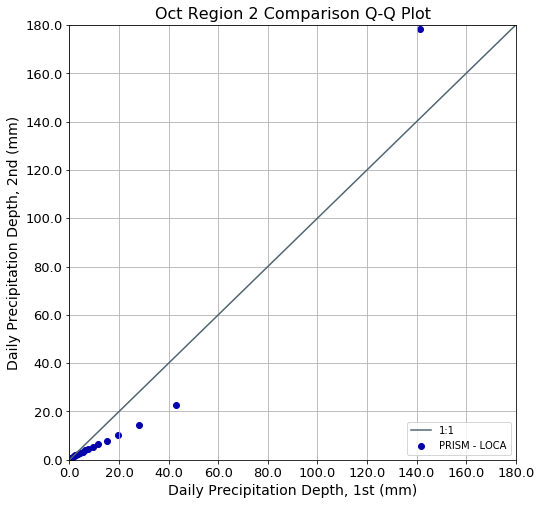

In [518]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct2PRQs, Oct2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [519]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct2PRQs, Oct2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

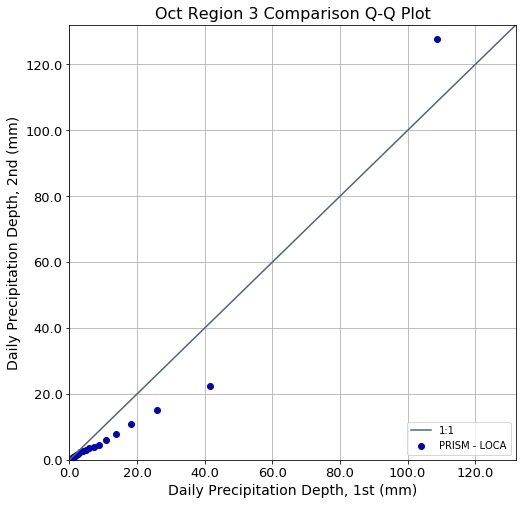

In [520]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct3PRQs, Oct3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

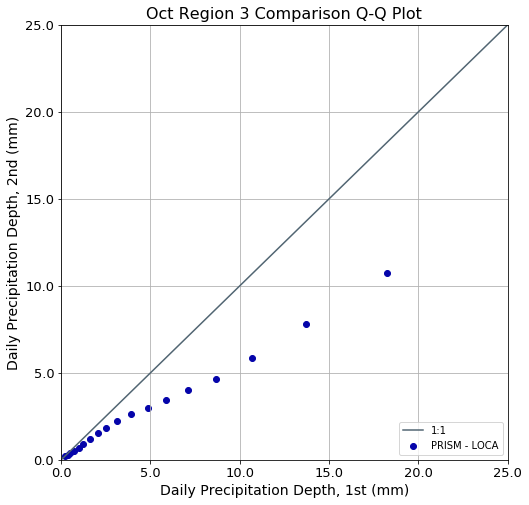

In [521]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct3PRQs, Oct3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

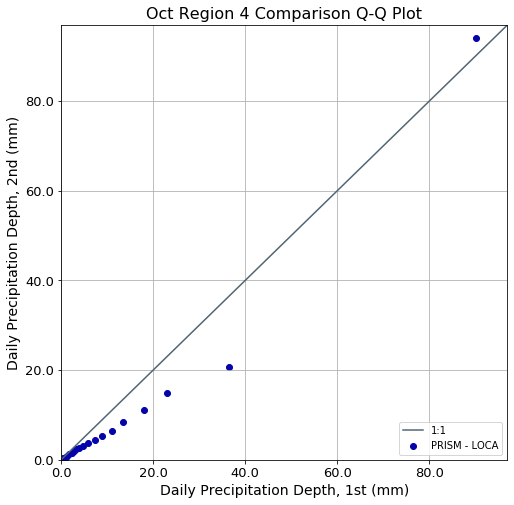

In [522]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct4PRQs, Oct4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

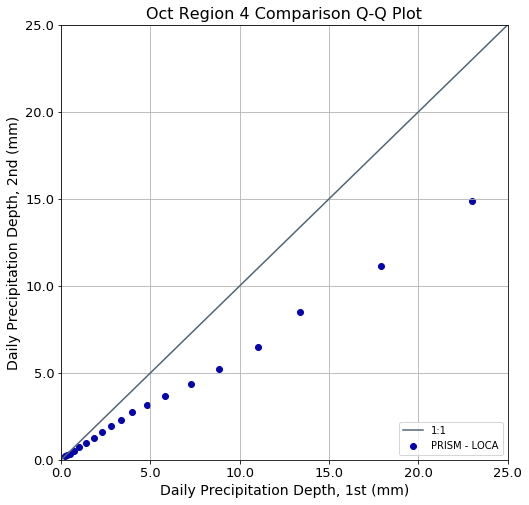

In [523]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct4PRQs, Oct4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

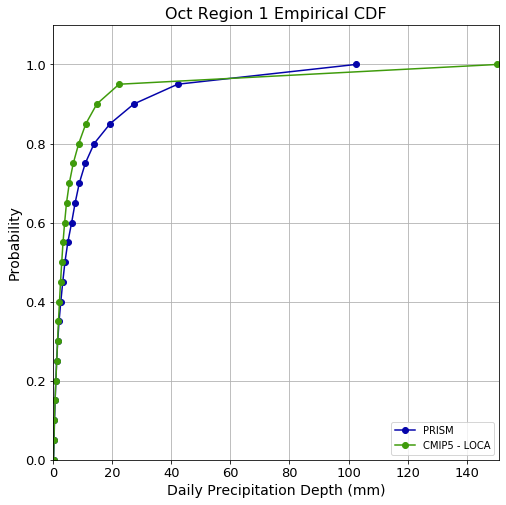

In [524]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Oct1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Oct Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

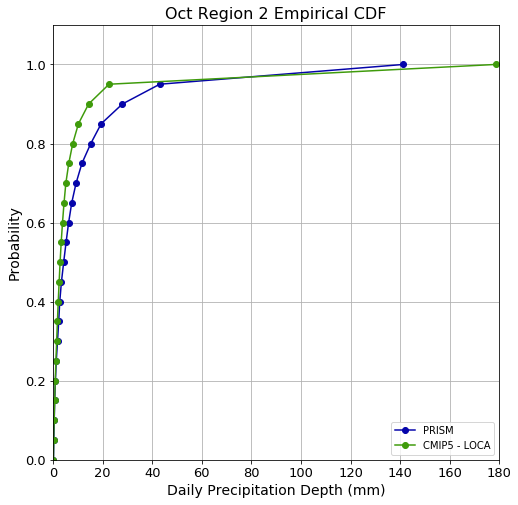

In [525]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Oct2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Oct Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

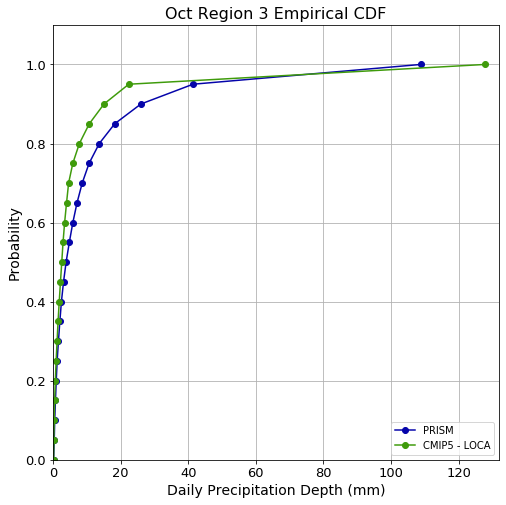

In [526]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Oct3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Oct Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

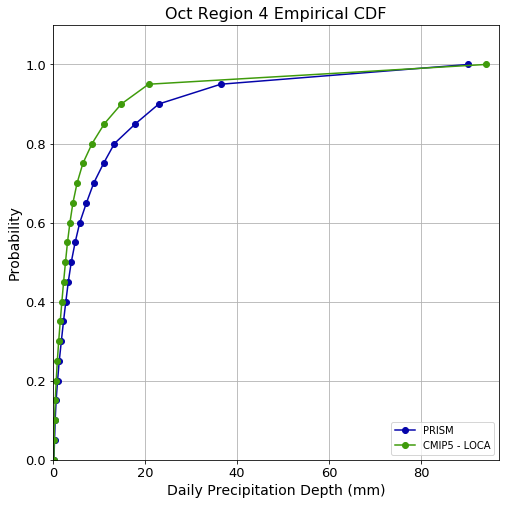

In [527]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Oct4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Oct Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

In [528]:
NovNum = 11

In [529]:
Nov1PRDF = NovPRDF[NovPRDF["Region_Id"] == 1].copy()
Nov2PRDF = NovPRDF[NovPRDF["Region_Id"] == 2].copy()
Nov3PRDF = NovPRDF[NovPRDF["Region_Id"] == 3].copy()
Nov4PRDF = NovPRDF[NovPRDF["Region_Id"] == 4].copy()

In [530]:
Nov1LODF = NovLODF[NovLODF["PRegion_Id"] == 1].copy()
Nov2LODF = NovLODF[NovLODF["PRegion_Id"] == 2].copy()
Nov3LODF = NovLODF[NovLODF["PRegion_Id"] == 3].copy()
Nov4LODF = NovLODF[NovLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [531]:
Nov1PRBSCI = sstats.bayes_mvs( np.array( Nov1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2PRBSCI = sstats.bayes_mvs( np.array( Nov2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3PRBSCI = sstats.bayes_mvs( np.array( Nov3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4PRBSCI = sstats.bayes_mvs( np.array( Nov4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [532]:
Nov1LOBSCI = sstats.bayes_mvs( np.array( Nov1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2LOBSCI = sstats.bayes_mvs( np.array( Nov2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3LOBSCI = sstats.bayes_mvs( np.array( Nov3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4LOBSCI = sstats.bayes_mvs( np.array( Nov4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [533]:
CMonList.append( NovNum )
CZoneList.append( 1 )
SPRMean.append( Nov1PRBSCI[0][0] )
SPRMeanMinCI.append( Nov1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Nov1PRBSCI[0][1][1] )
SPRVar.append( Nov1PRBSCI[1][0] )
SPRVarMinCI.append( Nov1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Nov1PRBSCI[1][1][1] )
SPRStd.append( Nov1PRBSCI[2][0] )
SPRStdMinCI.append( Nov1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Nov1PRBSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 2 )
SPRMean.append( Nov2PRBSCI[0][0] )
SPRMeanMinCI.append( Nov2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Nov2PRBSCI[0][1][1] )
SPRVar.append( Nov2PRBSCI[1][0] )
SPRVarMinCI.append( Nov2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Nov2PRBSCI[1][1][1] )
SPRStd.append( Nov2PRBSCI[2][0] )
SPRStdMinCI.append( Nov2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Nov2PRBSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 3 )
SPRMean.append( Nov3PRBSCI[0][0] )
SPRMeanMinCI.append( Nov3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Nov3PRBSCI[0][1][1] )
SPRVar.append( Nov3PRBSCI[1][0] )
SPRVarMinCI.append( Nov3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Nov3PRBSCI[1][1][1] )
SPRStd.append( Nov3PRBSCI[2][0] )
SPRStdMinCI.append( Nov3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Nov3PRBSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 4 )
SPRMean.append( Nov4PRBSCI[0][0] )
SPRMeanMinCI.append( Nov4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Nov4PRBSCI[0][1][1] )
SPRVar.append( Nov4PRBSCI[1][0] )
SPRVarMinCI.append( Nov4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Nov4PRBSCI[1][1][1] )
SPRStd.append( Nov4PRBSCI[2][0] )
SPRStdMinCI.append( Nov4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Nov4PRBSCI[2][1][1] )

In [534]:
SLOMean.append( Nov1LOBSCI[0][0] )
SLOMeanMinCI.append( Nov1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Nov1LOBSCI[0][1][1] )
SLOVar.append( Nov1LOBSCI[1][0] )
SLOVarMinCI.append( Nov1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Nov1LOBSCI[1][1][1] )
SLOStd.append( Nov1LOBSCI[2][0] )
SLOStdMinCI.append( Nov1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Nov1LOBSCI[2][1][1] )
SLOMean.append( Nov2LOBSCI[0][0] )
SLOMeanMinCI.append( Nov2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Nov2LOBSCI[0][1][1] )
SLOVar.append( Nov2LOBSCI[1][0] )
SLOVarMinCI.append( Nov2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Nov2LOBSCI[1][1][1] )
SLOStd.append( Nov2LOBSCI[2][0] )
SLOStdMinCI.append( Nov2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Nov2LOBSCI[2][1][1] )
SLOMean.append( Nov3LOBSCI[0][0] )
SLOMeanMinCI.append( Nov3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Nov3LOBSCI[0][1][1] )
SLOVar.append( Nov3LOBSCI[1][0] )
SLOVarMinCI.append( Nov3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Nov3LOBSCI[1][1][1] )
SLOStd.append( Nov3LOBSCI[2][0] )
SLOStdMinCI.append( Nov3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Nov3LOBSCI[2][1][1] )
SLOMean.append( Nov4LOBSCI[0][0] )
SLOMeanMinCI.append( Nov4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Nov4LOBSCI[0][1][1] )
SLOVar.append( Nov4LOBSCI[1][0] )
SLOVarMinCI.append( Nov4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Nov4LOBSCI[1][1][1] )
SLOStd.append( Nov4LOBSCI[2][0] )
SLOStdMinCI.append( Nov4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Nov4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [535]:
Nov1TTPRtoLO = sstats.ttest_ind( np.array( Nov1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov1LODF["Precip_mm"], dtype=np.int32 ) )

In [536]:
Nov1TTPRtoLOPval = Nov1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Nov1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 0


In [537]:
Nov2TTPRtoLO = sstats.ttest_ind( np.array( Nov2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov2LODF["Precip_mm"], dtype=np.int32 ) )

In [538]:
Nov2TTPRtoLOPval = Nov2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Nov2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 0


In [539]:
Nov3TTPRtoLO = sstats.ttest_ind( np.array( Nov3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov3LODF["Precip_mm"], dtype=np.int32 ) )

In [540]:
Nov3TTPRtoLOPval = Nov3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Nov3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [541]:
Nov4TTPRtoLO = sstats.ttest_ind( np.array( Nov4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov4LODF["Precip_mm"], dtype=np.int32 ) )

In [542]:
Nov4TTPRtoLOPval = Nov4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Nov4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [543]:
Nov1MWUPRtoLO = sstats.mannwhitneyu( np.array( Nov1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [544]:
Nov1MWUPRtoLOPval = Nov1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Nov1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 0


In [545]:
Nov2MWUPRtoLO = sstats.mannwhitneyu( np.array( Nov2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [546]:
Nov2MWUPRtoLOPval = Nov2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Nov2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 2.09787e-129


In [547]:
Nov3MWUPRtoLO = sstats.mannwhitneyu( np.array( Nov3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [548]:
Nov3MWUPRtoLOPval = Nov3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Nov3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 3.26493e-286


In [549]:
Nov4MWUPRtoLO = sstats.mannwhitneyu( np.array( Nov4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [550]:
Nov4MWUPRtoLOPval = Nov4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Nov4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 2.10318e-198


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [551]:
Nov1KWPRtoLO = sstats.kruskal( np.array( Nov1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov1LODF["Precip_mm"], dtype=np.int32 ) )

In [552]:
Nov1KWPRtoLOPval = Nov1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Nov1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 1


In [553]:
Nov2KWPRtoLO = sstats.kruskal( np.array( Nov2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov2LODF["Precip_mm"], dtype=np.int32 ) )

In [554]:
Nov2KWPRtoLOPval = Nov2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Nov2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 1


In [555]:
Nov3KWPRtoLO = sstats.kruskal( np.array( Nov3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov3LODF["Precip_mm"], dtype=np.int32 ) )

In [556]:
Nov3KWPRtoLOPval = Nov3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Nov3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 0


In [557]:
Nov4KWPRtoLO = sstats.kruskal( np.array( Nov4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov4LODF["Precip_mm"], dtype=np.int32 ) )

In [558]:
Nov4KWPRtoLOPval = Nov4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Nov4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 0


In [559]:
Nov1LODF["Precip_mm"].median(), Nov1PRDF["Precip_mm"].median()

(1.8762741088867188, 3.25)

In [560]:
Nov2LODF["Precip_mm"].median(), Nov2PRDF["Precip_mm"].median()

(2.329756498336792, 4.110000133514404)

In [561]:
Nov3LODF["Precip_mm"].median(), Nov3PRDF["Precip_mm"].median()

(1.905783772468567, 4.480000019073486)

In [562]:
Nov4LODF["Precip_mm"].median(), Nov4PRDF["Precip_mm"].median()

(1.777484655380249, 3.450000047683716)

#### Plots

In [563]:
Nov1PRQs = Nov1PRDF["Precip_mm"].quantile(q=nCompQs)
Nov1LOQs = Nov1LODF["Precip_mm"].quantile(q=nCompQs)
Nov2PRQs = Nov2PRDF["Precip_mm"].quantile(q=nCompQs)
Nov2LOQs = Nov2LODF["Precip_mm"].quantile(q=nCompQs)
Nov3PRQs = Nov3PRDF["Precip_mm"].quantile(q=nCompQs)
Nov3LOQs = Nov3LODF["Precip_mm"].quantile(q=nCompQs)
Nov4PRQs = Nov4PRDF["Precip_mm"].quantile(q=nCompQs)
Nov4LOQs = Nov4LODF["Precip_mm"].quantile(q=nCompQs)

In [564]:
max1Qs = max( Nov1PRQs.max(), Nov1LOQs.max() )
max1Qs = round(max1Qs) + 1.0
max1Qs

80.0

In [565]:
max2Qs = max( Nov2PRQs.max(), Nov2LOQs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

100.0

In [566]:
max3Qs = max( Nov3PRQs.max(), Nov3LOQs.max() )
max3Qs = round(max3Qs) + 5.0
max3Qs

80.0

In [567]:
max4Qs = max( Nov4PRQs.max(), Nov4LOQs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

75.0

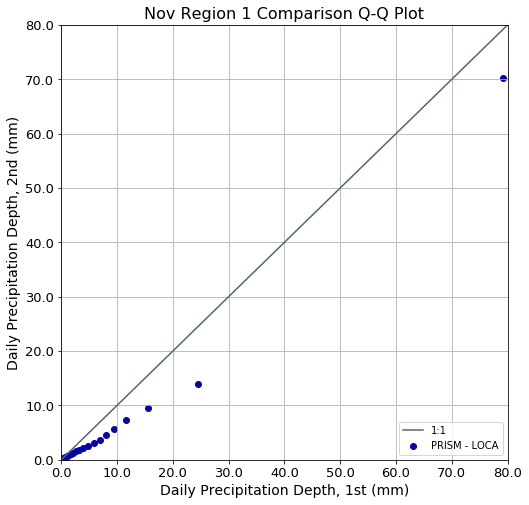

In [568]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov1PRQs, Nov1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [569]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov1PRQs, Nov1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [570]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov2PRQs, Nov2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

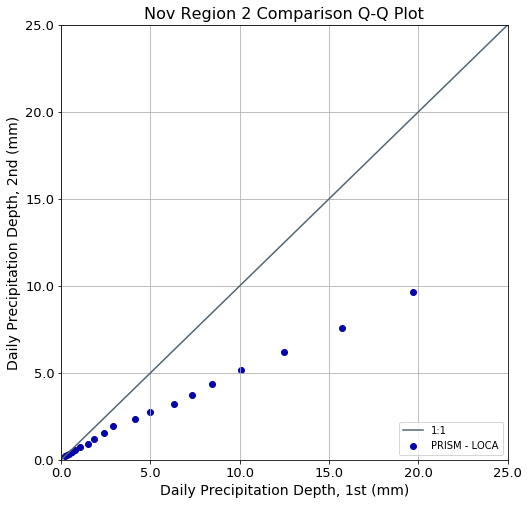

In [571]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov2PRQs, Nov2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

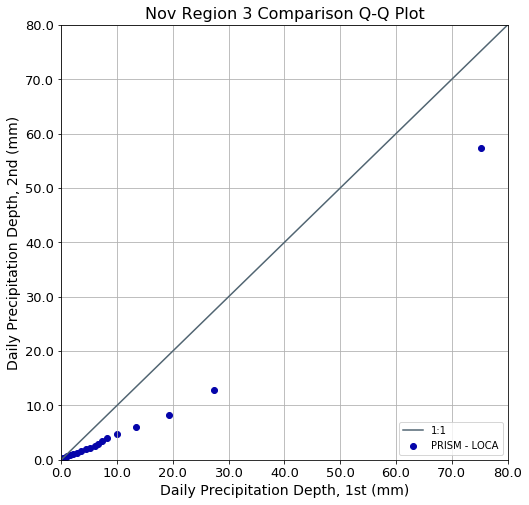

In [572]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov3PRQs, Nov3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

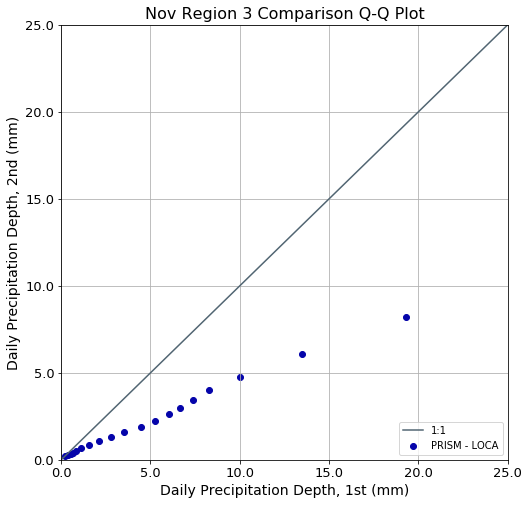

In [573]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov3PRQs, Nov3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [574]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov4PRQs, Nov4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [575]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov4PRQs, Nov4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [576]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Nov1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Nov Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [577]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Nov2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Nov Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

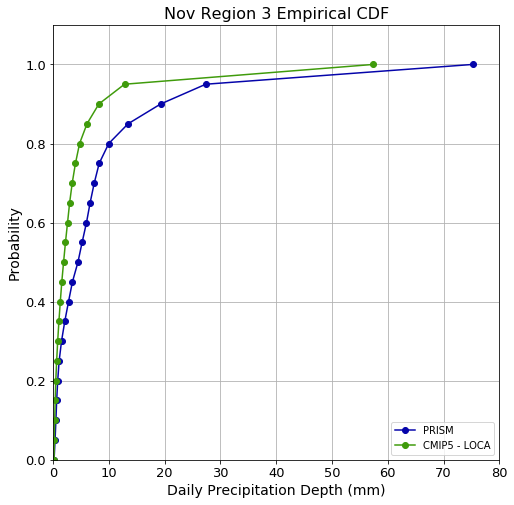

In [578]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Nov3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Nov Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

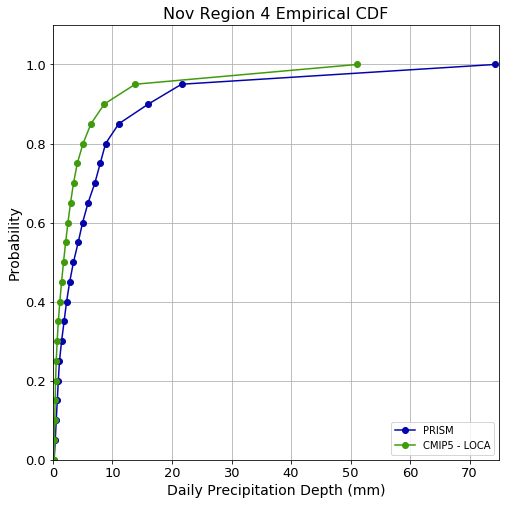

In [579]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Nov4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Nov Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

In [580]:
DecNum = 12

In [581]:
Dec1PRDF = DecPRDF[DecPRDF["Region_Id"] == 1].copy()
Dec2PRDF = DecPRDF[DecPRDF["Region_Id"] == 2].copy()
Dec3PRDF = DecPRDF[DecPRDF["Region_Id"] == 3].copy()
Dec4PRDF = DecPRDF[DecPRDF["Region_Id"] == 4].copy()

In [582]:
Dec1LODF = DecLODF[DecLODF["PRegion_Id"] == 1].copy()
Dec2LODF = DecLODF[DecLODF["PRegion_Id"] == 2].copy()
Dec3LODF = DecLODF[DecLODF["PRegion_Id"] == 3].copy()
Dec4LODF = DecLODF[DecLODF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [583]:
Dec1PRBSCI = sstats.bayes_mvs( np.array( Dec1PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2PRBSCI = sstats.bayes_mvs( np.array( Dec2PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3PRBSCI = sstats.bayes_mvs( np.array( Dec3PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4PRBSCI = sstats.bayes_mvs( np.array( Dec4PRDF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [584]:
Dec1LOBSCI = sstats.bayes_mvs( np.array( Dec1LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2LOBSCI = sstats.bayes_mvs( np.array( Dec2LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3LOBSCI = sstats.bayes_mvs( np.array( Dec3LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4LOBSCI = sstats.bayes_mvs( np.array( Dec4LODF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [585]:
CMonList.append( DecNum )
CZoneList.append( 1 )
SPRMean.append( Dec1PRBSCI[0][0] )
SPRMeanMinCI.append( Dec1PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Dec1PRBSCI[0][1][1] )
SPRVar.append( Dec1PRBSCI[1][0] )
SPRVarMinCI.append( Dec1PRBSCI[1][1][0] )
SPRVarMaxCI.append( Dec1PRBSCI[1][1][1] )
SPRStd.append( Dec1PRBSCI[2][0] )
SPRStdMinCI.append( Dec1PRBSCI[2][1][0] )
SPRStdMaxCI.append( Dec1PRBSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 2 )
SPRMean.append( Dec2PRBSCI[0][0] )
SPRMeanMinCI.append( Dec2PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Dec2PRBSCI[0][1][1] )
SPRVar.append( Dec2PRBSCI[1][0] )
SPRVarMinCI.append( Dec2PRBSCI[1][1][0] )
SPRVarMaxCI.append( Dec2PRBSCI[1][1][1] )
SPRStd.append( Dec2PRBSCI[2][0] )
SPRStdMinCI.append( Dec2PRBSCI[2][1][0] )
SPRStdMaxCI.append( Dec2PRBSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 3 )
SPRMean.append( Dec3PRBSCI[0][0] )
SPRMeanMinCI.append( Dec3PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Dec3PRBSCI[0][1][1] )
SPRVar.append( Dec3PRBSCI[1][0] )
SPRVarMinCI.append( Dec3PRBSCI[1][1][0] )
SPRVarMaxCI.append( Dec3PRBSCI[1][1][1] )
SPRStd.append( Dec3PRBSCI[2][0] )
SPRStdMinCI.append( Dec3PRBSCI[2][1][0] )
SPRStdMaxCI.append( Dec3PRBSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 4 )
SPRMean.append( Dec4PRBSCI[0][0] )
SPRMeanMinCI.append( Dec4PRBSCI[0][1][0] )
SPRMeanMaxCI.append( Dec4PRBSCI[0][1][1] )
SPRVar.append( Dec4PRBSCI[1][0] )
SPRVarMinCI.append( Dec4PRBSCI[1][1][0] )
SPRVarMaxCI.append( Dec4PRBSCI[1][1][1] )
SPRStd.append( Dec4PRBSCI[2][0] )
SPRStdMinCI.append( Dec4PRBSCI[2][1][0] )
SPRStdMaxCI.append( Dec4PRBSCI[2][1][1] )

In [586]:
SLOMean.append( Dec1LOBSCI[0][0] )
SLOMeanMinCI.append( Dec1LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Dec1LOBSCI[0][1][1] )
SLOVar.append( Dec1LOBSCI[1][0] )
SLOVarMinCI.append( Dec1LOBSCI[1][1][0] )
SLOVarMaxCI.append( Dec1LOBSCI[1][1][1] )
SLOStd.append( Dec1LOBSCI[2][0] )
SLOStdMinCI.append( Dec1LOBSCI[2][1][0] )
SLOStdMaxCI.append( Dec1LOBSCI[2][1][1] )
SLOMean.append( Dec2LOBSCI[0][0] )
SLOMeanMinCI.append( Dec2LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Dec2LOBSCI[0][1][1] )
SLOVar.append( Dec2LOBSCI[1][0] )
SLOVarMinCI.append( Dec2LOBSCI[1][1][0] )
SLOVarMaxCI.append( Dec2LOBSCI[1][1][1] )
SLOStd.append( Dec2LOBSCI[2][0] )
SLOStdMinCI.append( Dec2LOBSCI[2][1][0] )
SLOStdMaxCI.append( Dec2LOBSCI[2][1][1] )
SLOMean.append( Dec3LOBSCI[0][0] )
SLOMeanMinCI.append( Dec3LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Dec3LOBSCI[0][1][1] )
SLOVar.append( Dec3LOBSCI[1][0] )
SLOVarMinCI.append( Dec3LOBSCI[1][1][0] )
SLOVarMaxCI.append( Dec3LOBSCI[1][1][1] )
SLOStd.append( Dec3LOBSCI[2][0] )
SLOStdMinCI.append( Dec3LOBSCI[2][1][0] )
SLOStdMaxCI.append( Dec3LOBSCI[2][1][1] )
SLOMean.append( Dec4LOBSCI[0][0] )
SLOMeanMinCI.append( Dec4LOBSCI[0][1][0] )
SLOMeanMaxCI.append( Dec4LOBSCI[0][1][1] )
SLOVar.append( Dec4LOBSCI[1][0] )
SLOVarMinCI.append( Dec4LOBSCI[1][1][0] )
SLOVarMaxCI.append( Dec4LOBSCI[1][1][1] )
SLOStd.append( Dec4LOBSCI[2][0] )
SLOStdMinCI.append( Dec4LOBSCI[2][1][0] )
SLOStdMaxCI.append( Dec4LOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [587]:
Dec1TTPRtoLO = sstats.ttest_ind( np.array( Dec1PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec1LODF["Precip_mm"], dtype=np.int32 ) )

In [588]:
Dec1TTPRtoLOPval = Dec1TTPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same population is: %g" % Dec1TTPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same population is: 2.46736e-95


In [589]:
Dec2TTPRtoLO = sstats.ttest_ind( np.array( Dec2PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec2LODF["Precip_mm"], dtype=np.int32 ) )

In [590]:
Dec2TTPRtoLOPval = Dec2TTPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same population is: %g" % Dec2TTPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same population is: 9.16557e-152


In [591]:
Dec3TTPRtoLO = sstats.ttest_ind( np.array( Dec3PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec3LODF["Precip_mm"], dtype=np.int32 ) )

In [592]:
Dec3TTPRtoLOPval = Dec3TTPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same population is: %g" % Dec3TTPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same population is: 0


In [593]:
Dec4TTPRtoLO = sstats.ttest_ind( np.array( Dec4PRDF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec4LODF["Precip_mm"], dtype=np.int32 ) )

In [594]:
Dec4TTPRtoLOPval = Dec4TTPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same population is: %g" % Dec4TTPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same population is: 9.52931e-99


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [595]:
Dec1MWUPRtoLO = sstats.mannwhitneyu( np.array( Dec1PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec1LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [596]:
Dec1MWUPRtoLOPval = Dec1MWUPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA from same distribution is: %g" % Dec1MWUPRtoLOPval )

Region 1, P-Value for PRISM and LOCA from same distribution is: 2.18141e-88


In [597]:
Dec2MWUPRtoLO = sstats.mannwhitneyu( np.array( Dec2PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec2LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [598]:
Dec2MWUPRtoLOPval = Dec2MWUPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA from same distribution is: %g" % Dec2MWUPRtoLOPval )

Region 2, P-Value for PRISM and LOCA from same distribution is: 2.13274e-125


In [599]:
Dec3MWUPRtoLO = sstats.mannwhitneyu( np.array( Dec3PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec3LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [600]:
Dec3MWUPRtoLOPval = Dec3MWUPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA from same distribution is: %g" % Dec3MWUPRtoLOPval )

Region 3, P-Value for PRISM and LOCA from same distribution is: 0


In [601]:
Dec4MWUPRtoLO = sstats.mannwhitneyu( np.array( Dec4PRDF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec4LODF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [602]:
Dec4MWUPRtoLOPval = Dec4MWUPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA from same distribution is: %g" % Dec4MWUPRtoLOPval )

Region 4, P-Value for PRISM and LOCA from same distribution is: 5.9015e-95


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [603]:
Dec1KWPRtoLO = sstats.kruskal( np.array( Dec1PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec1LODF["Precip_mm"], dtype=np.int32 ) )

In [604]:
Dec1KWPRtoLOPval = Dec1KWPRtoLO[1]
print("Region 1, P-Value for PRISM and LOCA have the same median is: %g" % Dec1KWPRtoLOPval )

Region 1, P-Value for PRISM and LOCA have the same median is: 0


In [605]:
Dec2KWPRtoLO = sstats.kruskal( np.array( Dec2PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec2LODF["Precip_mm"], dtype=np.int32 ) )

In [606]:
Dec2KWPRtoLOPval = Dec2KWPRtoLO[1]
print("Region 2, P-Value for PRISM and LOCA have the same median is: %g" % Dec2KWPRtoLOPval )

Region 2, P-Value for PRISM and LOCA have the same median is: 0


In [607]:
Dec3KWPRtoLO = sstats.kruskal( np.array( Dec3PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec3LODF["Precip_mm"], dtype=np.int32 ) )

In [608]:
Dec3KWPRtoLOPval = Dec3KWPRtoLO[1]
print("Region 3, P-Value for PRISM and LOCA have the same median is: %g" % Dec3KWPRtoLOPval )

Region 3, P-Value for PRISM and LOCA have the same median is: 1


In [609]:
Dec4KWPRtoLO = sstats.kruskal( np.array( Dec4PRDF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec4LODF["Precip_mm"], dtype=np.int32 ) )

In [610]:
Dec4KWPRtoLOPval = Dec4KWPRtoLO[1]
print("Region 4, P-Value for PRISM and LOCA have the same median is: %g" % Dec4KWPRtoLOPval )

Region 4, P-Value for PRISM and LOCA have the same median is: 1


In [611]:
Dec1LODF["Precip_mm"].median(), Dec1PRDF["Precip_mm"].median()

(1.3232423067092896, 1.9900000095367432)

In [612]:
Dec2LODF["Precip_mm"].median(), Dec2PRDF["Precip_mm"].median()

(1.1223253011703491, 2.549999952316284)

In [613]:
Dec3LODF["Precip_mm"].median(), Dec3PRDF["Precip_mm"].median()

(1.2182540893554688, 2.380000114440918)

In [614]:
Dec4LODF["Precip_mm"].median(), Dec4PRDF["Precip_mm"].median()

(1.2727431058883667, 1.8899999856948853)

#### Plots

In [615]:
Dec1PRQs = Dec1PRDF["Precip_mm"].quantile(q=nCompQs)
Dec1LOQs = Dec1LODF["Precip_mm"].quantile(q=nCompQs)
Dec2PRQs = Dec2PRDF["Precip_mm"].quantile(q=nCompQs)
Dec2LOQs = Dec2LODF["Precip_mm"].quantile(q=nCompQs)
Dec3PRQs = Dec3PRDF["Precip_mm"].quantile(q=nCompQs)
Dec3LOQs = Dec3LODF["Precip_mm"].quantile(q=nCompQs)
Dec4PRQs = Dec4PRDF["Precip_mm"].quantile(q=nCompQs)
Dec4LOQs = Dec4LODF["Precip_mm"].quantile(q=nCompQs)

In [616]:
max1Qs = max( Dec1PRQs.max(), Dec1LOQs.max() )
max1Qs = round(max1Qs) + 4.0
max1Qs

95.0

In [617]:
max2Qs = max( Dec2PRQs.max(), Dec2LOQs.max() )
max2Qs = round(max2Qs) + 3.0
max2Qs

95.0

In [618]:
max3Qs = max( Dec3PRQs.max(), Dec3LOQs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

75.0

In [619]:
max4Qs = max( Dec4PRQs.max(), Dec4LOQs.max() )
max4Qs = round(max4Qs) + 4.0
max4Qs

85.0

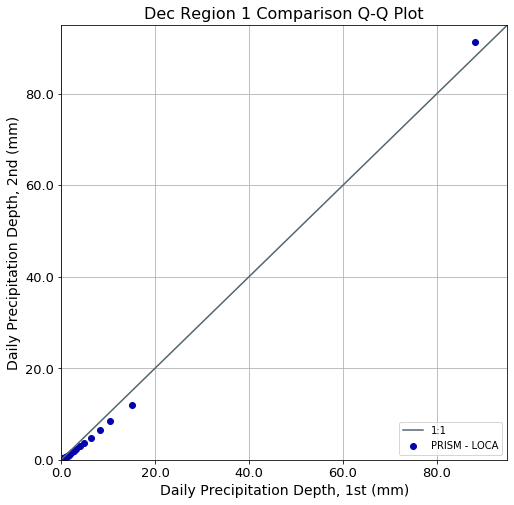

In [620]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec1PRQs, Dec1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

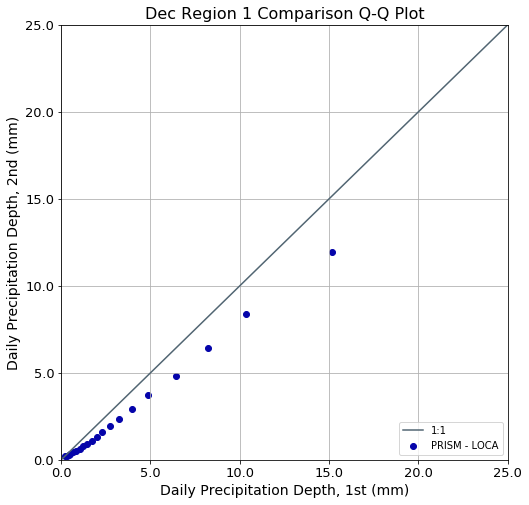

In [621]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec1PRQs, Dec1LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

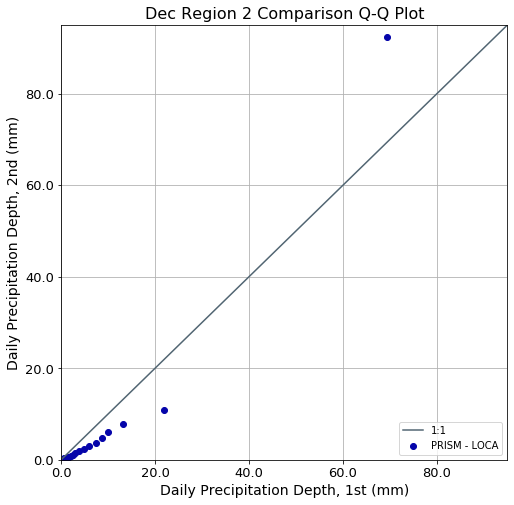

In [622]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec2PRQs, Dec2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

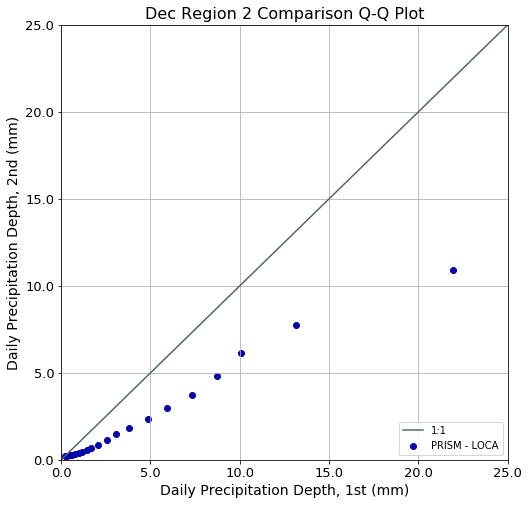

In [623]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec2PRQs, Dec2LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

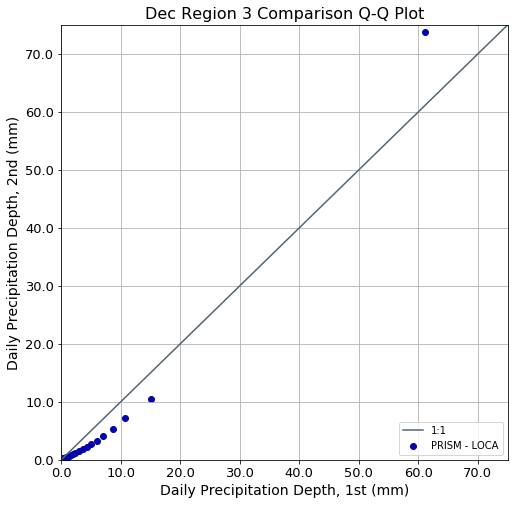

In [624]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec3PRQs, Dec3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

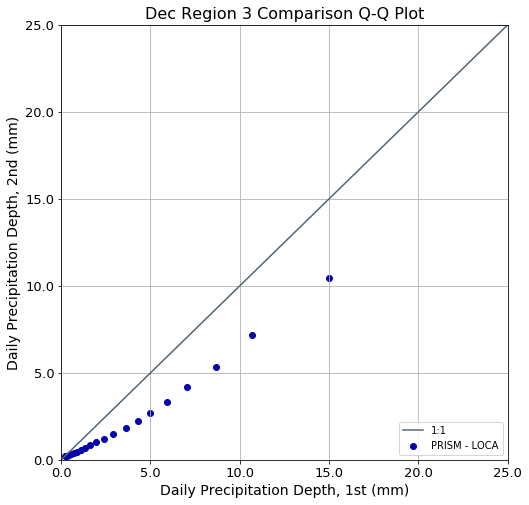

In [625]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec3PRQs, Dec3LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

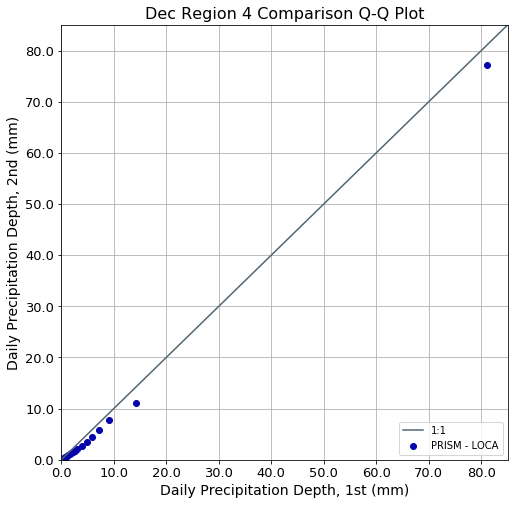

In [626]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec4PRQs, Dec4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

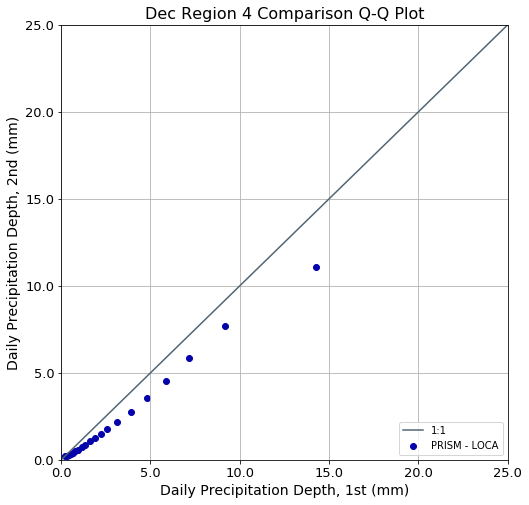

In [627]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec4PRQs, Dec4LOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

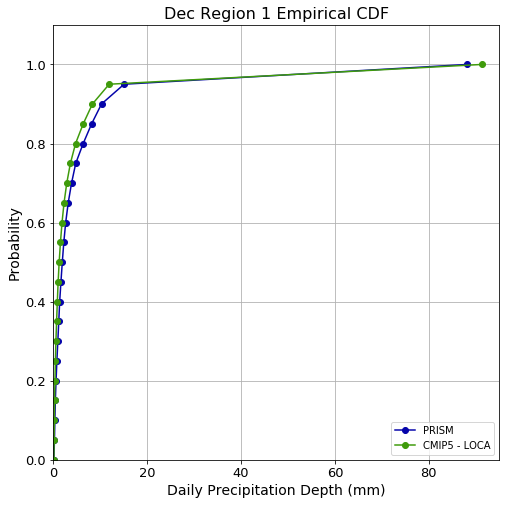

In [628]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec1PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Dec1LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Dec Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

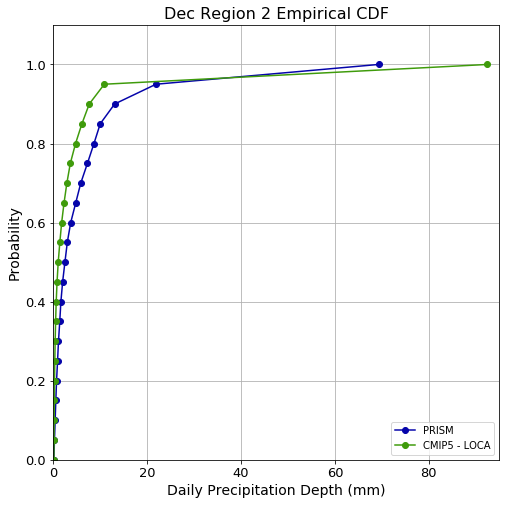

In [629]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec2PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Dec2LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Dec Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

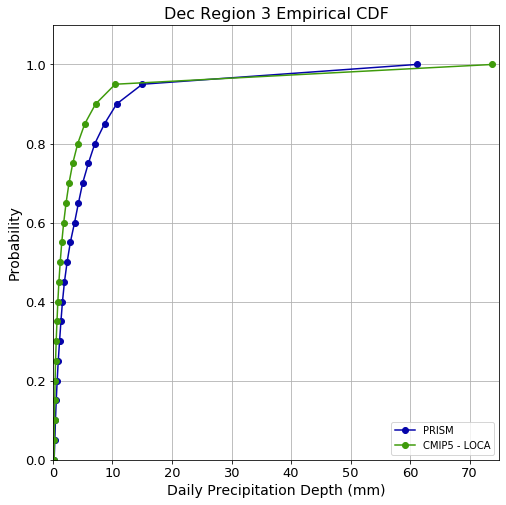

In [630]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec3PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Dec3LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Dec Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

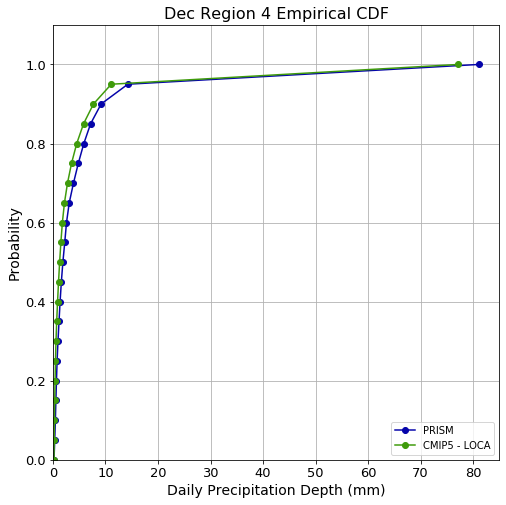

In [631]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec4PRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( Dec4LOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 - LOCA")
ax11.set_title('Dec Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [632]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SPRMeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SPRMean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SPRMeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SPRVarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SPRVar, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SPRVarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SPRStdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SPRStd, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SPRStdMaxCI, dtype=np.float32 ), #10
}
PRBayStatsCIDF = pd.DataFrame( data=DataDict )

In [633]:
BSCIHds = list( PRBayStatsCIDF.columns )

In [634]:
display( HTML( PRBayStatsCIDF.to_html() ) )

In [635]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SLOMeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SLOMean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SLOMeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SLOVarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SLOVar, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SLOVarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SLOStdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SLOStd, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SLOStdMaxCI, dtype=np.float32 ), #10
}
LOBayStatsCIDF = pd.DataFrame( data=DataDict )

In [636]:
display( HTML( LOBayStatsCIDF.to_html() ) )

In [637]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PrecipDepthComp_LOCA1981-2011.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    PRBayStatsCIDF.to_excel( writer, sheet_name="PRISM_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    LOBayStatsCIDF.to_excel( writer, sheet_name="LOCA_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )

Plot the monthly confidence intervals with statistic

In [638]:
PR1Stats = PRBayStatsCIDF[PRBayStatsCIDF[BSCIHds[1]] == 1].copy()
PR2Stats = PRBayStatsCIDF[PRBayStatsCIDF[BSCIHds[1]] == 2].copy()
PR3Stats = PRBayStatsCIDF[PRBayStatsCIDF[BSCIHds[1]] == 3].copy()
PR4Stats = PRBayStatsCIDF[PRBayStatsCIDF[BSCIHds[1]] == 4].copy()

In [639]:
LO1Stats = LOBayStatsCIDF[LOBayStatsCIDF[BSCIHds[1]] == 1].copy()
LO2Stats = LOBayStatsCIDF[LOBayStatsCIDF[BSCIHds[1]] == 2].copy()
LO3Stats = LOBayStatsCIDF[LOBayStatsCIDF[BSCIHds[1]] == 3].copy()
LO4Stats = LOBayStatsCIDF[LOBayStatsCIDF[BSCIHds[1]] == 4].copy()

In [640]:
PR1MeanCI = np.append( np.stack( [np.array(PR1Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR1Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR1Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR1Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR1MeanCI = np.vstack( [PR1MeanCI[:,:], PR1MeanCI[0,:]] )
PR2MeanCI = np.append( np.stack( [np.array(PR2Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR2Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR2Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR2Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR2MeanCI = np.vstack( [PR2MeanCI[:,:], PR2MeanCI[0,:]] )
PR3MeanCI = np.append( np.stack( [np.array(PR3Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR3Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR3Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR3Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR3MeanCI = np.vstack( [PR3MeanCI[:,:], PR3MeanCI[0,:]] )
PR4MeanCI = np.append( np.stack( [np.array(PR4Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR4Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR4Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR4Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR4MeanCI = np.vstack( [PR4MeanCI[:,:], PR4MeanCI[0,:]] )

In [641]:
LO1MeanCI = np.append( np.stack( [np.array(LO1Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO1Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO1Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO1Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO1MeanCI = np.vstack( [LO1MeanCI[:,:], LO1MeanCI[0,:]] )
LO2MeanCI = np.append( np.stack( [np.array(LO2Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO2Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO2Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO2Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO2MeanCI = np.vstack( [LO2MeanCI[:,:], LO2MeanCI[0,:]] )
LO3MeanCI = np.append( np.stack( [np.array(LO3Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO3Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO3Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO3Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO3MeanCI = np.vstack( [LO3MeanCI[:,:], LO3MeanCI[0,:]] )
LO4MeanCI = np.append( np.stack( [np.array(LO4Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO4Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO4Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO4Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO4MeanCI = np.vstack( [LO4MeanCI[:,:], LO4MeanCI[0,:]] )

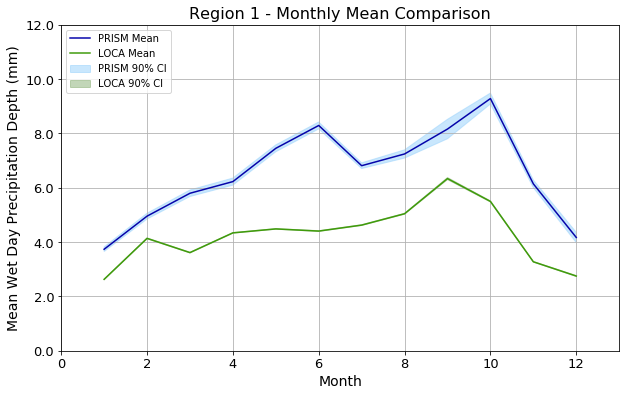

In [642]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PR1MeanCI[:,0], PR1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO1Stats[BSCIHds[0]], LO1Stats[BSCIHds[3]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LO1MeanCI[:,0], LO1MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 1 - Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

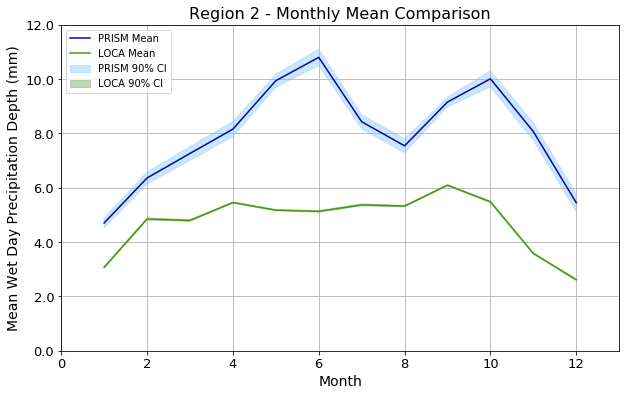

In [643]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PR2MeanCI[:,0], PR2MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO2Stats[BSCIHds[0]], LO2Stats[BSCIHds[3]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LO2MeanCI[:,0], LO2MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 2 - Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

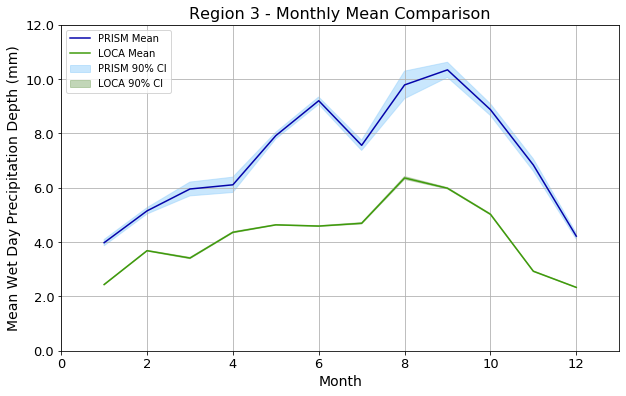

In [644]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PR3MeanCI[:,0], PR3MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO3Stats[BSCIHds[0]], LO3Stats[BSCIHds[3]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LO3MeanCI[:,0], LO3MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 3 - Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

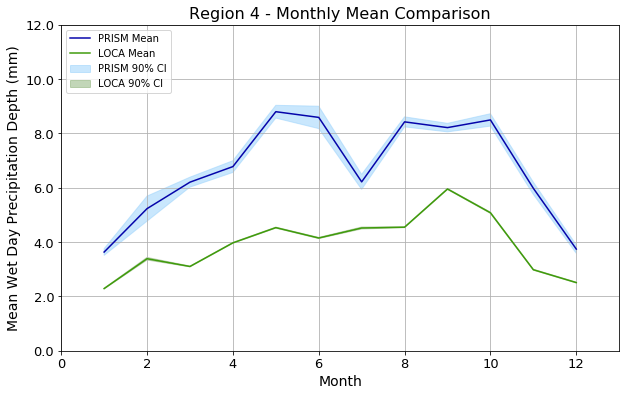

In [645]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)

ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PR4MeanCI[:,0], PR4MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO4Stats[BSCIHds[0]], LO4Stats[BSCIHds[3]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LO4MeanCI[:,0], LO4MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 4 - Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [661]:
OUT_DIR2 = r'C:\Temp\WG_Test_Out'

In [662]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR2, "Fig_A3-Comp_Reg_Month.svg" ) )
OutSVG

'C:\\Temp\\WG_Test_Out\\Fig_A3-Comp_Reg_Month.svg'

In [663]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR2, "Fig_A3-Comp_Reg_Month.png" ) )
OutPNG

'C:\\Temp\\WG_Test_Out\\Fig_A3-Comp_Reg_Month.png'

In [664]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[3]], color="xkcd:teal", 
           linestyle="-", label="PRISM Reg. 1" )
ax11.fill( PR1MeanCI[:,0], PR1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, )
ax11.plot( LO1Stats[BSCIHds[0]], LO1Stats[BSCIHds[3]], color="xkcd:moss green", 
           linestyle="-", label="LOCA Reg. 1" )
ax11.fill( LO1MeanCI[:,0], LO1MeanCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[3]], color="xkcd:bright blue", 
           linestyle="-", label="PRISM Reg. 2" )
ax11.fill( PR2MeanCI[:,0], PR2MeanCI[:,1], color="xkcd:light blue", alpha=0.5,)
ax11.plot( LO2Stats[BSCIHds[0]], LO2Stats[BSCIHds[3]], color="xkcd:green", 
           linestyle="-", label="LOCA Reg. 2" )
ax11.fill( LO2MeanCI[:,0], LO2MeanCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[3]], color="xkcd:slate", 
           linestyle="-", label="PRISM Reg. 3" )
ax11.fill( PR3MeanCI[:,0], PR3MeanCI[:,1], color="xkcd:light blue", alpha=0.5, )
ax11.plot( LO3Stats[BSCIHds[0]], LO3Stats[BSCIHds[3]], color="xkcd:olive", 
           linestyle="-", label="LOCA Reg. 3" )
ax11.fill( LO3MeanCI[:,0], LO3MeanCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[3]], color="xkcd:dark blue", 
           linestyle="-", label="PRISM Reg. 4" )
ax11.plot( LO4Stats[BSCIHds[0]], LO4Stats[BSCIHds[3]], color="xkcd:dark green", 
           linestyle="-", label="LOCA Reg. 4" )
ax11.fill( PR4MeanCI[:,0], PR4MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.fill( LO4MeanCI[:,0], LO4MeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=13 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=13)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (2.0, 14.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left', fontsize=11)
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [665]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR2, "Fig_A2-PRISM_Reg_Month.svg" ) )
OutSVG

'C:\\Temp\\WG_Test_Out\\Fig_A2-PRISM_Reg_Month.svg'

In [666]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR2, "Fig_A2-PRISM_Reg_Month.png" ) )
OutPNG

'C:\\Temp\\WG_Test_Out\\Fig_A2-PRISM_Reg_Month.png'

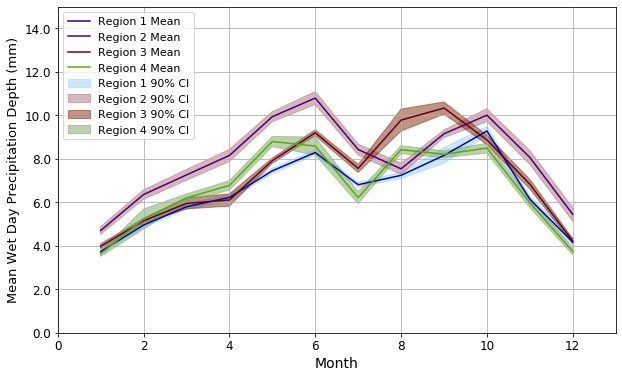

In [667]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="Region 1 Mean" )
ax11.fill( PR1MeanCI[:,0], PR1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Region 1 90% CI")
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="Region 2 Mean" )
ax11.fill( PR2MeanCI[:,0], PR2MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="Region 2 90% CI")
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="Region 3 Mean" )
ax11.fill( PR3MeanCI[:,0], PR3MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="Region 3 90% CI")
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="Region 4 Mean" )
ax11.fill( PR4MeanCI[:,0], PR4MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="Region 4 90% CI")
#ax11.set_title('PRISM Comparison by Region', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=13)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left', fontsize=11)
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

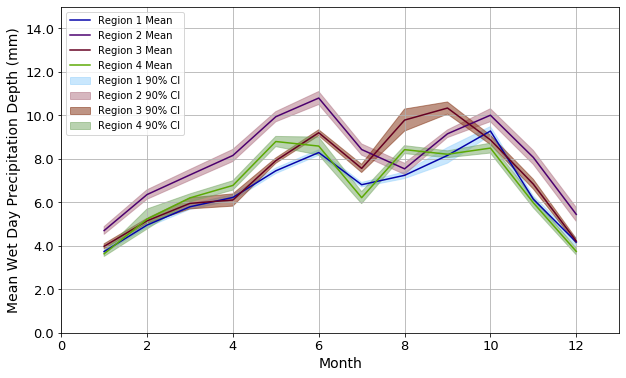

In [648]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="Region 1 Mean" )
ax11.fill( PR1MeanCI[:,0], PR1MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Region 1 90% CI")
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="Region 2 Mean" )
ax11.fill( PR2MeanCI[:,0], PR2MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="Region 2 90% CI")
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="Region 3 Mean" )
ax11.fill( PR3MeanCI[:,0], PR3MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="Region 3 90% CI")
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="Region 4 Mean" )
ax11.fill( PR4MeanCI[:,0], PR4MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="Region 4 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [649]:
PR1VarCI = np.append( np.stack( [np.array(PR1Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR1Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR1Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR1Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR1VarCI = np.vstack( [PR1VarCI[:,:], PR1VarCI[0,:]] )
PR2VarCI = np.append( np.stack( [np.array(PR2Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR2Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR2Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR2Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR2VarCI = np.vstack( [PR2VarCI[:,:], PR2VarCI[0,:]] )
PR3VarCI = np.append( np.stack( [np.array(PR3Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR3Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR3Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR3Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR3VarCI = np.vstack( [PR3VarCI[:,:], PR3VarCI[0,:]] )
PR4VarCI = np.append( np.stack( [np.array(PR4Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(PR4Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PR4Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(PR4Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PR4VarCI = np.vstack( [PR4VarCI[:,:], PR4VarCI[0,:]] )

In [650]:
LO1VarCI = np.append( np.stack( [np.array(LO1Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO1Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO1Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO1Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO1VarCI = np.vstack( [LO1VarCI[:,:], LO1VarCI[0,:]] )
LO2VarCI = np.append( np.stack( [np.array(LO2Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO2Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO2Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO2Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO2VarCI = np.vstack( [LO2VarCI[:,:], LO2VarCI[0,:]] )
LO3VarCI = np.append( np.stack( [np.array(LO3Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO3Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO3Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO3Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO3VarCI = np.vstack( [LO3VarCI[:,:], LO3VarCI[0,:]] )
LO4VarCI = np.append( np.stack( [np.array(LO4Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(LO4Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LO4Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(LO4Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LO4VarCI = np.vstack( [LO4VarCI[:,:], LO4VarCI[0,:]] )

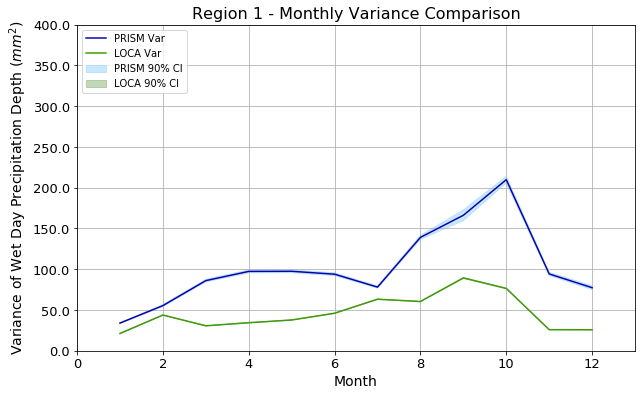

In [651]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PR1VarCI[:,0], PR1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO1Stats[BSCIHds[0]], LO1Stats[BSCIHds[6]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LO1VarCI[:,0], LO1VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 1 - Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

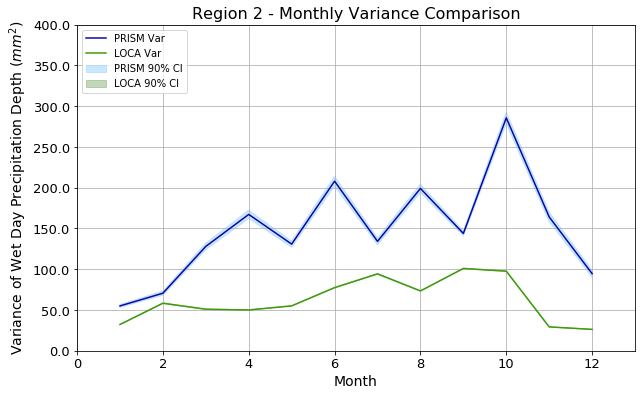

In [652]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PR2VarCI[:,0], PR2VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO2Stats[BSCIHds[0]], LO2Stats[BSCIHds[6]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LO2VarCI[:,0], LO2VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 2 - Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

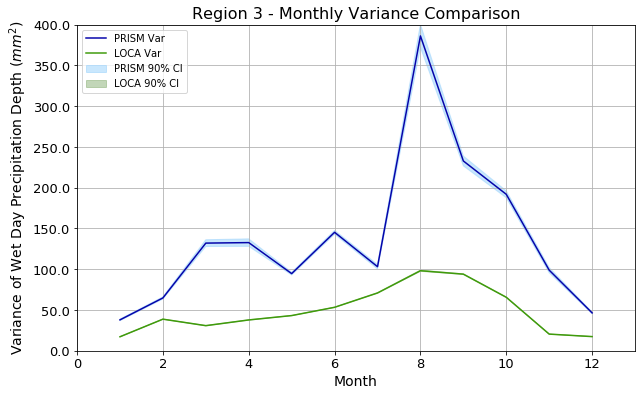

In [653]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PR3VarCI[:,0], PR3VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO3Stats[BSCIHds[0]], LO3Stats[BSCIHds[6]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LO3VarCI[:,0], LO3VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 3 - Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

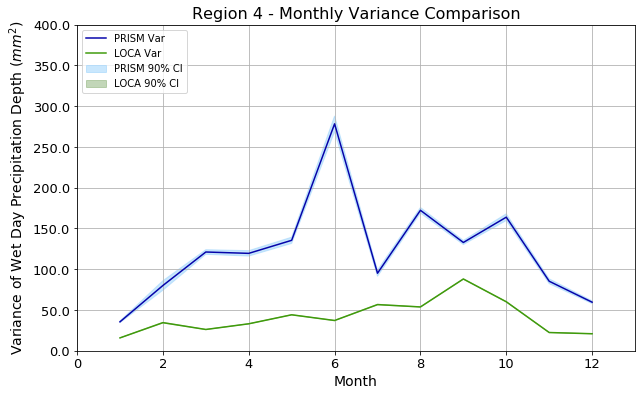

In [654]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PR4VarCI[:,0], PR4VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LO4Stats[BSCIHds[0]], LO4Stats[BSCIHds[6]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LO4VarCI[:,0], LO4VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Region 4 - Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

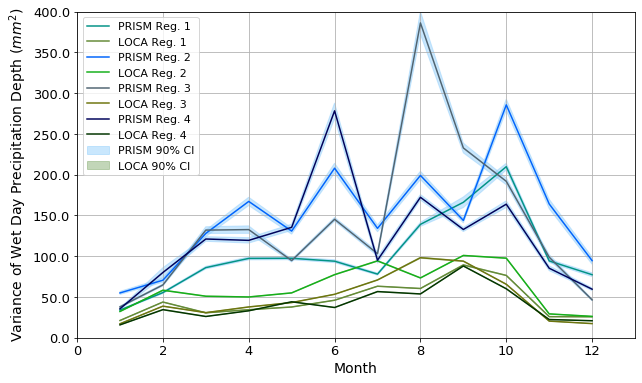

In [658]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[6]], color="xkcd:teal", 
           linestyle="-", label="PRISM Reg. 1" )
ax11.fill( PR1VarCI[:,0], PR1VarCI[:,1], color="xkcd:light blue", alpha=0.5, )
ax11.plot( LO1Stats[BSCIHds[0]], LO1Stats[BSCIHds[6]], color="xkcd:moss green", 
           linestyle="-", label="LOCA Reg. 1" )
ax11.fill( LO1VarCI[:,0], LO1VarCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[6]], color="xkcd:bright blue", 
           linestyle="-", label="PRISM Reg. 2" )
ax11.fill( PR2VarCI[:,0], PR2VarCI[:,1], color="xkcd:light blue", alpha=0.5,)
ax11.plot( LO2Stats[BSCIHds[0]], LO2Stats[BSCIHds[6]], color="xkcd:green", 
           linestyle="-", label="LOCA Reg. 2" )
ax11.fill( LO2VarCI[:,0], LO2VarCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[6]], color="xkcd:slate", 
           linestyle="-", label="PRISM Reg. 3" )
ax11.fill( PR3VarCI[:,0], PR3VarCI[:,1], color="xkcd:light blue", alpha=0.5, )
ax11.plot( LO3Stats[BSCIHds[0]], LO3Stats[BSCIHds[6]], color="xkcd:olive", 
           linestyle="-", label="LOCA Reg. 3" )
ax11.fill( LO3VarCI[:,0], LO3VarCI[:,1], color="xkcd:sage", alpha=0.5, )
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[6]], color="xkcd:dark blue", 
           linestyle="-", label="PRISM Reg. 4" )
ax11.plot( LO4Stats[BSCIHds[0]], LO4Stats[BSCIHds[6]], color="xkcd:dark green", 
           linestyle="-", label="LOCA Reg. 4" )
ax11.fill( PR4VarCI[:,0], PR4VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.fill( LO4VarCI[:,0], LO4VarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left', fontsize=11)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

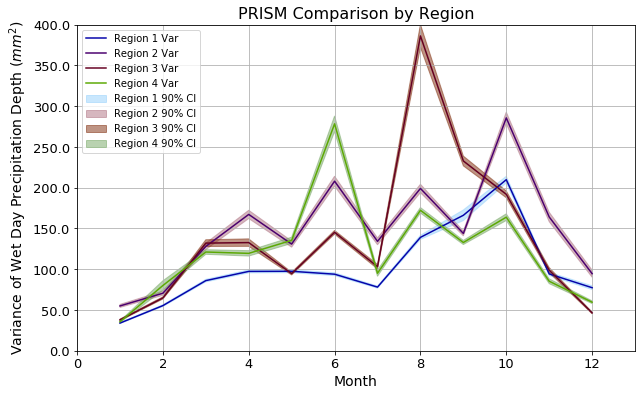

In [659]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="Region 1 Var" )
ax11.fill( PR1VarCI[:,0], PR1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Region 1 90% CI")
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="Region 2 Var" )
ax11.fill( PR2VarCI[:,0], PR2VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="Region 2 90% CI")
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="Region 3 Var" )
ax11.fill( PR3VarCI[:,0], PR3VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="Region 3 90% CI")
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="Region 4 Var" )
ax11.fill( PR4VarCI[:,0], PR4VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="Region 4 90% CI")
ax11.set_title('PRISM Comparison by Region', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

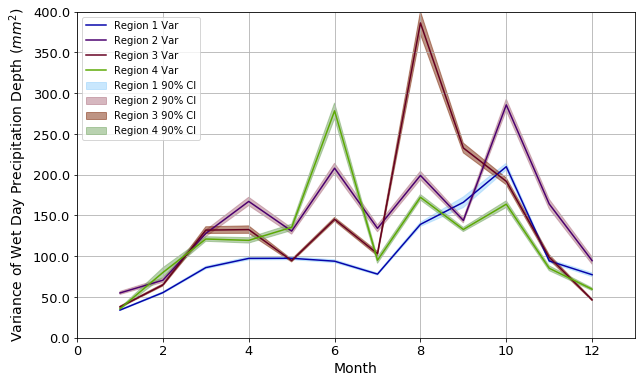

In [660]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PR1Stats[BSCIHds[0]], PR1Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="Region 1 Var" )
ax11.fill( PR1VarCI[:,0], PR1VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="Region 1 90% CI")
ax11.plot( PR2Stats[BSCIHds[0]], PR2Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="Region 2 Var" )
ax11.fill( PR2VarCI[:,0], PR2VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="Region 2 90% CI")
ax11.plot( PR3Stats[BSCIHds[0]], PR3Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="Region 3 Var" )
ax11.fill( PR3VarCI[:,0], PR3VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="Region 3 90% CI")
ax11.plot( PR4Stats[BSCIHds[0]], PR4Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="Region 4 Var" )
ax11.fill( PR4VarCI[:,0], PR4VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="Region 4 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 400.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )